In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pgmpy.estimators import PC
from abbeyFunctions import graph_DAG
from abiFunctions import analyze_wls_pooled_models, wls_pooled_model_analysis
import pingouin
import matplotlib.pyplot as plt

Import dataframes for plotting the full DAGs

In [2]:
diff_nominal = pd.read_csv('diff_nominal.csv')

diff_nominal.drop(columns=['Unnamed: 0'], inplace=True)

rates_nominal = pd.read_csv('rates_nominal.csv')

rates_nominal.drop(columns=['Unnamed: 0'], inplace=True)

log_nominal = pd.read_csv('log_nominal_data.csv')

In [3]:
diff_nominal

FIPS  TimePeriod      Agri      Mini      Util        M4       M4I  \
0       1001.0        2001       NaN       NaN       NaN       NaN       NaN   
1       1001.0        2002       NaN       NaN       NaN       NaN -0.004895   
2       1001.0        2003  1.011185  0.610578 -0.767498 -0.006913  0.001531   
3       1001.0        2004 -0.570860  0.279452  0.436969  0.005551  0.011944   
4       1001.0        2005 -0.053545 -0.231773 -0.744634  0.001974  0.011496   
...        ...         ...       ...       ...       ...       ...       ...   
61715  56045.0        2016  0.092303 -0.255754 -0.315557 -0.004745  0.001701   
61716  56045.0        2017  0.570072  0.009392  0.167250 -0.000308  0.003731   
61717  56045.0        2018 -0.182600  0.216190  0.091809  0.009628  0.001597   
61718  56045.0        2019 -0.694689  0.002888  0.130280  0.155660 -0.006400   
61719  56045.0        2020  0.021407 -0.544338 -0.291322 -0.110658 -0.001517   

           unem   EFW  
0           NaN   NaN  
1      0.669231  0.01  
2      0.192308  0.02  
3     -0.284615  0.06  
4     -0.930769 -0.12  
...         ...   ...  
61715  1.646154  0.01  
61716 -0.923077  0.09  
61717 -0.546154 -0.02  
61718 -0.546154 -0.05  
61719  0.876923 -0.15  

[61720 rows x 9 columns]

Creating a dictionary to store the various combinations fo the dataframes for the DAGs

In [4]:
nominal_differenced_rates_with_all_variables = diff_nominal.dropna().set_index(['FIPS', 'TimePeriod'])

nominal_rates_with_all_variables = rates_nominal.dropna().set_index(['FIPS', 'TimePeriod'])

nominal_log_with_all_variables = log_nominal.dropna().set_index(['FIPS', 'TimePeriod'])

# Create a dictionary to store the DataFrames
full_DAG_dict = {}

full_DAG_dict['Nominal log (All variables)'] = nominal_log_with_all_variables

full_DAG_dict['Nominal log (without Monetary)'] = nominal_log_with_all_variables.drop(columns=['M4', 'M4I'])

full_DAG_dict['Nominal log (without unem)'] = nominal_log_with_all_variables.drop(columns=['unem'])

full_DAG_dict['Nominal rates (All variables)'] = nominal_rates_with_all_variables

full_DAG_dict['Nominal rates (without Monetary)'] = nominal_rates_with_all_variables.drop(columns=['M4', 'M4I'])

full_DAG_dict['Nominal rates (without unem)'] = nominal_rates_with_all_variables.drop(columns=['unem'])

full_DAG_dict['Nominal diff rates (All variables)'] = nominal_differenced_rates_with_all_variables

full_DAG_dict['Nominal diff rates (without Monetary)'] = nominal_differenced_rates_with_all_variables.drop(columns=['M4', 'M4I'])

full_DAG_dict['Nominal diff rates (without unem)'] = nominal_differenced_rates_with_all_variables.drop(columns=['unem'])

Here we plot the DAGs

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: Agri
('M4', 'Util') ['Agri']
keep control: unem
keep control: Mini
('M4', 'Agri') ['unem', 'Mini']
('M4', 'unem') []
keep control: M4
('Agri', 'Util') ['M4']
('Agri', 'M4I') []
keep control: M4
keep control: Mini
('unem', 'Agri') ['M4', 'Mini']
keep control: unem
keep control: M4
('Mini', 'Agri') ['unem', 'M4']


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: Util
keep control: unem
('Agri', 'Mini') ['Util', 'unem']
keep control: unem
keep control: Mini
('Agri', 'Util') ['unem', 'Mini']
keep control: Util
keep control: Mini
('Agri', 'unem') ['Util', 'Mini']
keep control: Util
keep control: Agri
('Mini', 'unem') ['Util', 'Agri']
keep control: Util
keep control: unem
('Mini', 'Agri') ['Util', 'unem']
keep control: Agri
keep control: unem
('Mini', 'Util') ['Agri', 'unem']
keep control: unem
keep control: Mini
('Util', 'Agri') ['unem', 'Mini']
keep control: Agri
keep control: Mini
('Util', 'unem') ['Agri', 'Mini']
keep control: Agri
keep control: unem
('Util', 'Mini') ['Agri', 'unem']
keep control: Util
keep control: Agri
('unem', 'Mini') ['Util', 'Agri']
keep control: Agri
keep control: Mini
('unem', 'Util') ['Agri', 'Mini']
keep control: Util
keep control: Mini
('unem', 'Agri') ['Util', 'Mini']


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: Agri
('M4', 'Util') ['Agri']
keep control: Mini
('M4', 'Agri') ['Mini']
keep control: M4
('Agri', 'Util') ['M4']
('Agri', 'M4I') []
('M4I', 'Mini') []
keep control: M4
('Mini', 'Agri') ['M4']


  0%|          | 0/5 [00:00<?, ?it/s]

keep control: M4I
('Util', 'M4') ['M4I']
keep control: Mini
('M4', 'unem') ['Mini']
('unem', 'M4I') []
keep control: M4I
keep control: Mini
('unem', 'EFW') ['M4I', 'Mini']
('M4I', 'Mini') []
keep control: Util
('M4I', 'M4') ['Util']
keep control: Mini
keep control: unem
('M4I', 'EFW') ['Mini', 'unem']
keep control: M4I
keep control: unem
('Mini', 'EFW') ['M4I', 'unem']
keep control: M4
('Mini', 'unem') ['M4']


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: Util
keep control: Mini
('EFW', 'unem') ['Util', 'Mini']
('EFW', 'Mini') []
keep control: EFW
keep control: Mini
('Util', 'unem') ['EFW', 'Mini']
keep control: Util
keep control: EFW
('Mini', 'unem') ['Util', 'EFW']
('Mini', 'EFW') []


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: M4I
('Util', 'M4') ['M4I']
keep control: EFW
keep control: Mini
('Util', 'M4I') ['EFW', 'Mini']
keep control: Util
keep control: EFW
('Mini', 'M4I') ['Util', 'EFW']
('Mini', 'EFW') []
keep control: Util
('M4I', 'M4') ['Util']
keep control: Util
keep control: Mini
('EFW', 'M4I') ['Util', 'Mini']


  0%|          | 0/5 [00:00<?, ?it/s]

keep control: M4
keep control: Mini
('EFW', 'unem') ['M4', 'Mini']
keep control: Mini
('unem', 'M4I') ['Mini']
keep control: unem
('Mini', 'M4I') ['unem']
keep control: M4
keep control: EFW
('Mini', 'unem') ['M4', 'EFW']
keep control: Mini
keep control: EFW
('M4', 'unem') ['Mini', 'EFW']
keep control: Util
('M4', 'EFW') ['Util']
('Agri', 'M4') []
keep control: M4
('Util', 'EFW') ['M4']


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: Agri
keep control: Mini
('EFW', 'unem') ['Agri', 'Mini']
('EFW', 'Util') []
keep control: EFW
keep control: Mini
('Agri', 'unem') ['EFW', 'Mini']
keep control: Agri
keep control: EFW
('Mini', 'unem') ['Agri', 'EFW']
('Util', 'EFW') []


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


('Mini', 'M4I') []
keep control: Agri
keep control: EFW
keep control: M4I
('Mini', 'M4') ['Agri', 'EFW', 'M4I']
keep control: Agri
keep control: EFW
keep control: Mini
('M4I', 'M4') ['Agri', 'EFW', 'Mini']
keep control: M4I
keep control: EFW
keep control: Mini
('Agri', 'M4') ['M4I', 'EFW', 'Mini']
('Util', 'EFW') []
keep control: M4I
keep control: Agri
keep control: Mini
('EFW', 'M4') ['M4I', 'Agri', 'Mini']


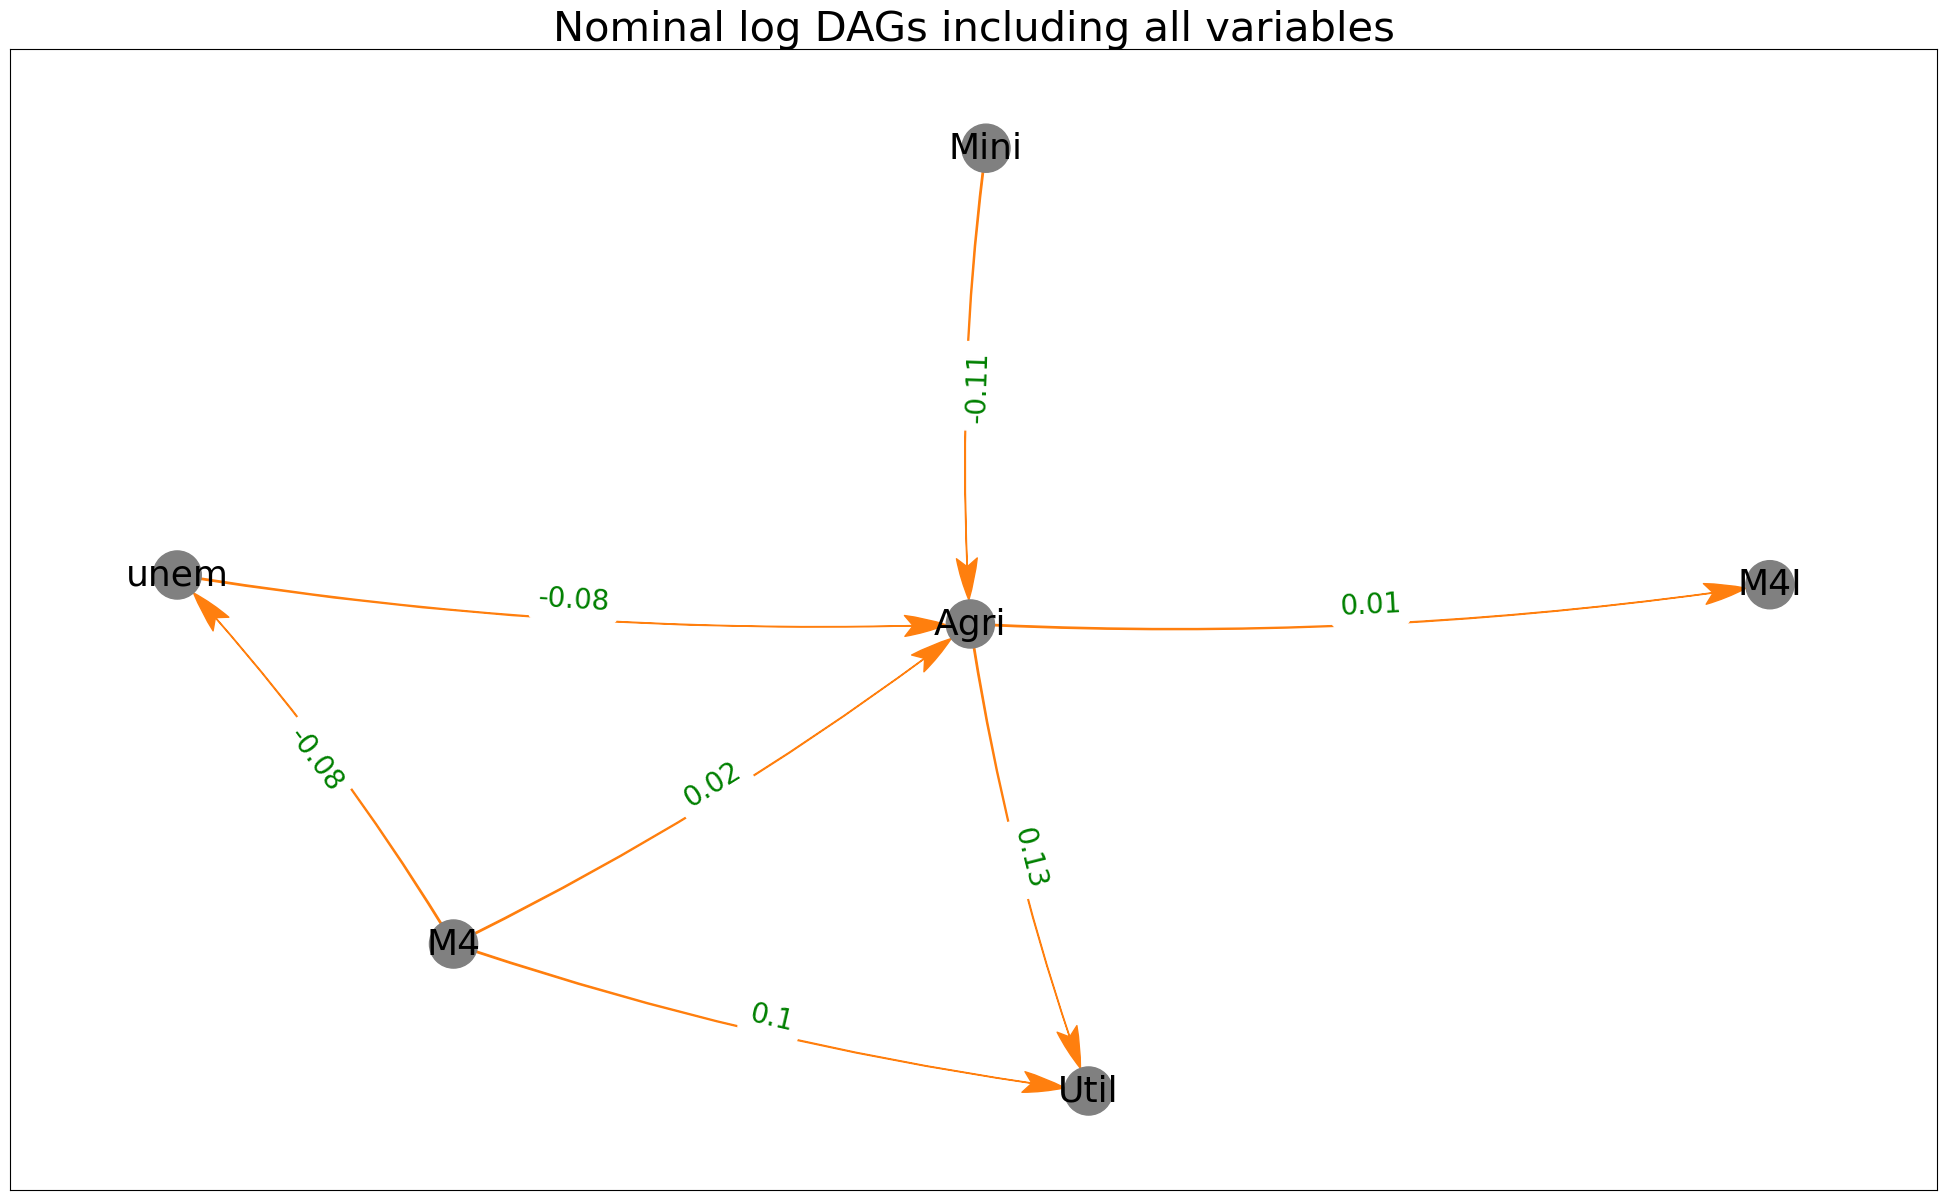

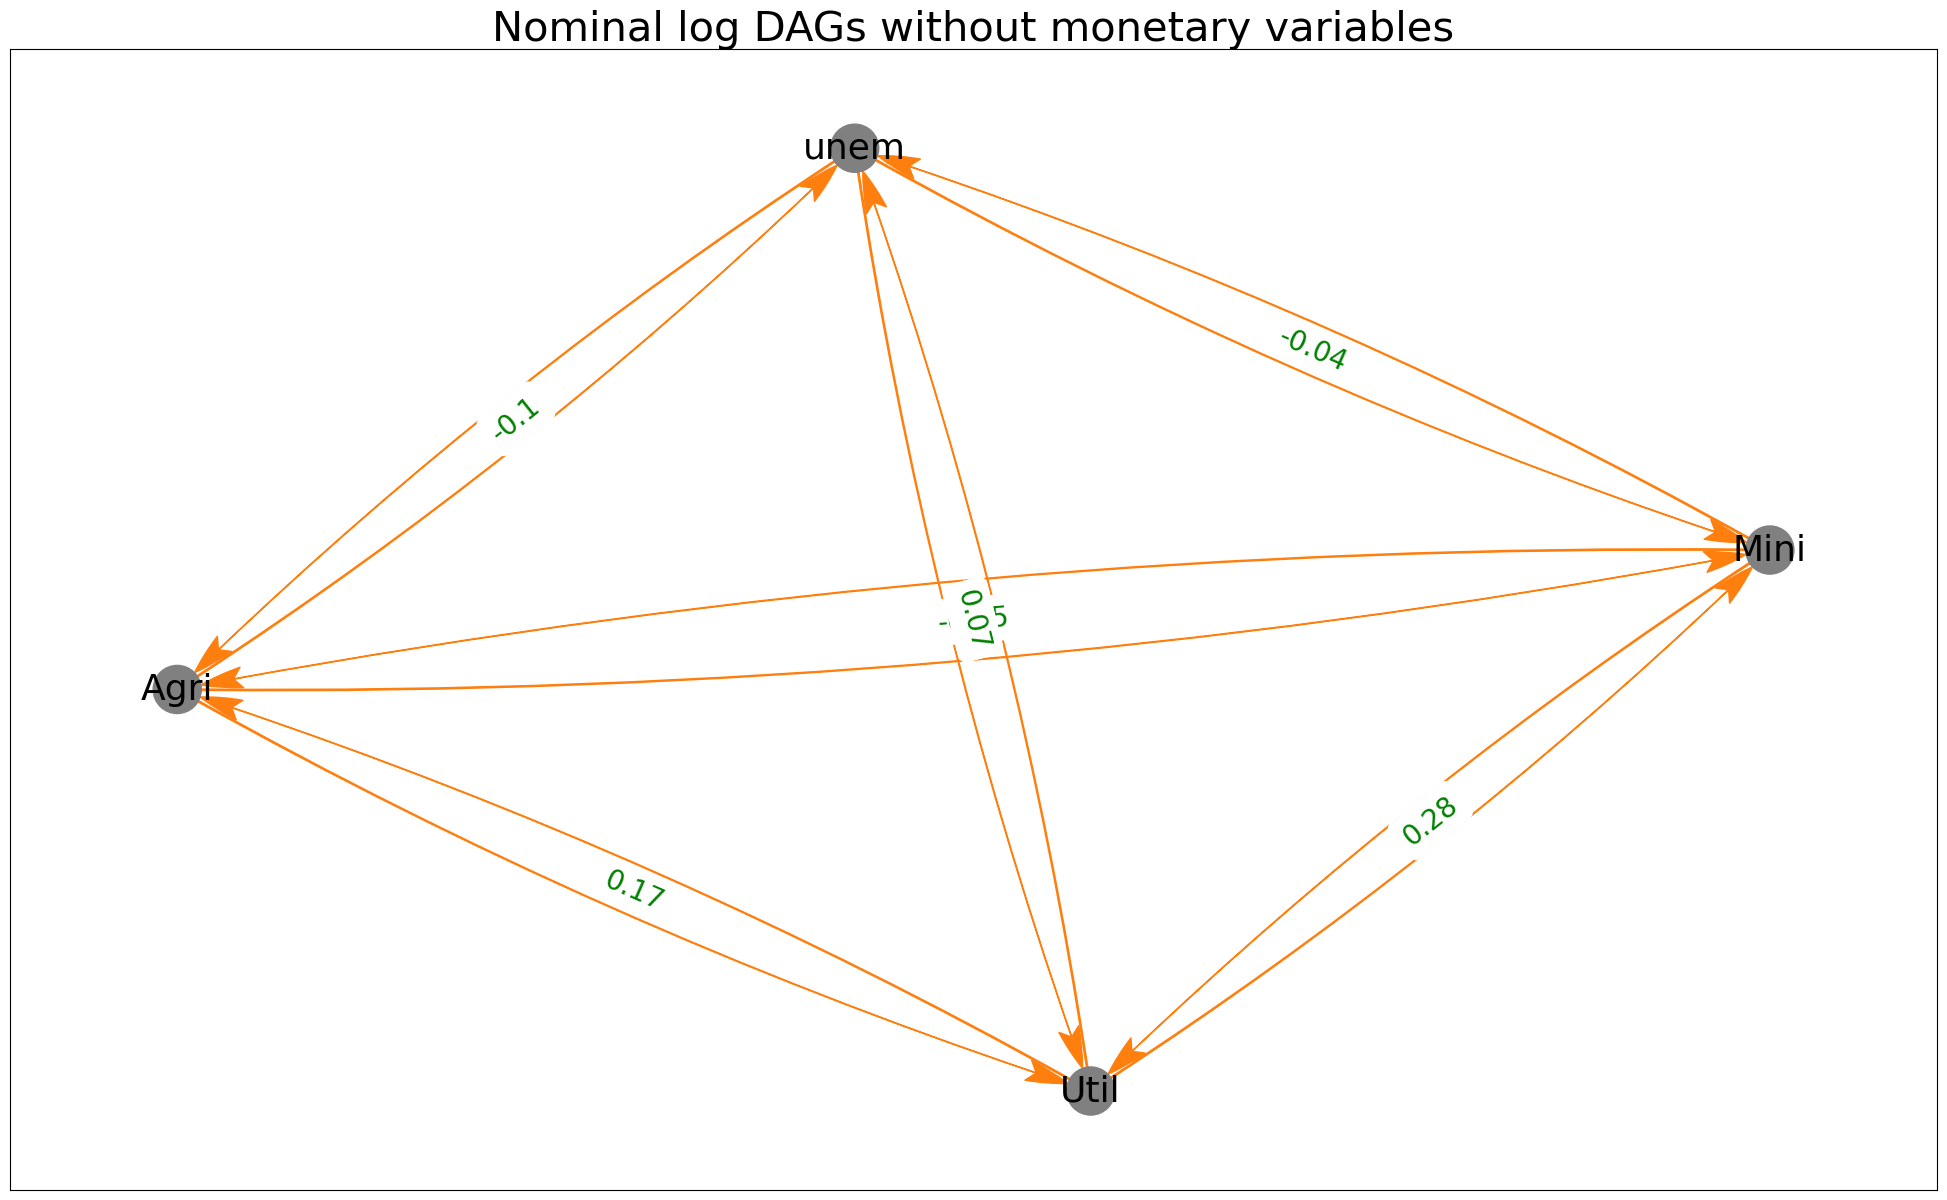

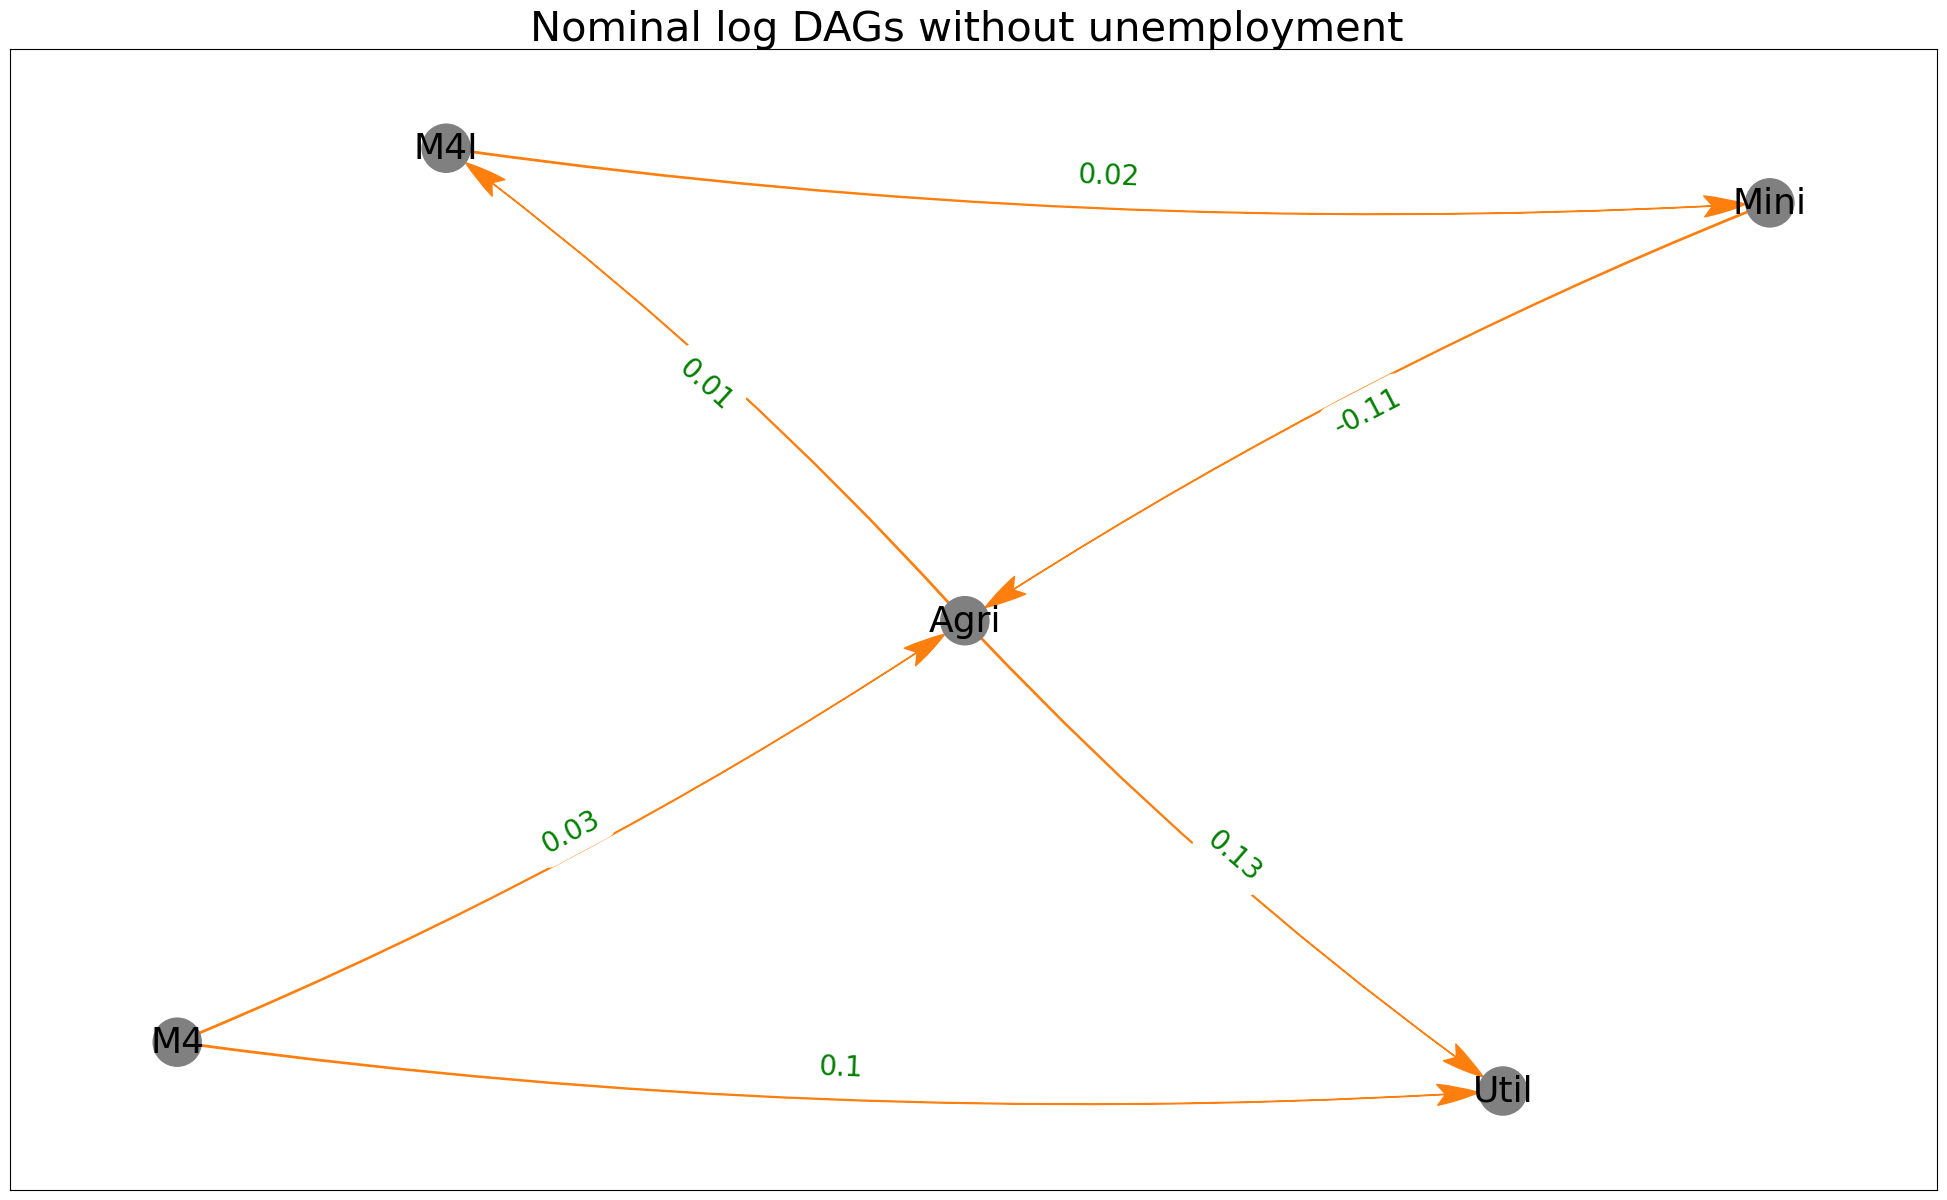

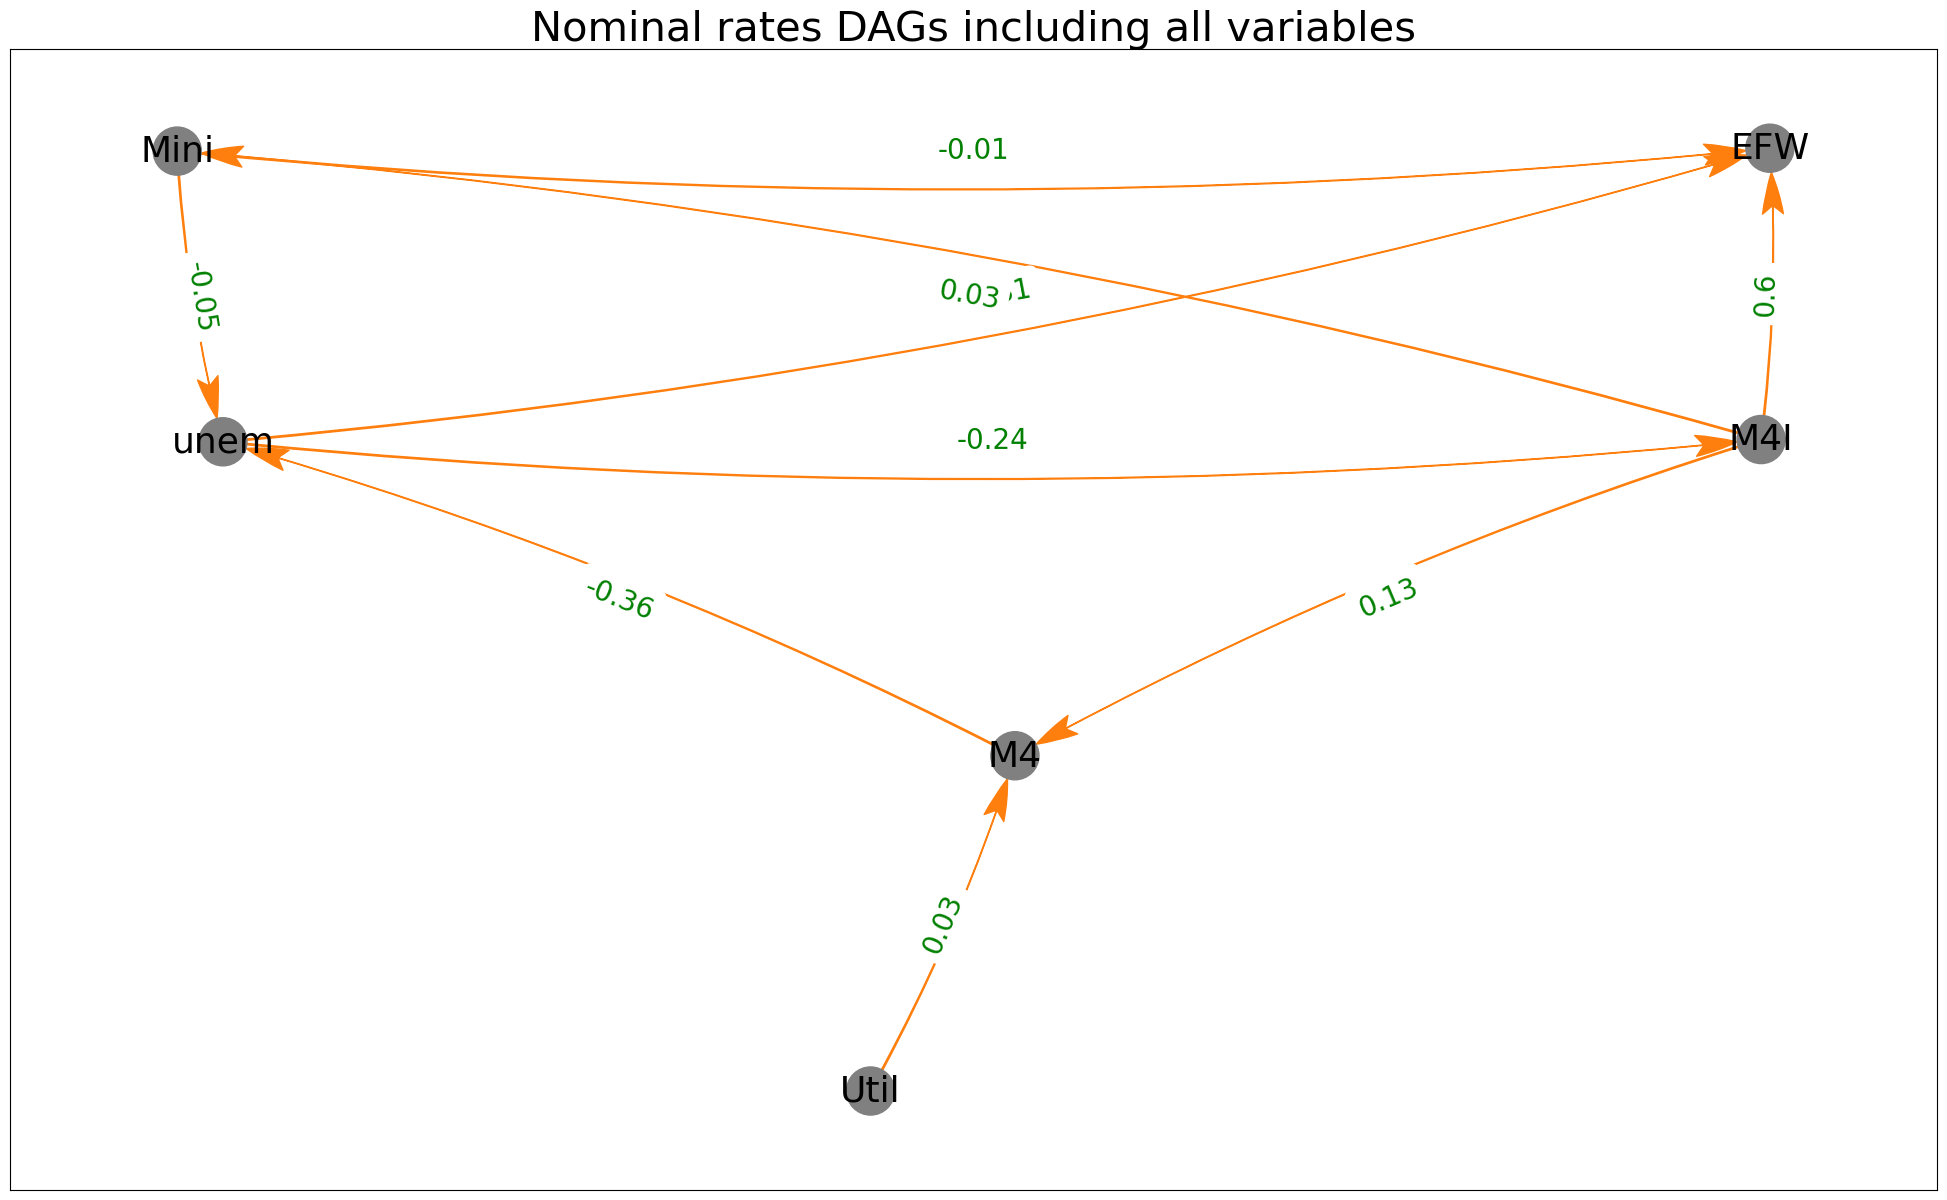

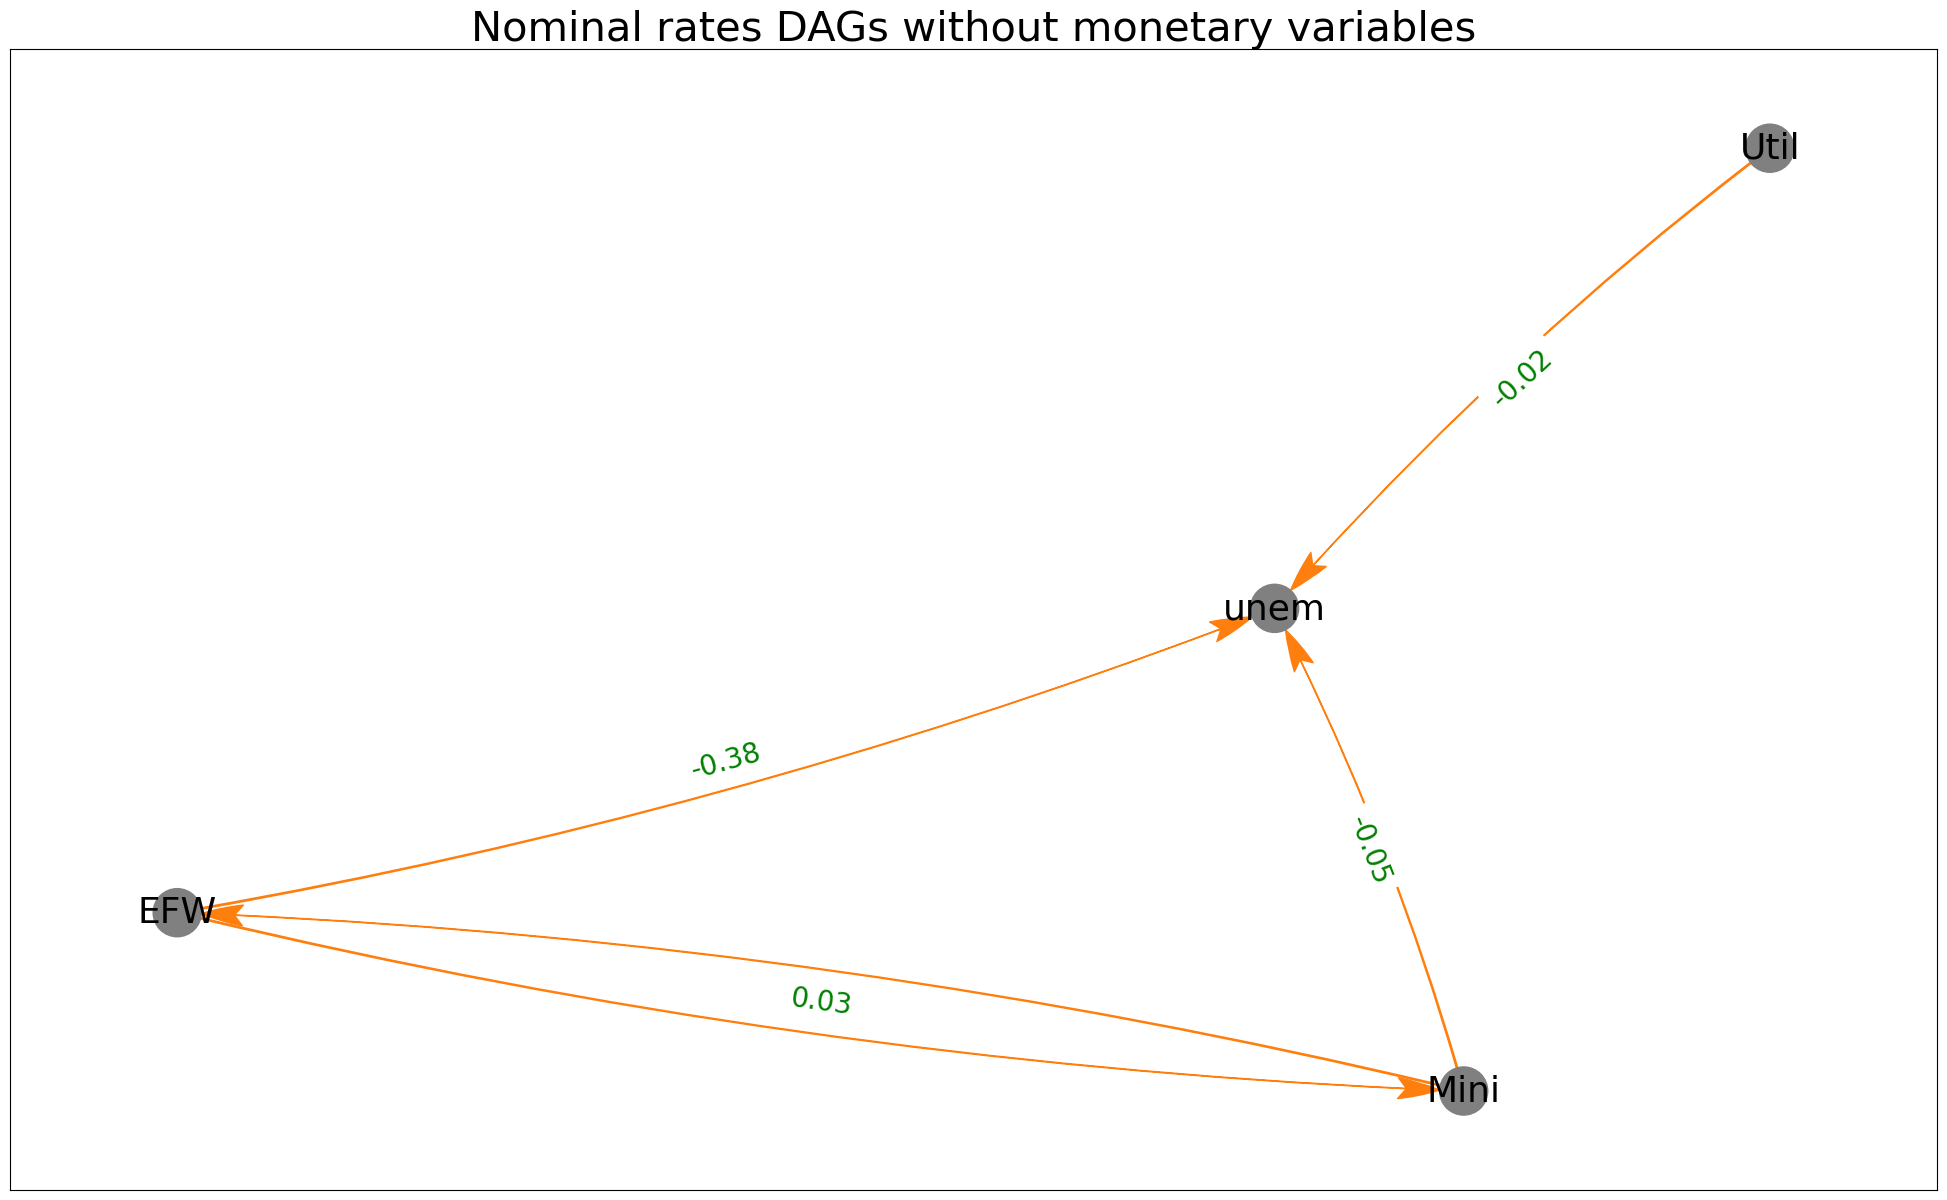

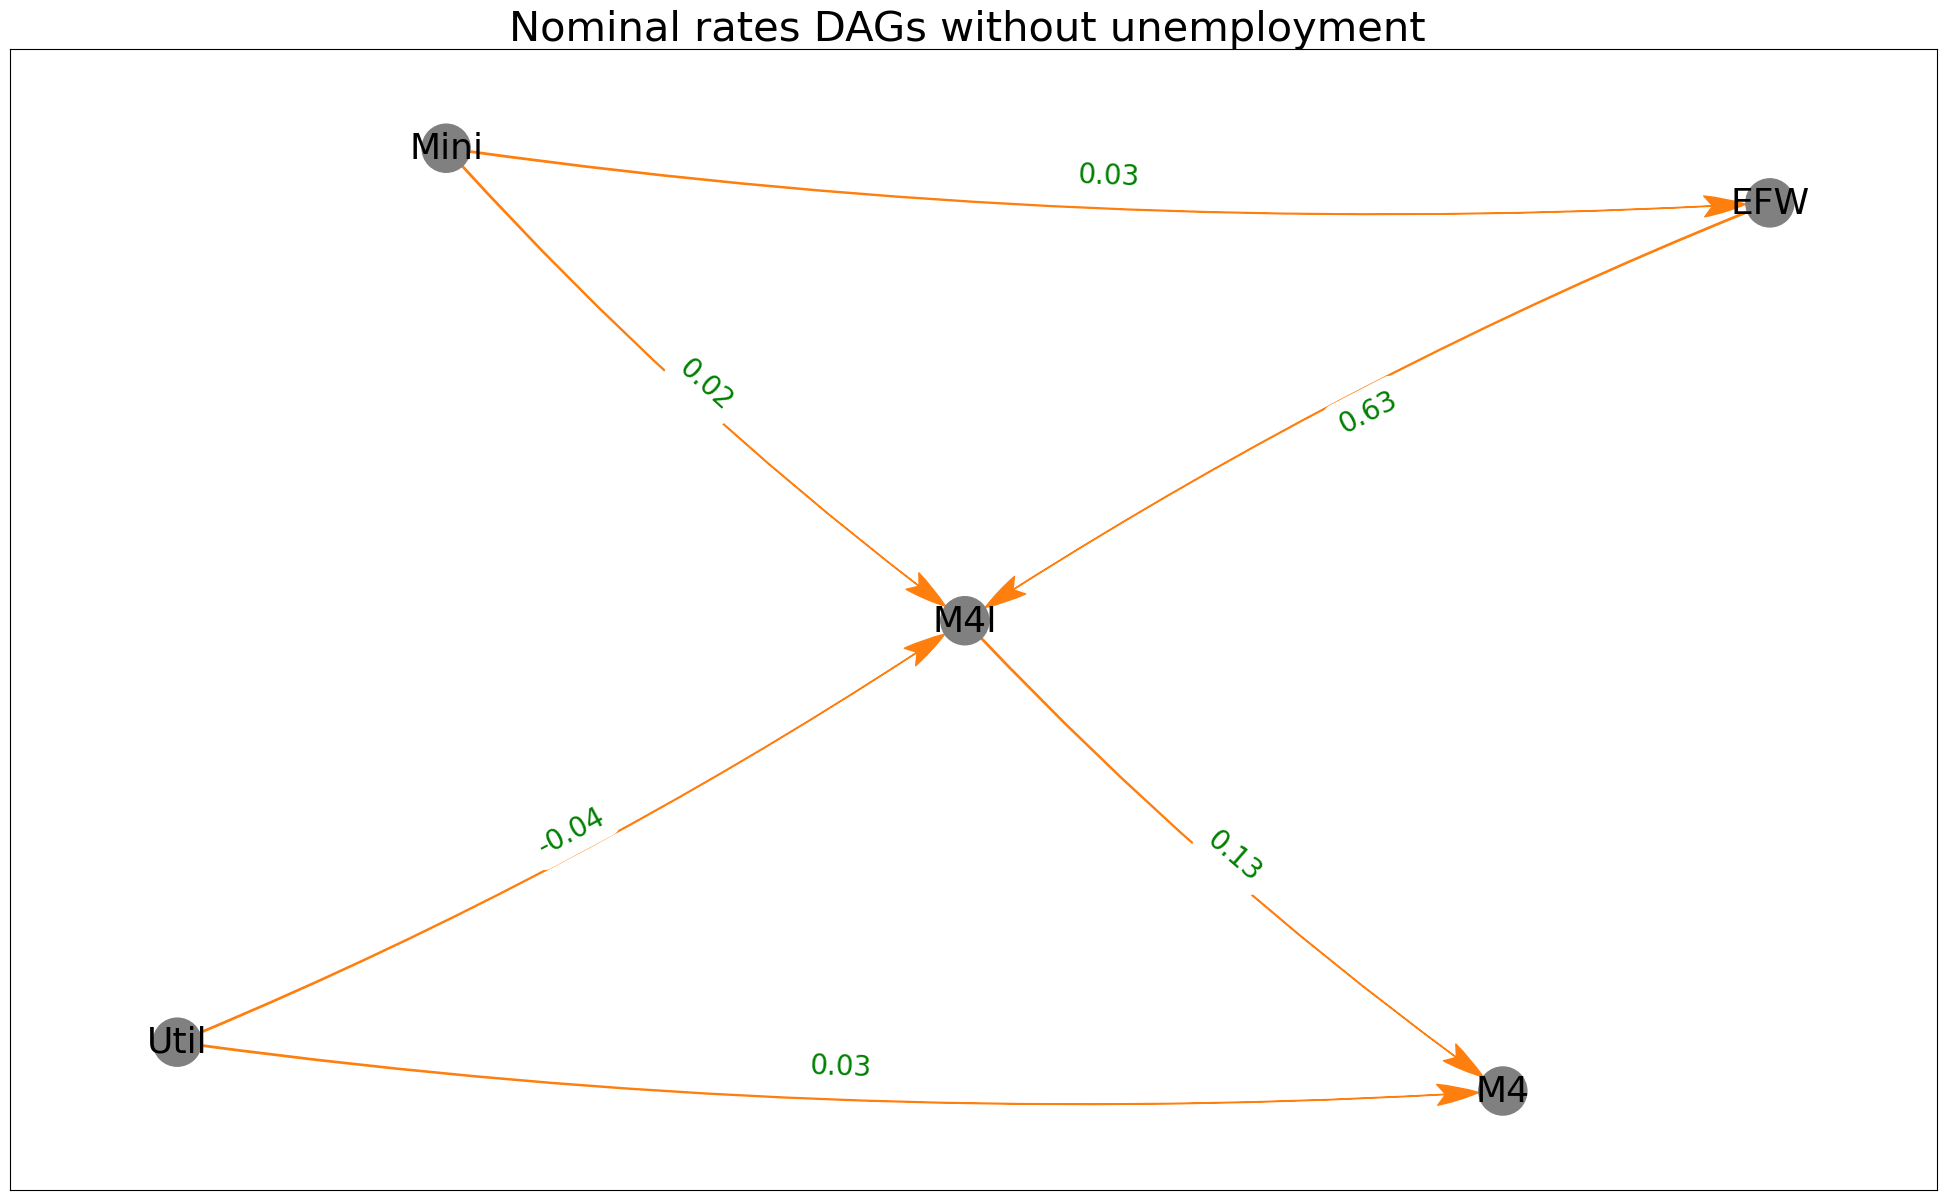

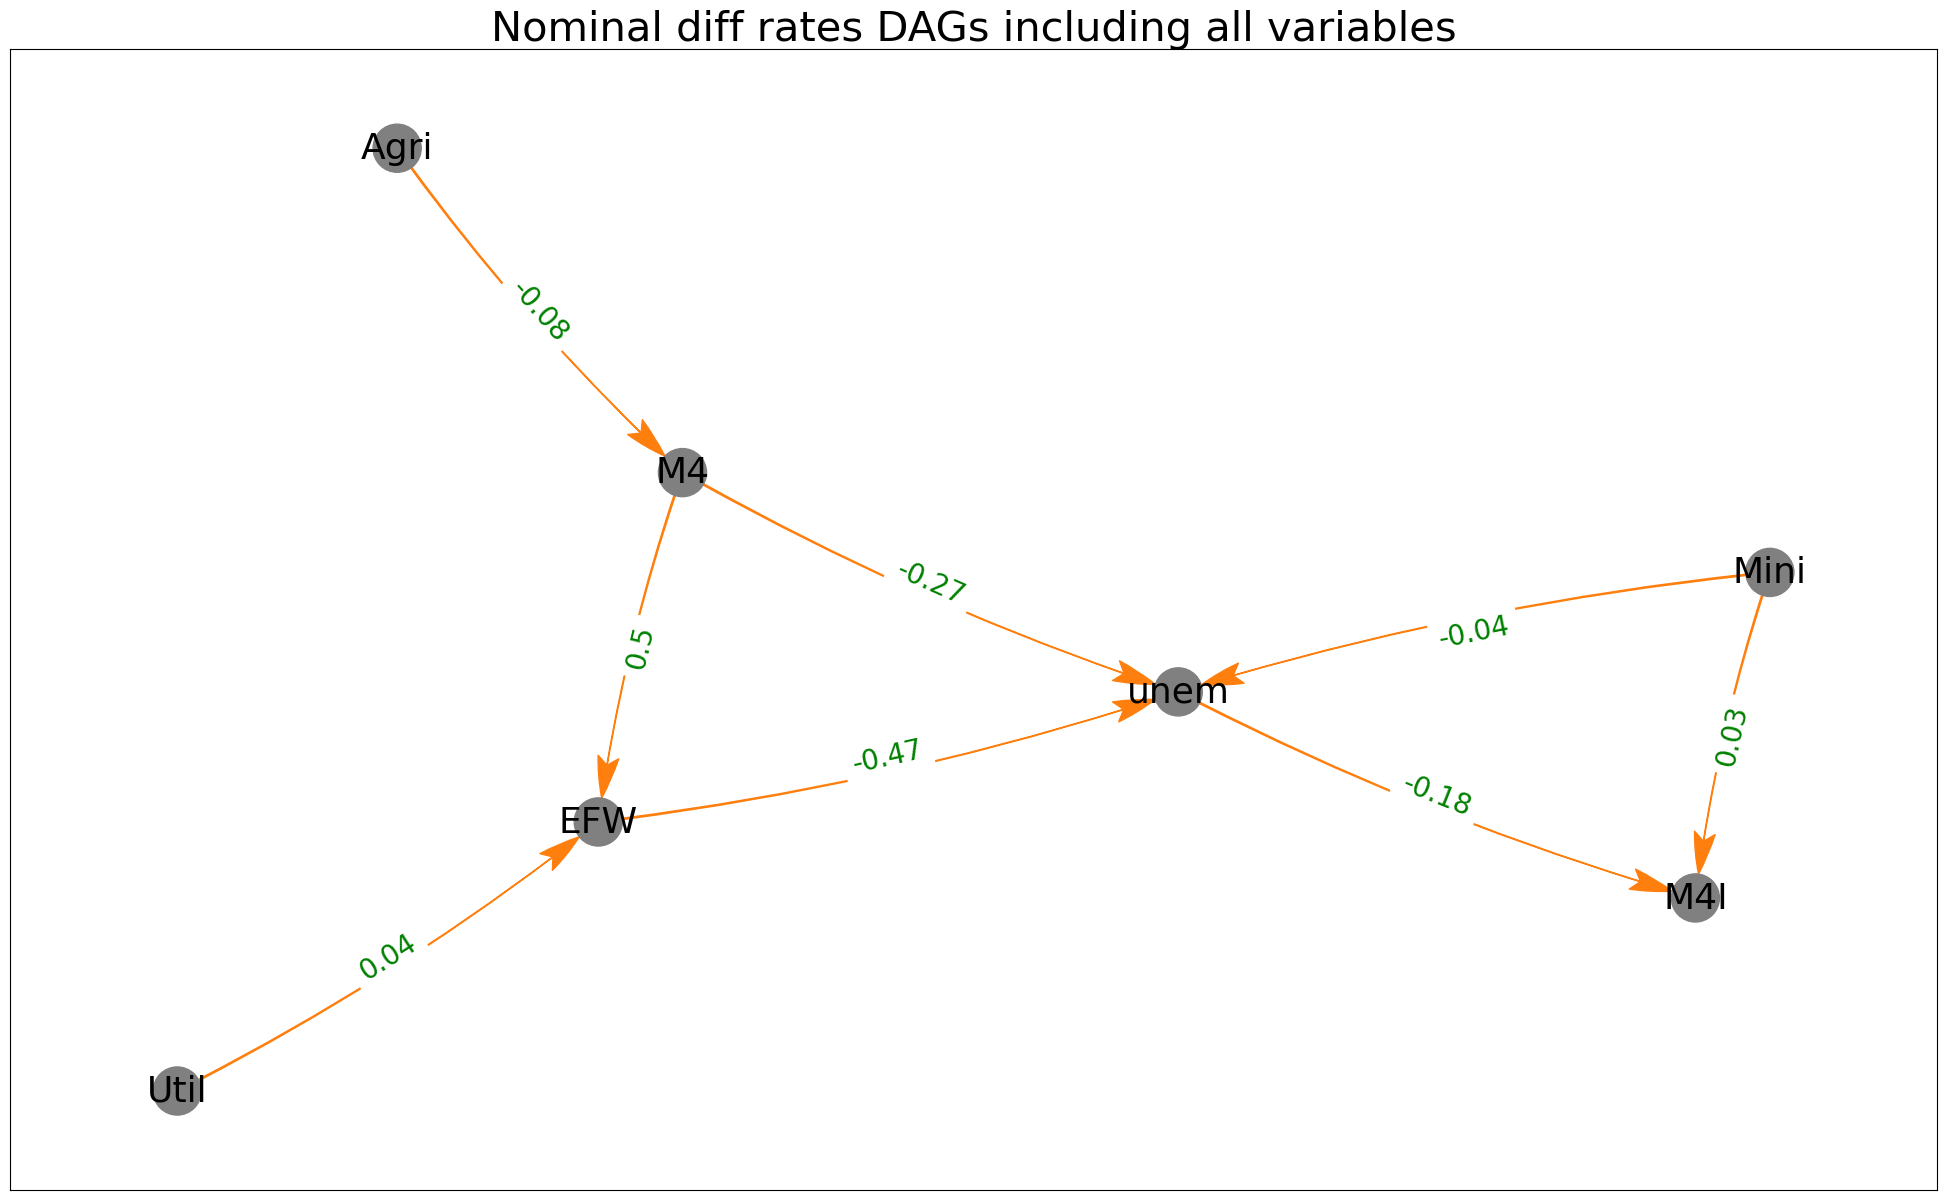

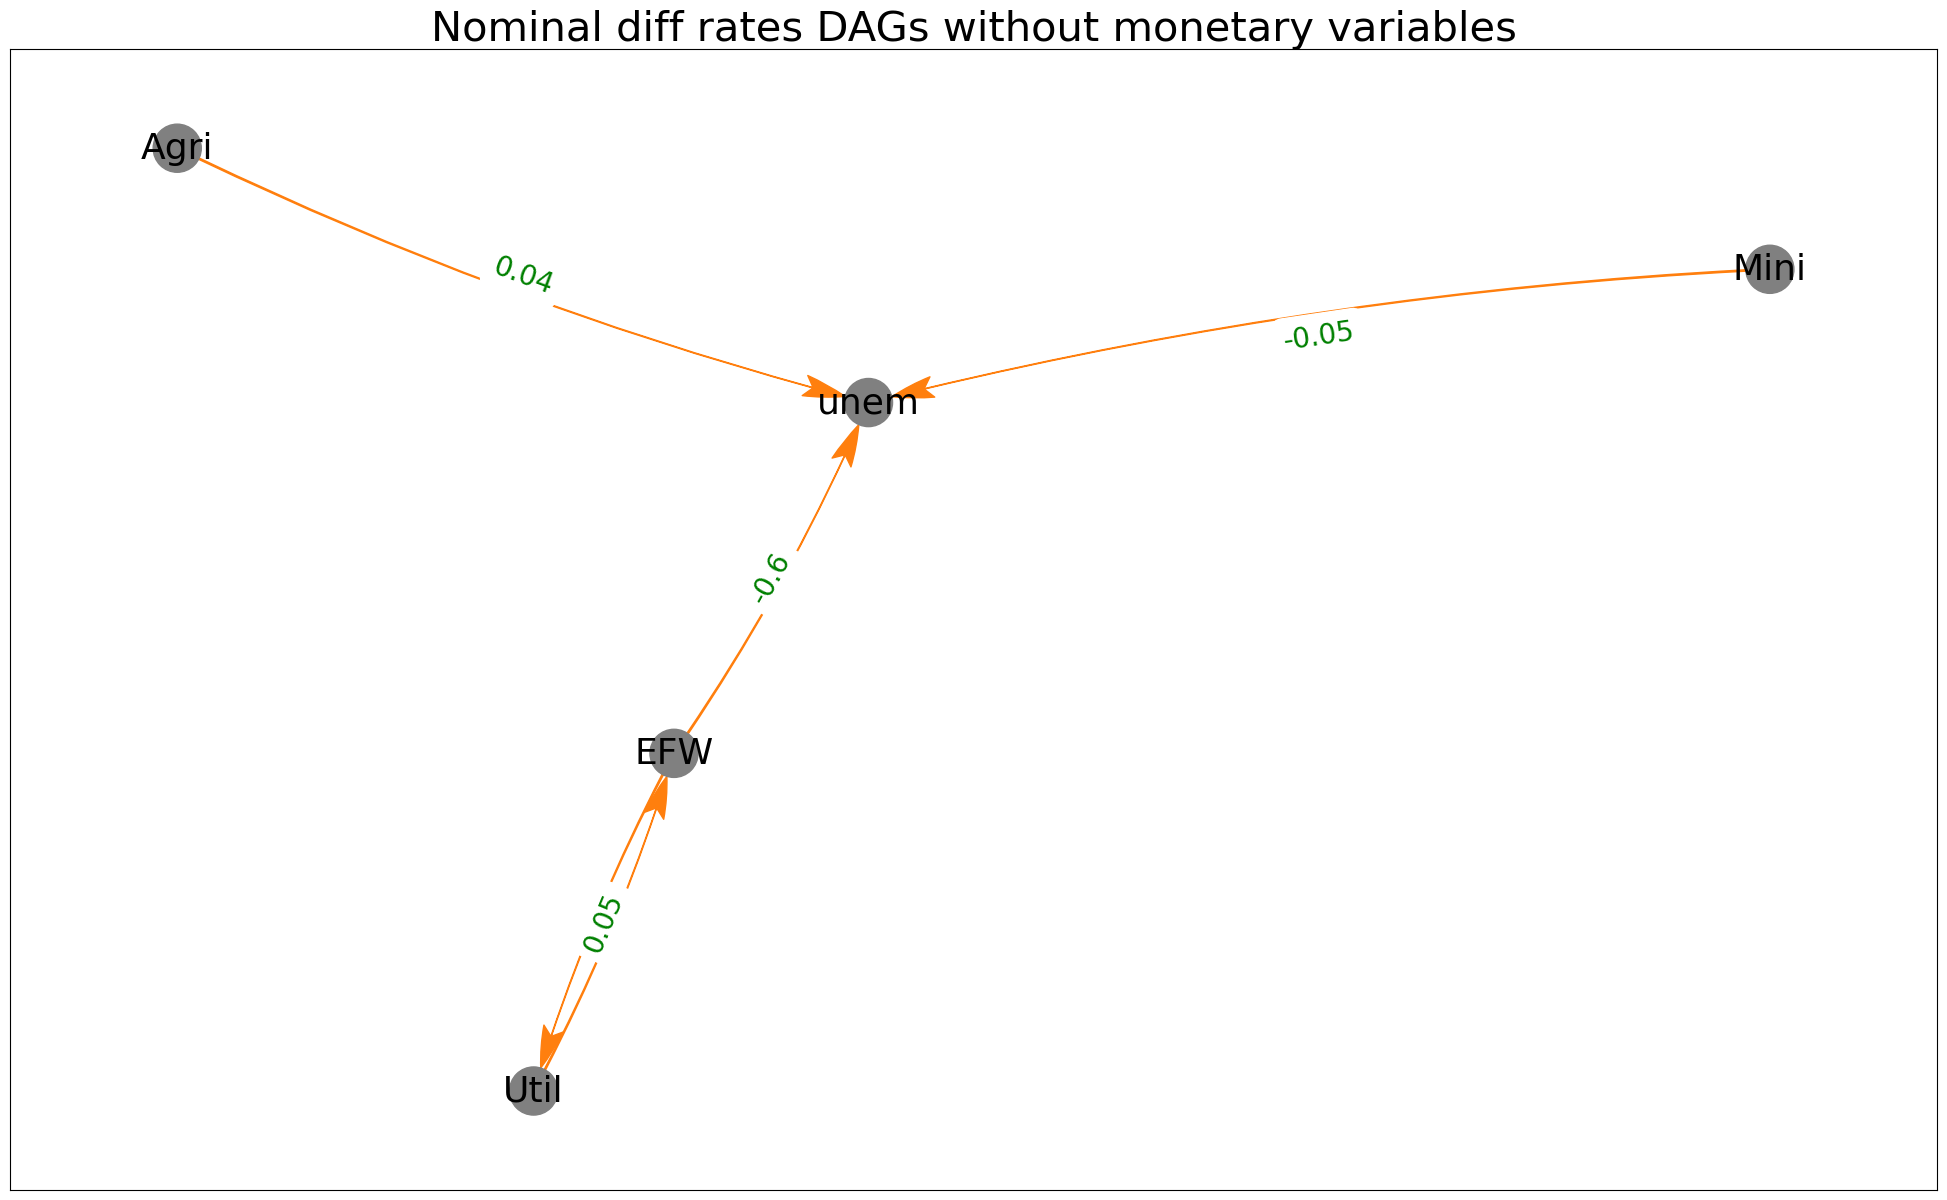

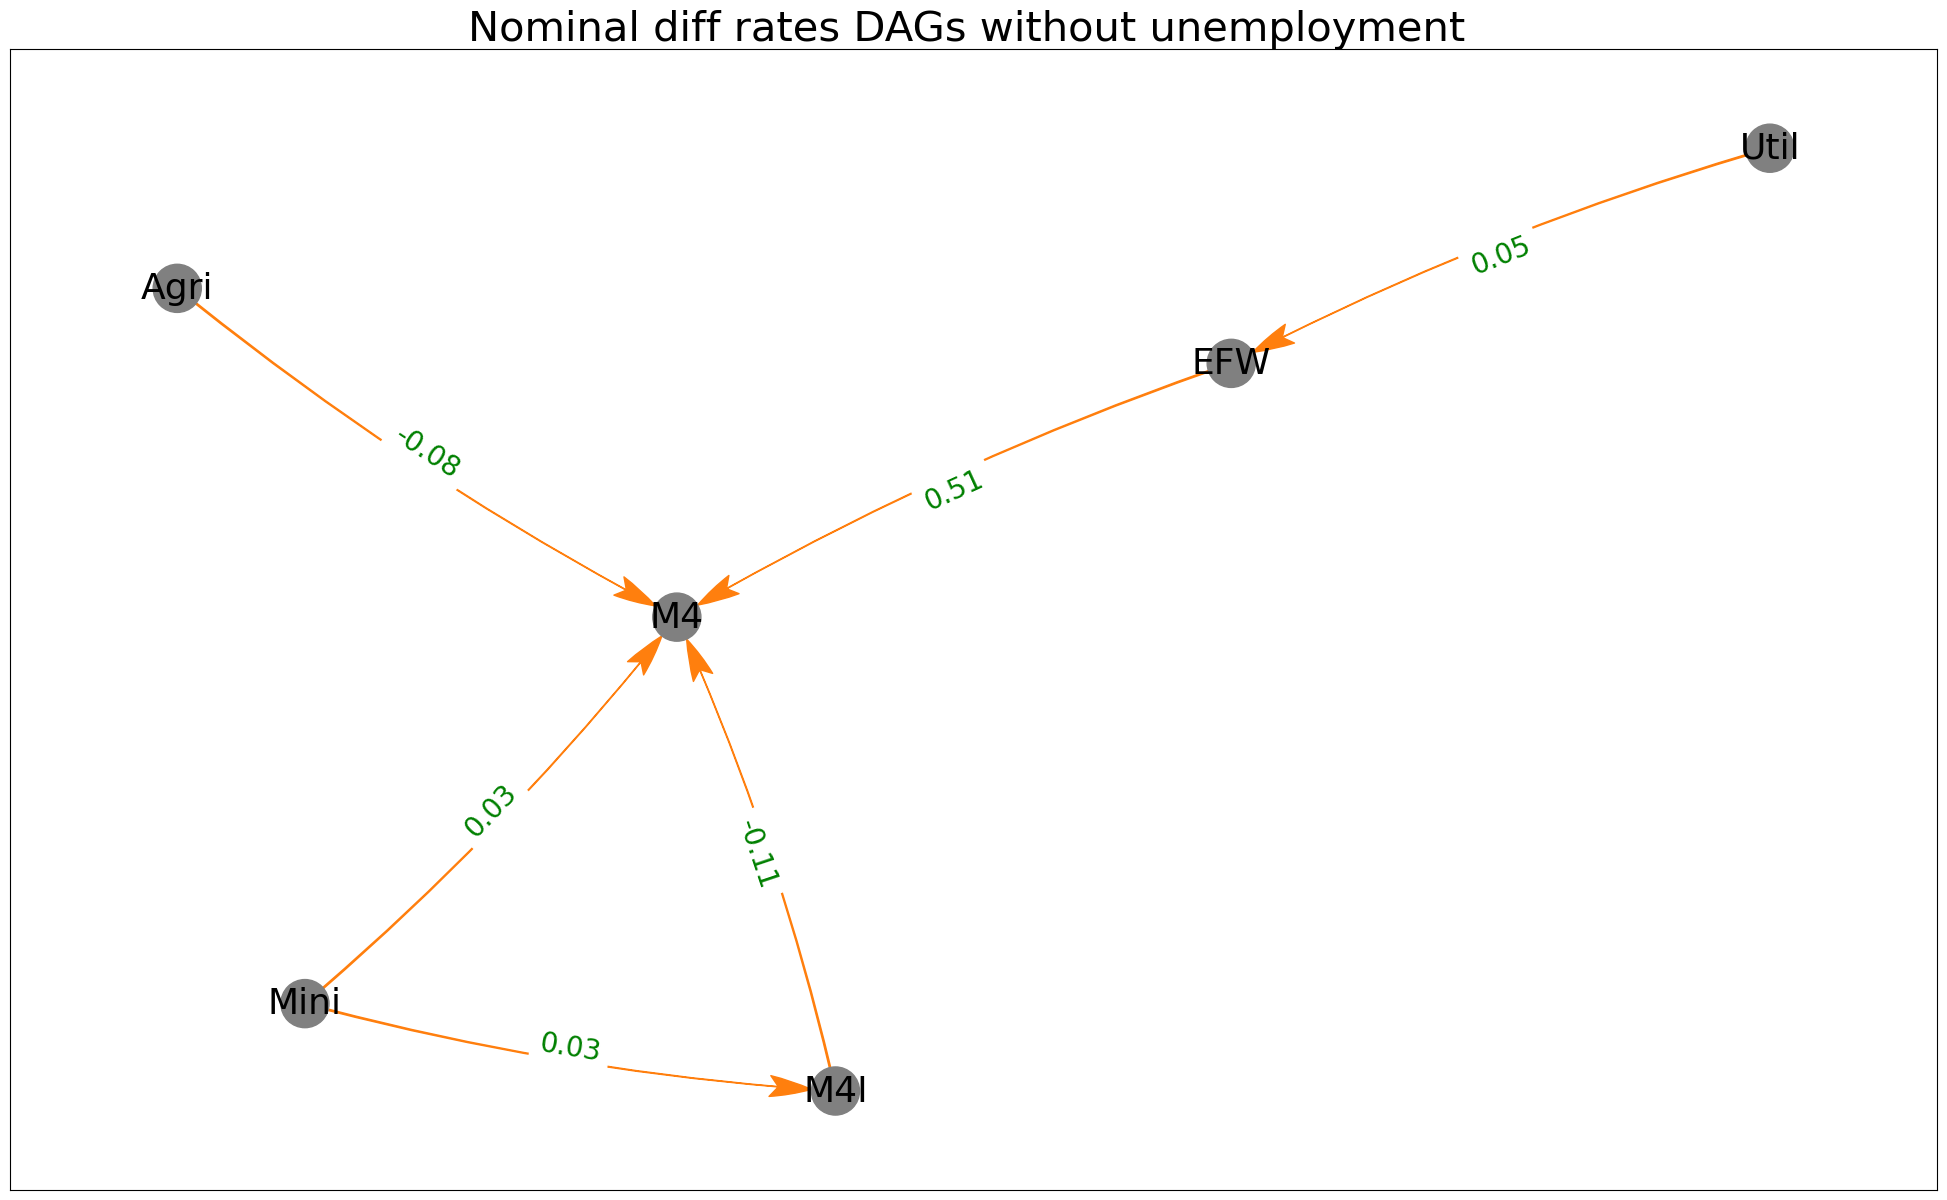

In [5]:
title = ['Nominal log DAGs including all variables',
        'Nominal log DAGs without monetary variables',
        'Nominal log DAGs without unemployment ',
        'Nominal rates DAGs including all variables',
        'Nominal rates DAGs without monetary variables',
        'Nominal rates DAGs without unemployment ',
        'Nominal diff rates DAGs including all variables',
        'Nominal diff rates DAGs without monetary variables',
        'Nominal diff rates DAGs without unemployment ']

# Plot DAGs for each dataframe
for i, key in enumerate(['Nominal log (All variables)',
                         'Nominal log (without Monetary)',
                         'Nominal log (without unem)',
                         'Nominal rates (All variables)',
                         'Nominal rates (without Monetary)',
                         'Nominal rates (without unem)',
                         'Nominal diff rates (All variables)',
                         'Nominal diff rates (without Monetary)',
                         'Nominal diff rates (without unem)']):
    plot_df = full_DAG_dict[key]
    c = PC(plot_df)
    max_cond_vars = len(plot_df.keys()) - 2
    model = c.estimate(return_type='pdag', variant='orig', significance_level=0.01,
                       max_cond_vars=max_cond_vars, ci_test='pearsonr')
    edges = model.edges

    # Plot the DAG
    graph_DAG(edges, plot_df, title=title[i])


In [6]:
full_DAG_dict['Nominal log (All variables)']

Agri       Mini       Util        M4       M4I  \
FIPS    TimePeriod                                                        
1001.0  2001        10.019269   8.443331  10.048497  6.736366  0.012311   
        2002         9.801621   8.023880  10.884067  6.792033  0.007415   
        2003        10.595159   8.215006  10.952139  6.840788  0.008946   
        2004        10.817836   8.685585  11.457180  6.895093  0.020890   
        2005        10.986969   8.924390  11.217587  6.951373  0.032386   
...                       ...        ...        ...       ...       ...   
56045.0 2016         9.537556  10.467238   6.635947  7.294128  0.003105   
        2017         9.898525  10.457717   6.609349  7.337218  0.006836   
        2018        10.076894  10.664387   6.674561  7.389937  0.008433   
        2019         9.560575  10.873944   6.870053  7.598315  0.002033   
        2020         9.065661  10.539165   6.774224  7.696034  0.000516   

                        unem  
FIPS    TimePeriod            
1001.0  2001        4.138462  
        2002        4.807692  
        2003        5.000000  
        2004        4.715385  
        2005        3.784615  
...                      ...  
56045.0 2016        5.007692  
        2017        4.084615  
        2018        3.538462  
        2019        2.992308  
        2020        3.869231  

[36273 rows x 6 columns]

  0%|          | 0/5 [00:00<?, ?it/s]

keep control: M4I
('Util', 'M4') ['M4I']
keep control: Mini
('M4', 'unem') ['Mini']
('unem', 'M4I') []
keep control: M4I
keep control: Mini
('unem', 'EFW') ['M4I', 'Mini']
('M4I', 'Mini') []
keep control: Util
('M4I', 'M4') ['Util']
keep control: Mini
keep control: unem
('M4I', 'EFW') ['Mini', 'unem']
keep control: M4I
keep control: unem
('Mini', 'EFW') ['M4I', 'unem']
keep control: M4
('Mini', 'unem') ['M4']


  0%|          | 0/5 [00:00<?, ?it/s]

keep control: M4
keep control: Mini
('EFW', 'unem') ['M4', 'Mini']
keep control: Mini
('unem', 'M4I') ['Mini']
keep control: unem
('Mini', 'M4I') ['unem']
keep control: M4
keep control: EFW
('Mini', 'unem') ['M4', 'EFW']
keep control: Mini
keep control: EFW
('M4', 'unem') ['Mini', 'EFW']
keep control: Util
('M4', 'EFW') ['Util']
('Agri', 'M4') []
keep control: M4
('Util', 'EFW') ['M4']


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: Util
keep control: Mini
('EFW', 'unem') ['Util', 'Mini']
('EFW', 'Mini') []
keep control: EFW
keep control: Mini
('Util', 'unem') ['EFW', 'Mini']
keep control: Util
keep control: EFW
('Mini', 'unem') ['Util', 'EFW']
('Mini', 'EFW') []


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: Agri
keep control: Mini
('EFW', 'unem') ['Agri', 'Mini']
('EFW', 'Util') []
keep control: EFW
keep control: Mini
('Agri', 'unem') ['EFW', 'Mini']
keep control: Agri
keep control: EFW
('Mini', 'unem') ['Agri', 'EFW']
('Util', 'EFW') []


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: M4I
('Util', 'M4') ['M4I']
keep control: EFW
keep control: Mini
('Util', 'M4I') ['EFW', 'Mini']
keep control: Util
keep control: EFW
('Mini', 'M4I') ['Util', 'EFW']
('Mini', 'EFW') []
keep control: Util
('M4I', 'M4') ['Util']
keep control: Util
keep control: Mini
('EFW', 'M4I') ['Util', 'Mini']


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


('Mini', 'M4I') []
keep control: Agri
keep control: EFW
keep control: M4I
('Mini', 'M4') ['Agri', 'EFW', 'M4I']
keep control: Agri
keep control: EFW
keep control: Mini
('M4I', 'M4') ['Agri', 'EFW', 'Mini']
keep control: M4I
keep control: EFW
keep control: Mini
('Agri', 'M4') ['M4I', 'EFW', 'Mini']
('Util', 'EFW') []
keep control: M4I
keep control: Agri
keep control: Mini
('EFW', 'M4') ['M4I', 'Agri', 'Mini']


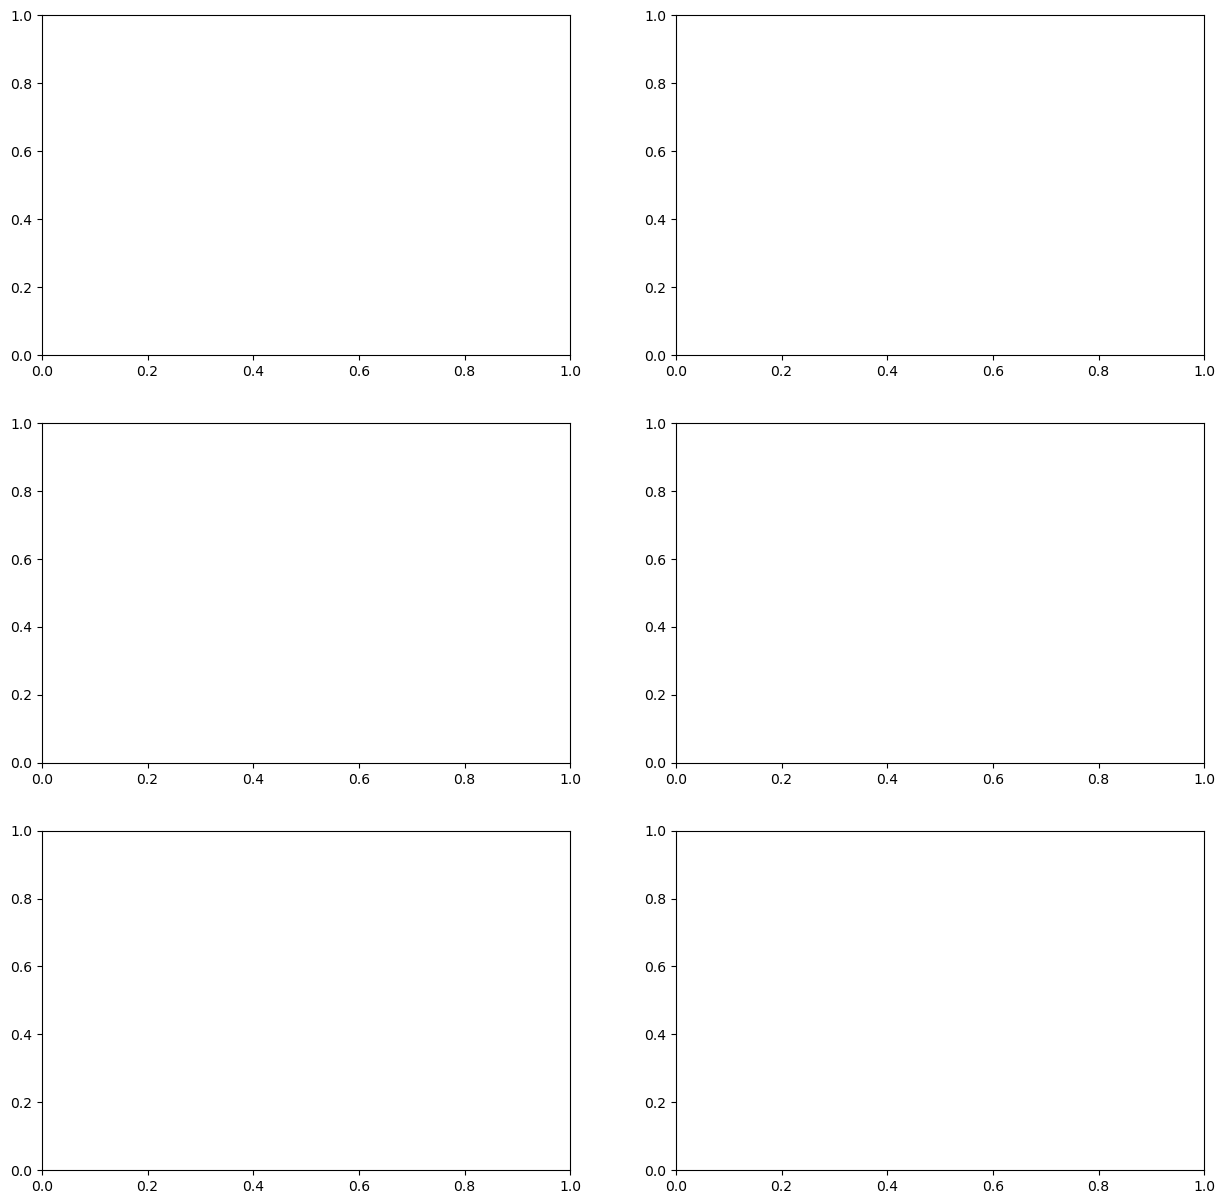

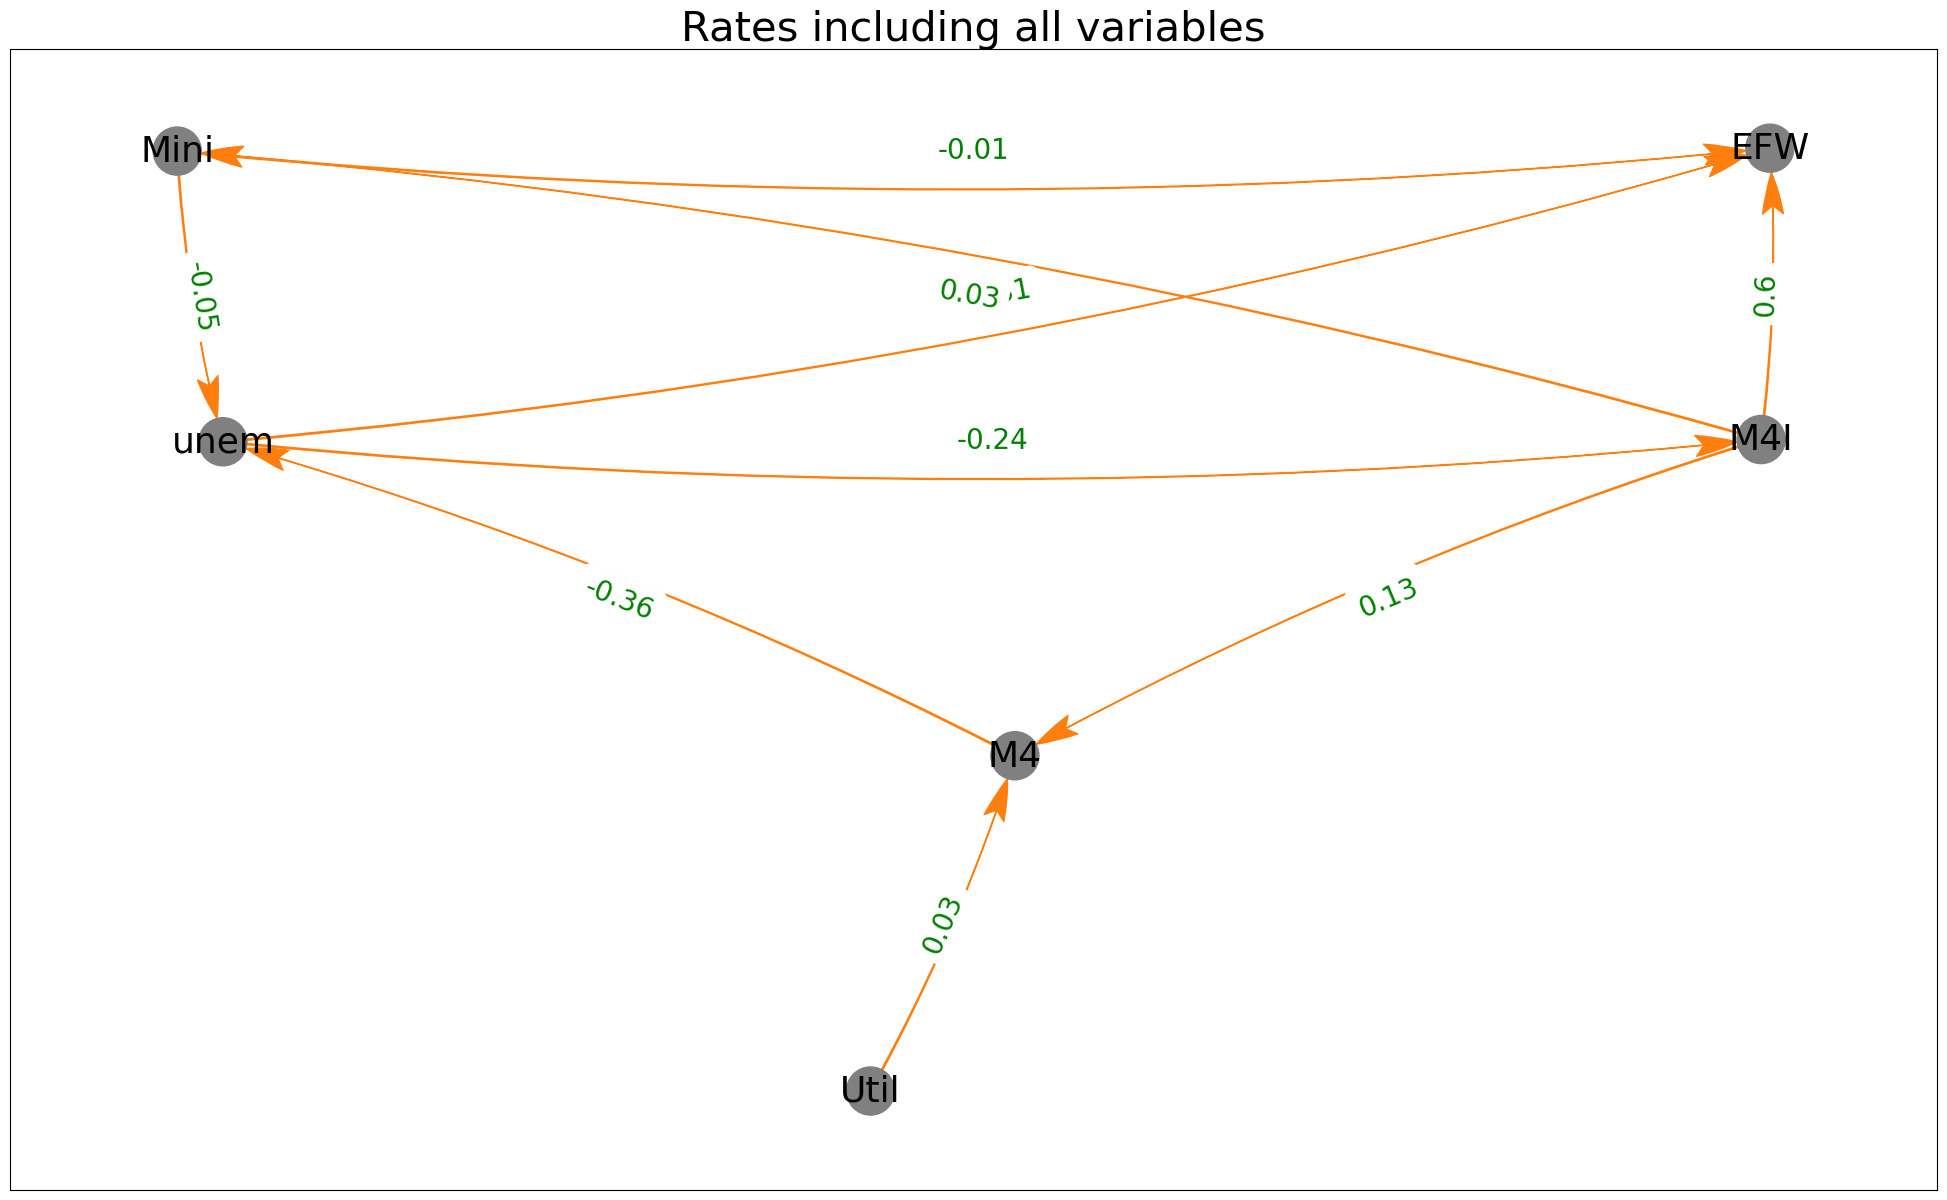

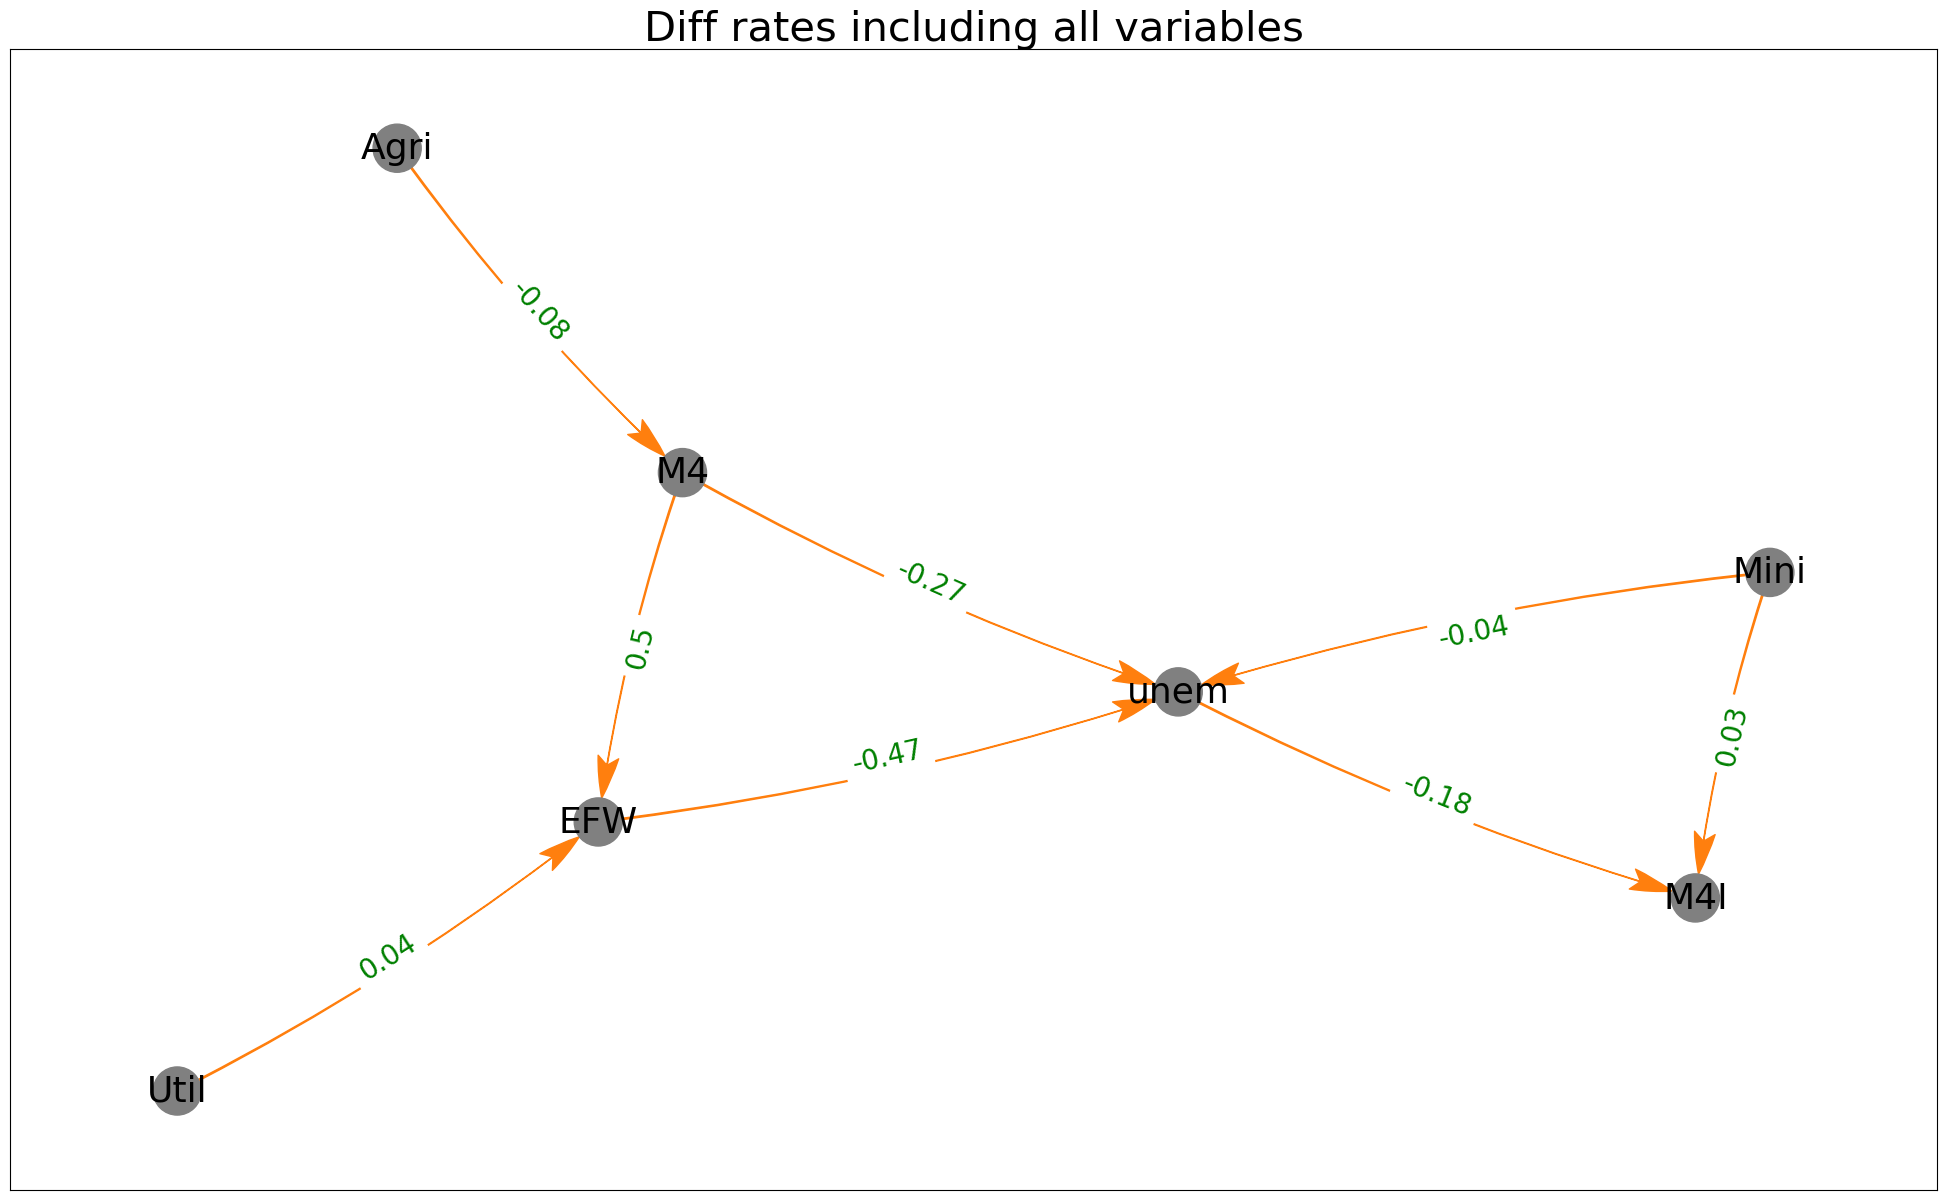

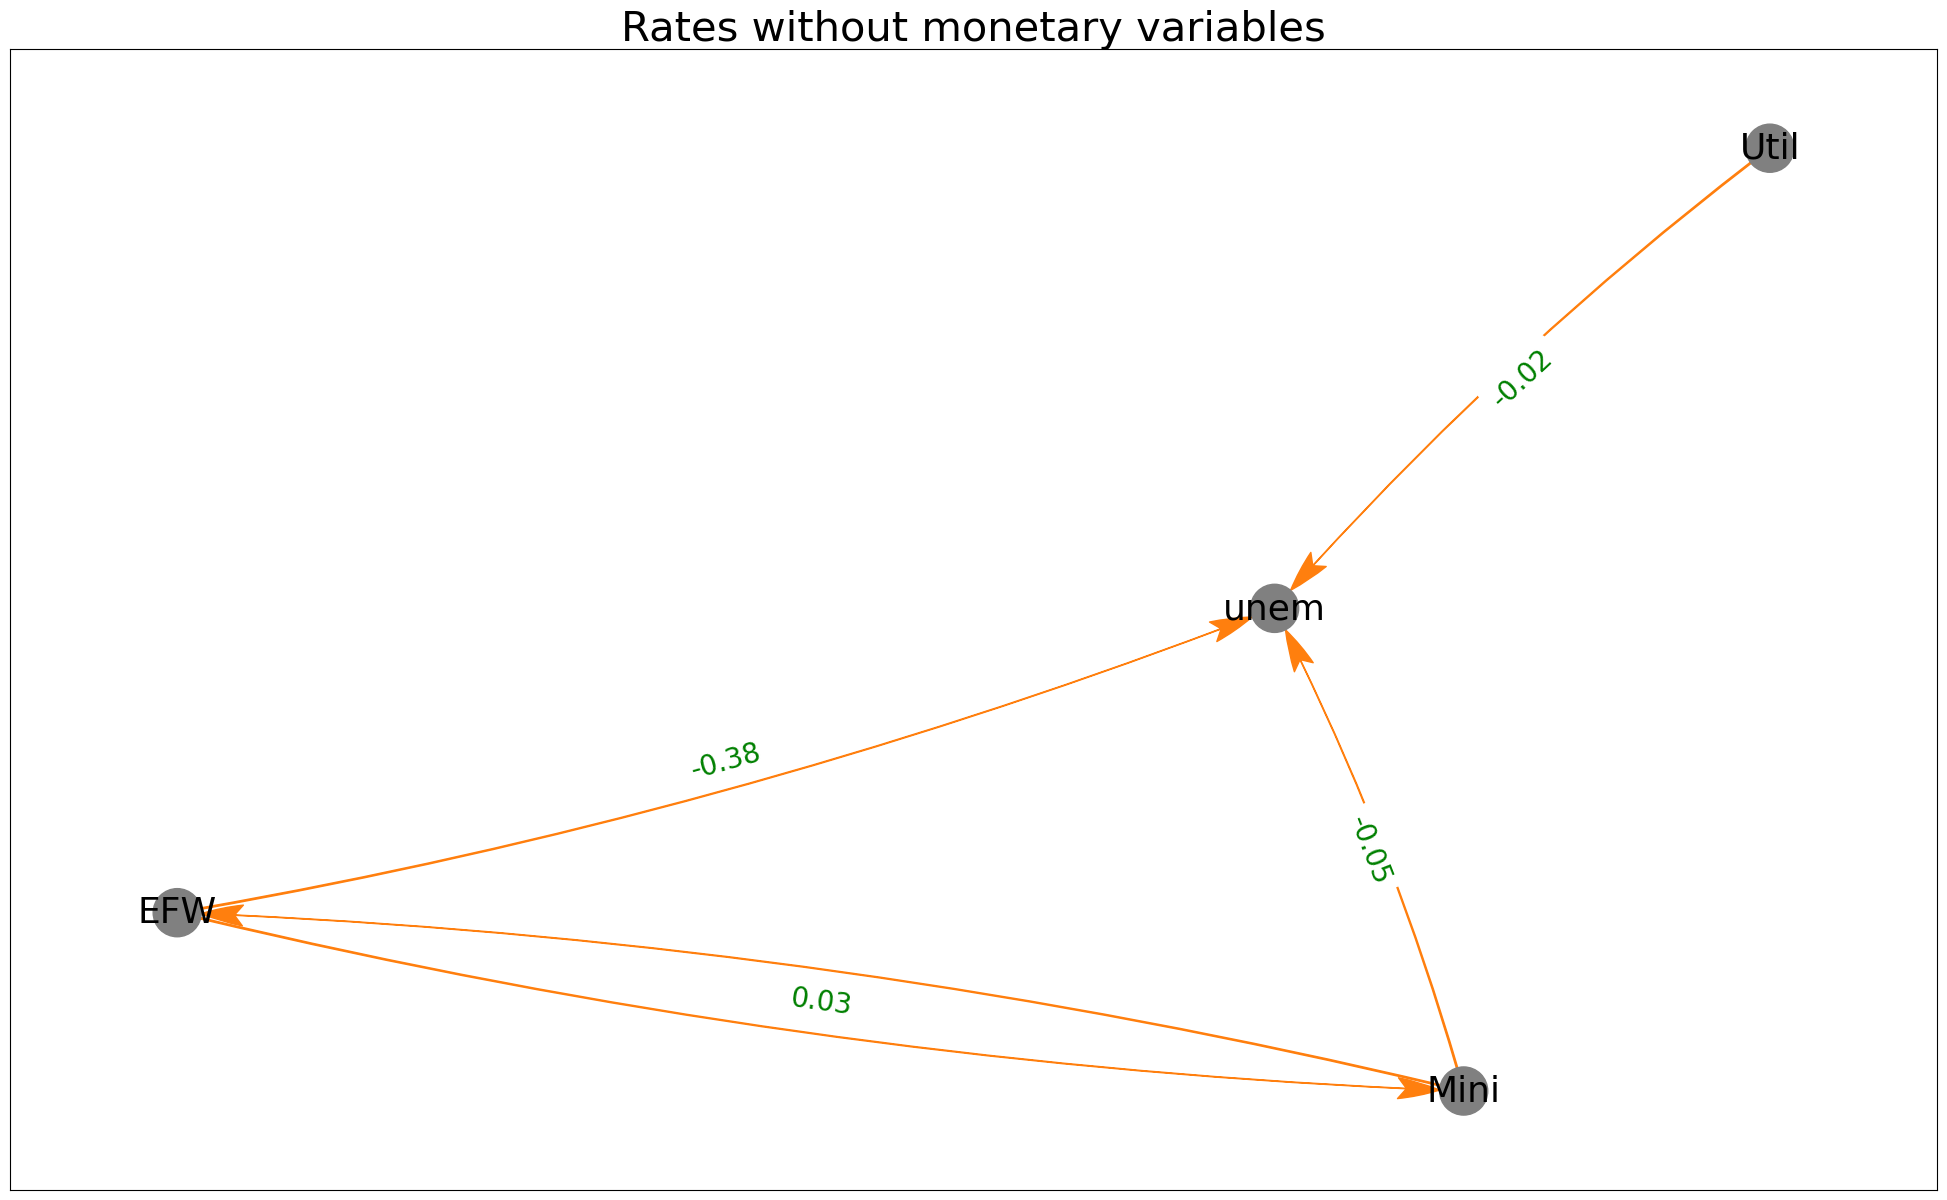

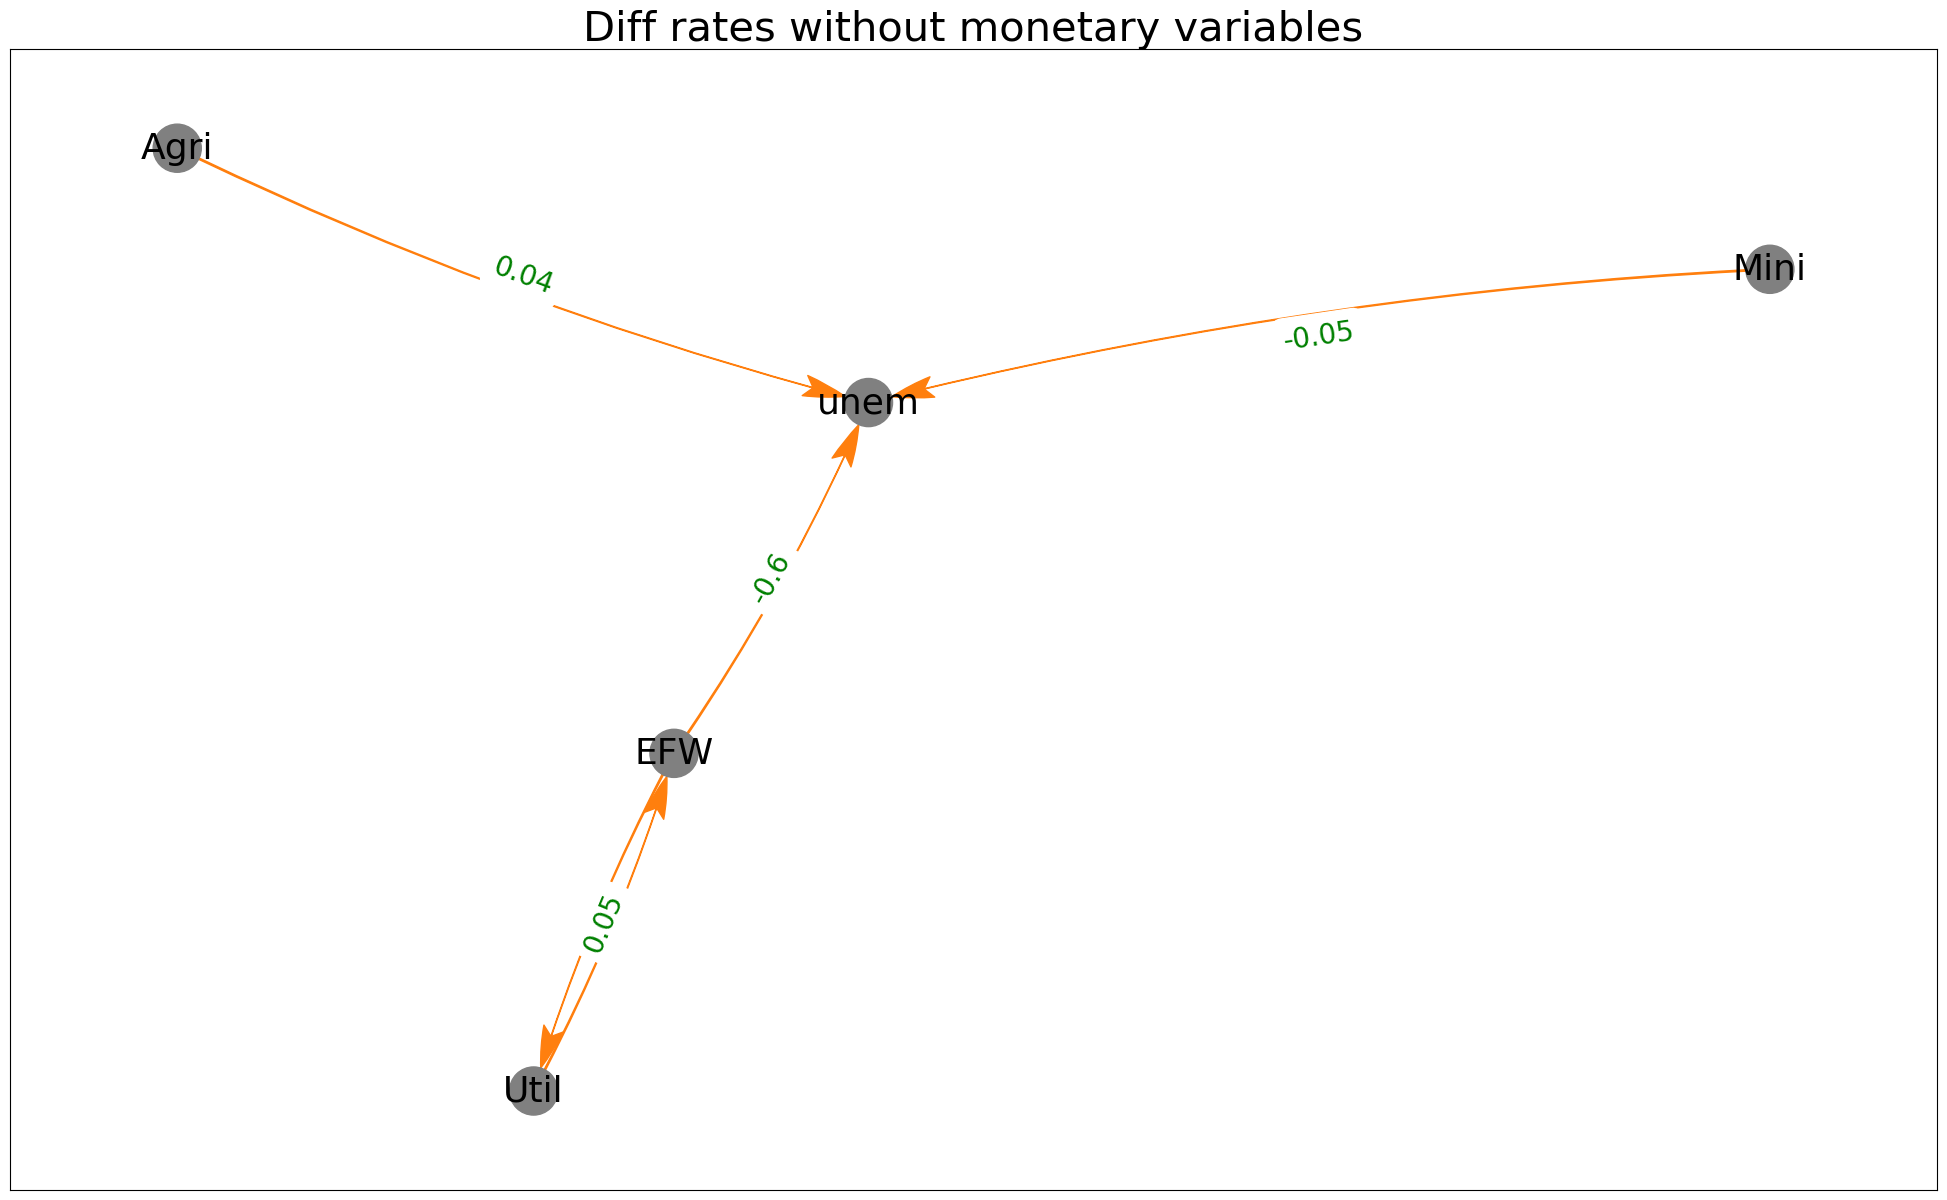

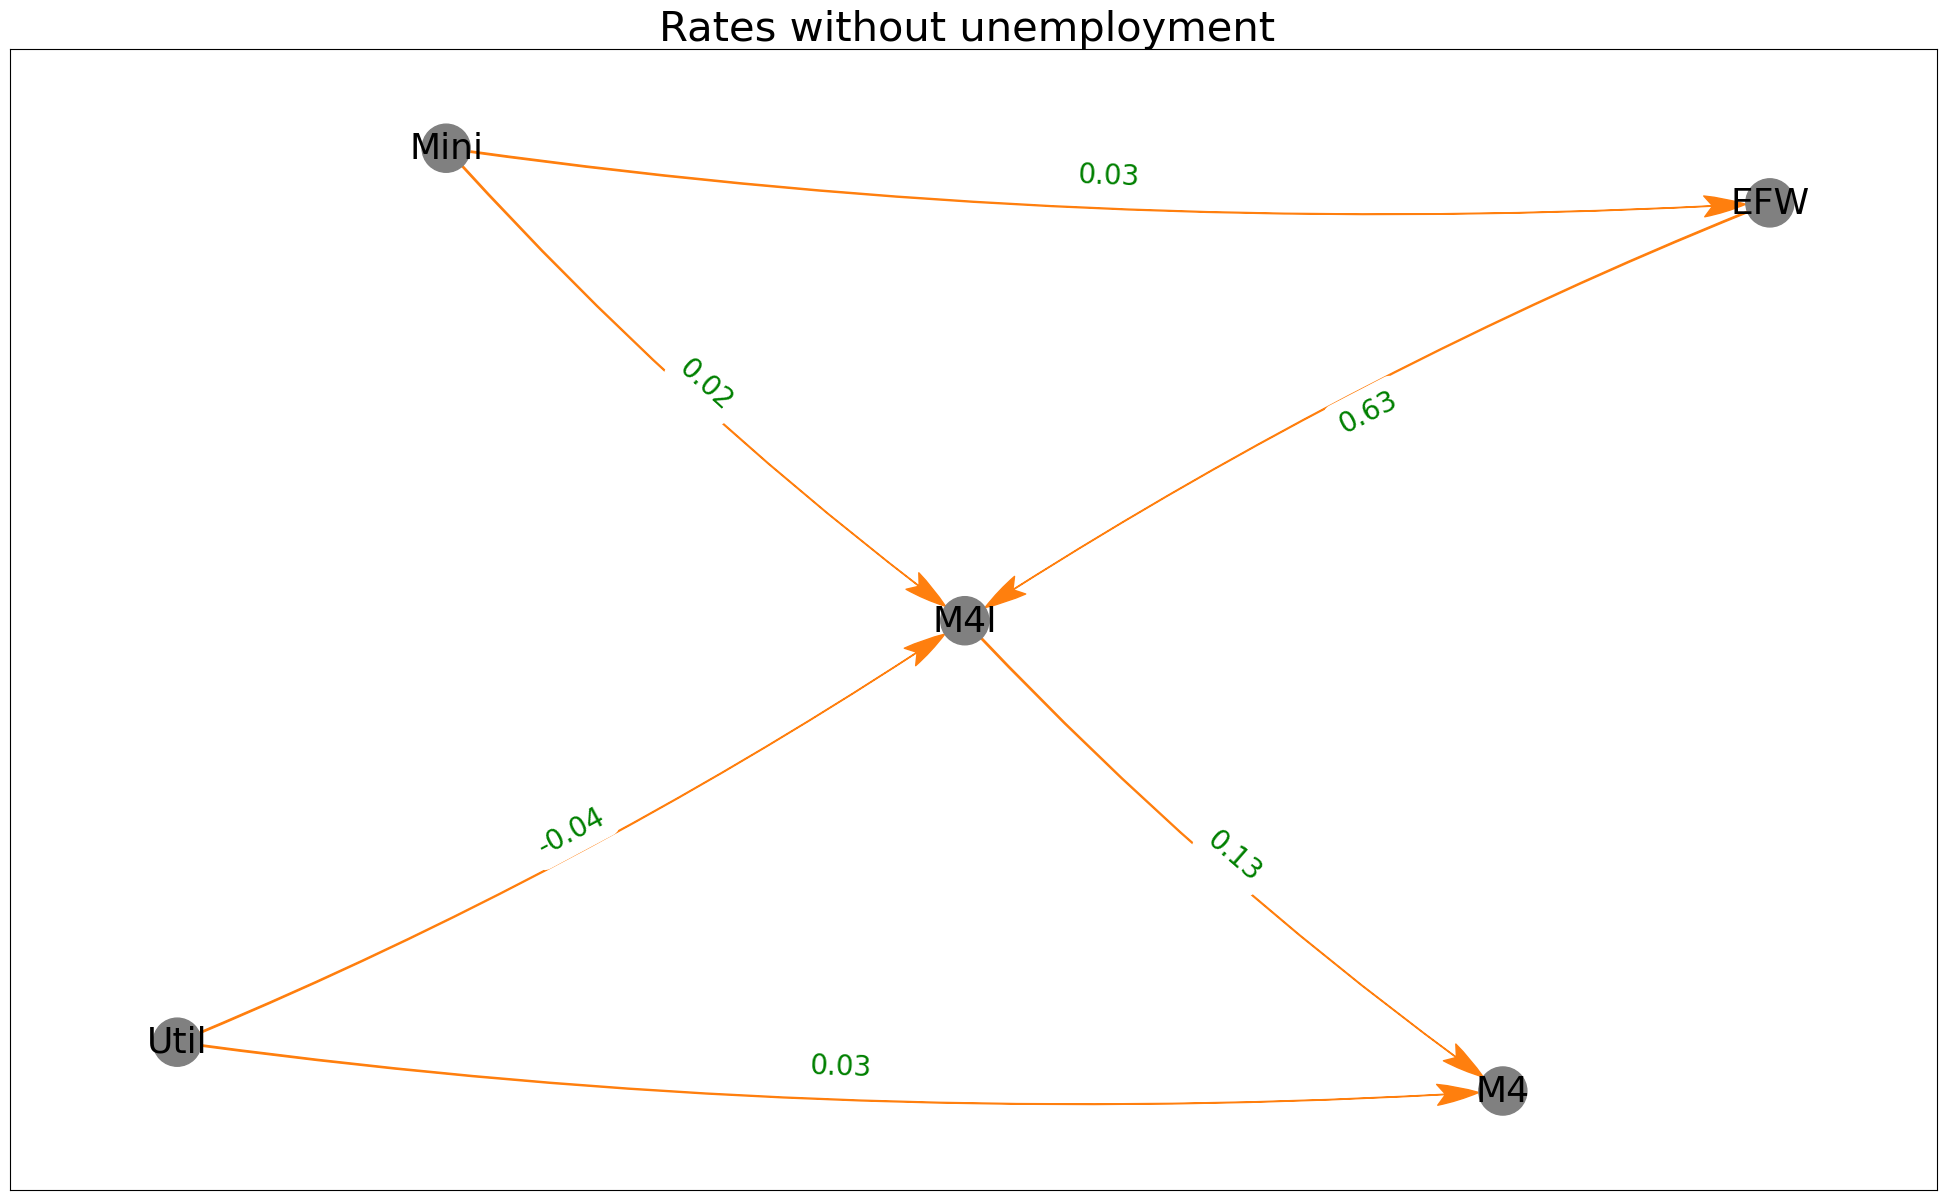

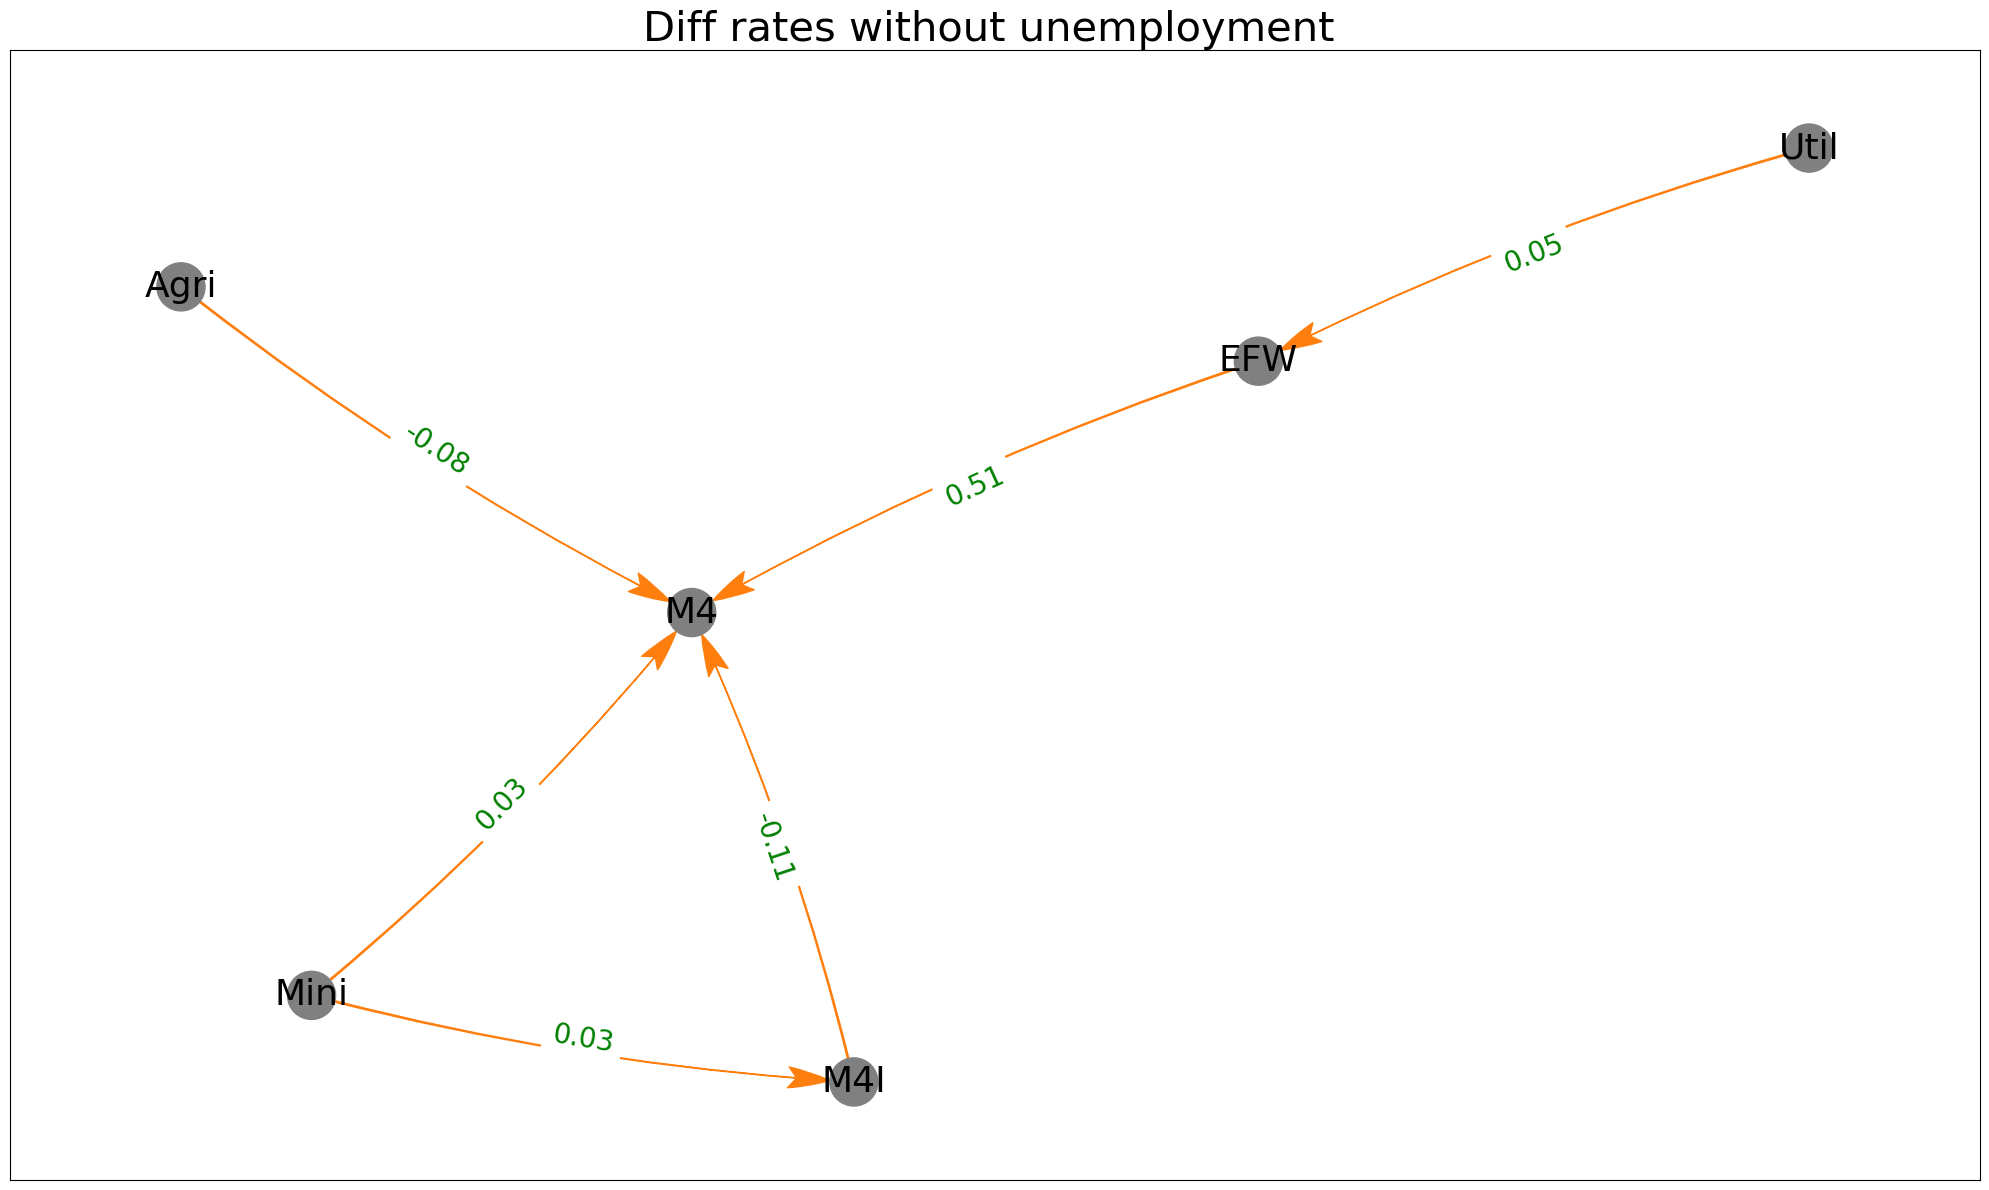

In [7]:
title = [
        'Rates including all variables',
        'Diff rates including all variables',
        'Rates without monetary variables',
        'Diff rates without monetary variables',
        'Rates without unemployment ',        
        'Diff rates without unemployment ']

# # Number of rows and columns for the subplot grid
n_rows = (len(title) + 1) // 2
n_cols = 2

# # Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# # Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot DAGs for each dataframe
for i, key in enumerate([
                         'Nominal rates (All variables)',
                         'Nominal diff rates (All variables)',
                         'Nominal rates (without Monetary)',
                         'Nominal diff rates (without Monetary)',
                         'Nominal rates (without unem)',                        
                         'Nominal diff rates (without unem)']):
    plot_df = full_DAG_dict[key]
    c = PC(plot_df)
    max_cond_vars = len(plot_df.keys()) - 2
    model = c.estimate(return_type='pdag', variant='orig', significance_level=0.01,
                       max_cond_vars=max_cond_vars, ci_test='pearsonr')
    edges = model.edges

    # Plot the DAG
    ax=axes[i]
    graph_DAG(edges, plot_df, title=title[i], ax=ax)
    
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save the figure as a picture
plt.savefig('dags_grid.png', dpi=300, bbox_inches='tight')

Import dataframes for and fit the models (WLS and PooledOLS)

In [8]:
full_df_rates_cluster = pd.read_csv('full_df_rates_cluster.csv')
full_df_rates_cluster.drop(columns=['Unnamed: 0'], inplace=True)

full_df_diff_cluster = pd.read_csv('full_df_diff_cluster.csv')
full_df_diff_cluster.drop(columns=['Unnamed: 0'], inplace=True)

full_df_log_cluster = pd.read_csv('full_df_log_cluster.csv')
full_df_log_cluster.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
from abbeyFunctions import graph_DAG_cluster, create_cluster_dags, determine_p_value

In [10]:
full_df_with_cluster = {}

full_df_with_cluster['Rates'] = full_df_rates_cluster.dropna().set_index(['FIPS', 'TimePeriod'])
full_df_with_cluster['Diff rates'] = full_df_diff_cluster.dropna().set_index(['FIPS', 'TimePeriod'])

In [11]:
# List of dataframes
dataframes = list(full_df_with_cluster.values())

# List of p-values for each dataframe
p_values_list = [0.1, 0.05, 0.01, 0.001]

# Define names for the output files based on dataframes
output_names = [f'clusters_b{i+1}' for i in range(len(dataframes))]

In [12]:
from matplotlib.backends.backend_pdf import PdfPages

In [13]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
import copy
from pgmpy.estimators import PC

def graph_DAG_cluster(edges, df, title="", algorithm="parallel", ax=None, sig_vals=[0.05, 0.01, 0.001], pp=None):
    graph = nx.DiGraph()

    def build_edge_labels(edges, df, sig_vals):
        edge_labels = {}
        for edge in edges:
            controls = [key for key in df.keys() if key not in edge]
            controls = list(set(controls))
            keep_controls = []
            for control in controls:
                control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
                if (control, edge[1]) in control_edges:
                    keep_controls.append(control)

            pcorr = df.partial_corr(x=edge[0], y=edge[1], covar=keep_controls, method="pearson")
            label = str(round(pcorr["r"][0], 2))
            pvalue = pcorr["p-val"][0]

            for sig_val in sig_vals:
                if pvalue < sig_val:
                    label = label + "*"

            edge_labels[edge] = label
        return edge_labels

    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 12))

    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    graph.nodes()
    plt.tight_layout()
    pos = graphviz_layout(graph, prog='neato')

    edge_labels = build_edge_labels(edges, df, sig_vals=sig_vals)

    edge_labels2 = []
    for u, v, d in graph.edges(data=True):
        if pos[u][0] > pos[v][0]:
            if (v, u) in edge_labels.keys():
                edge_labels2.append(((u, v,), f'{edge_labels[u, v]}\n\n\n{edge_labels[(v, u)]}'))
        if (v, u) not in edge_labels.keys():
            edge_labels2.append(((u, v,), f'{edge_labels[(u, v)]}'))
    edge_labels = dict(edge_labels2)

    nx.draw_networkx(graph, pos, node_color=color_map, node_size=1200,
                     with_labels=True, arrows=True,
                     font_color="white",
                     font_size=10, alpha=1,
                     width=2, edge_color="C1",
                     arrowstyle="Fancy, head_length=2, head_width=1.5, tail_width=.1",
                     ax=ax)
    nx.draw_networkx_edge_labels(graph,
                                 pos=pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=8,
                                 ax=ax)

    # Add title to the DAG
    ax.set_title(title)

    # Save to PDF if a PdfPages object is provided
    if pp:
        pp.savefig(ax.figure, bbox_inches='tight')

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

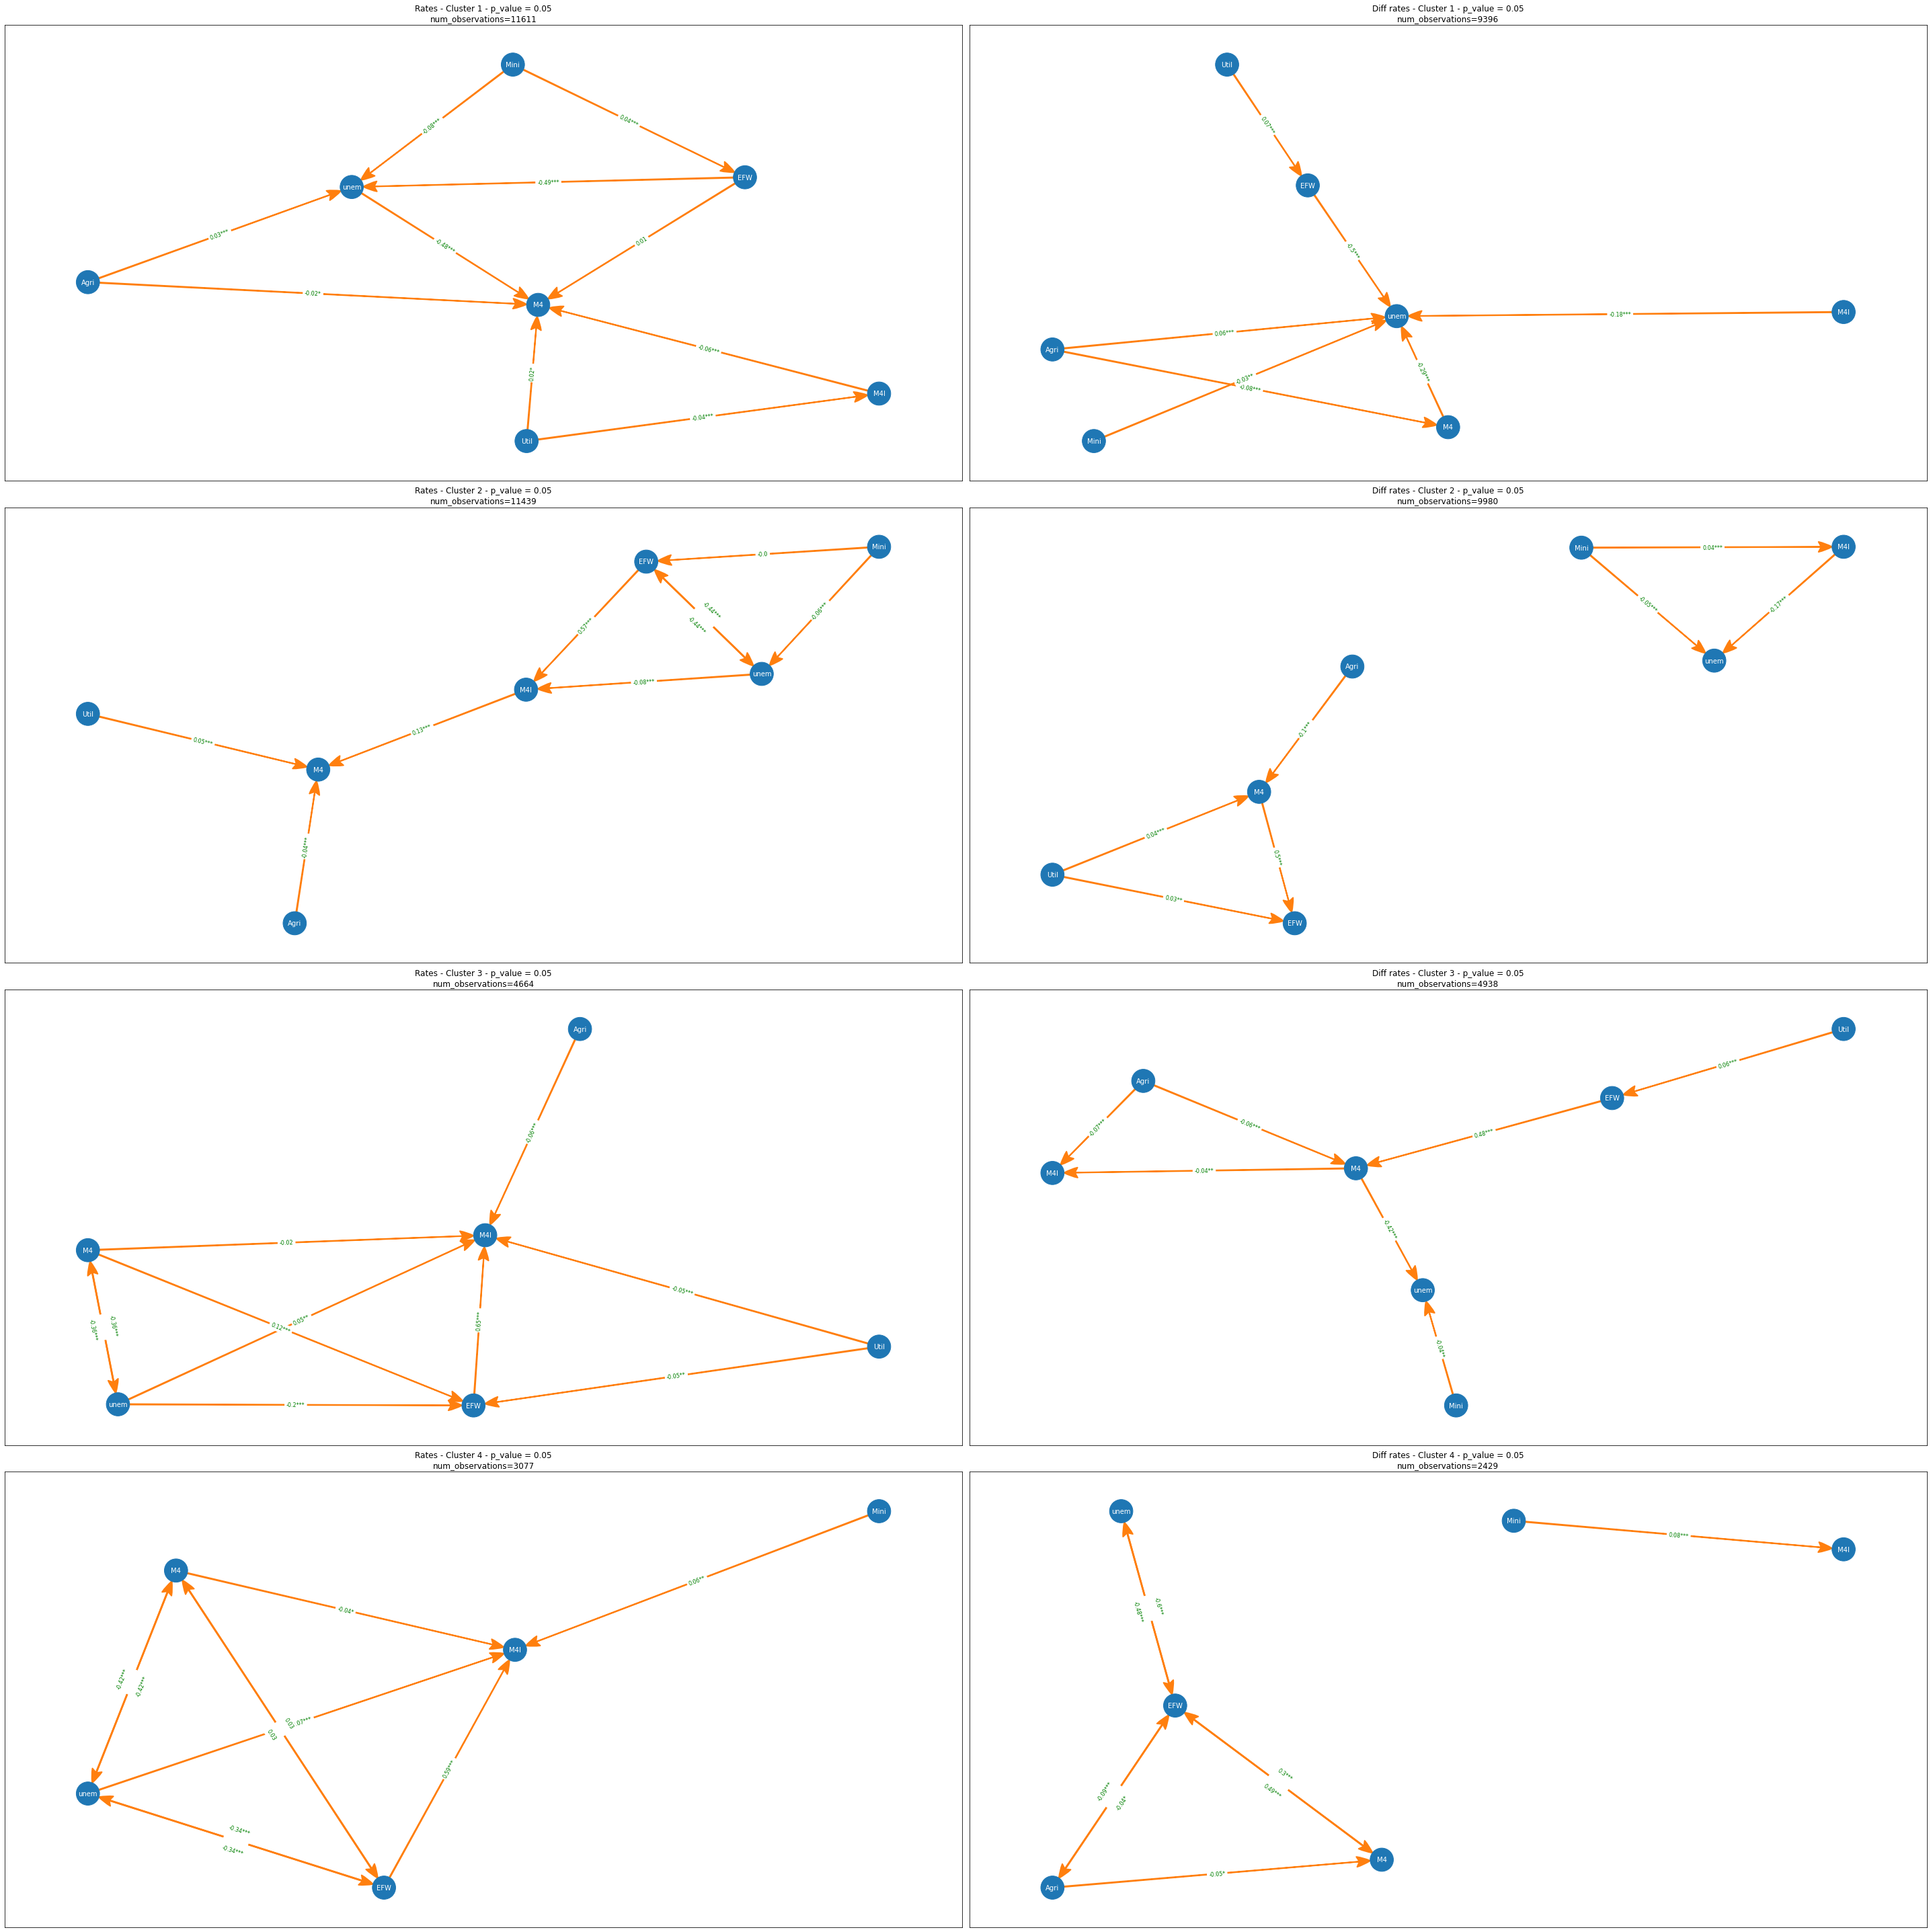

In [14]:
# Specify the absolute path for the output PDF file
pdf_file_path = f"DAGOutputs_{len(dataframes)}_dataframes.pdf"
pp = PdfPages(pdf_file_path)

# Grid for the subplots
fig, axes = plt.subplots(4, len(dataframes), figsize=(20*len(dataframes), 40))

# Different PC algorithms to test
algorithms = ["orig"]

dataframe_names = {
    "Dataframe 1": "Rates",
    "Dataframe 2": "Diff rates"
}

# Iterate over each dataframe
for idx, dataframe in enumerate(dataframes):
    # Get clustered dataframes for the current dataframe
    clustered_dfs = create_cluster_dags(dataframe)

    # Iterate over clustered dataframes and determine p-values dynamically
    for cluster_idx, cluster_df in enumerate(clustered_dfs):
        n = cluster_df.shape[0]  # Number of observations for the current cluster
        p_value = determine_p_value(n)

        # Iterate over different PC algorithms
        for algorithm in algorithms:
            c = PC(cluster_df)
            model = c.estimate(return_type='pdag', variant=algorithm, significance_level=p_value, ci_test='pearsonr')
            edges = model.edges

            graph_DAG_cluster(edges, cluster_df, title=f'{dataframe_names["Dataframe "+str(idx+1)]} - Cluster {cluster_idx + 1} - p_value = {p_value}\nnum_observations={n}'
                      , algorithm=algorithm, ax=axes[cluster_idx, idx], pp=pp)

# Save the figure to the PDF
# pp.savefig(fig, bbox_inches='tight')

plt.tight_layout()

plt.savefig('dags_clusters.png', dpi=300, bbox_inches='tight')

pp.close()

Here we use a function to fit the models and compare their results side by side.

In [15]:
# Convert boolean columns to integer columns
def convert_bool_to_int(df):
    for col in df.select_dtypes(include='bool').columns:
        df[col] = df[col].astype(int)
    return df

data_cluster_dict = {
    'Nominal rates with clusters': convert_bool_to_int(pd.get_dummies(full_df_rates_cluster, columns=['clusters'], drop_first=True)),
    'Nominal diff rates with clusters': convert_bool_to_int(pd.get_dummies(full_df_diff_cluster, columns=['clusters'], drop_first=True)),
    'Nominal log with clusters': convert_bool_to_int(pd.get_dummies(full_df_log_cluster, columns=['clusters'], drop_first=True))
}


In [16]:
df_rates = data_cluster_dict['Nominal rates with clusters']

df_diff = data_cluster_dict['Nominal diff rates with clusters']

### Regression comparison function

In [17]:
from scipy.stats import t

def compare_regression_results(results_df1, results_df2):
    comparison_dict = {}

    for index1, row1 in results_df1.iterrows():
        for index2, row2 in results_df2.iterrows():
            model1 = row1['Model']
            model2 = row2['Model']
            
            key = f"{model1} vs {model2}"
            comparison_dict[key] = {}

            variables = set(row1['Model'].split(', ')) & set(row2['Model'].split(', '))
            for var in variables:
                if var == 'const':
                    continue  # Skip constant as it's set to NaN

                mean1 = row1[var]
                mean2 = row2[var]
                se1 = row1[f'{var}_SE']
                se2 = row2[f'{var}_SE']

                # Calculate difference in means
                diff_in_means = mean1 - mean2
                
                # Calculate standard error of the difference in means
                se_diff = np.sqrt(se1**2 + se2**2)
                
                # Calculate t-statistic
                t_stat = diff_in_means / se_diff
                
                # Calculate degrees of freedom using the Welch-Satterthwaite equation
                df = (se1**2 / len(results_df1) + se2**2 / len(results_df2))**2 / (
                    (se1**2 / len(results_df1))**2 / (len(results_df1) - 1) +
                    (se2**2 / len(results_df2))**2 / (len(results_df2) - 1))
                
                # Calculate p-value
                p_value = 2 * (1 - t.cdf(np.abs(t_stat), df))

                comparison_dict[key][var] = {
                    'mean1': mean1,
                    'mean2': mean2,
                    'diff_in_means': diff_in_means,
                    't_stat': t_stat,
                    'p_value': p_value
                }

    return comparison_dict


In [18]:
import pandas as pd
import numpy as np

def display_comparisons(comparison_dict, comparisons, column_names):
    def p_value_to_stars(p):
        if p < 0.01:
            return '***'
        elif p < 0.05:
            return '**'
        elif p < 0.1:
            return '*'
        else:
            return ''

    # Initialize a dictionary to collect data
    comparison_data = {name: {} for name in column_names}

    # Iterate over the specified comparisons
    for comparison, col_name in zip(comparisons, column_names):
        if comparison in comparison_dict:
            metrics = comparison_dict[comparison]
            for var, values in metrics.items():
                diff_in_means = values['diff_in_means']
                t_stat = values['t_stat']
                p_value = values['p_value']
                stars = p_value_to_stars(p_value)

                comparison_data[col_name][var] = f"{diff_in_means:.4f}{stars}<br>({t_stat:.2f})"

    # Create a DataFrame from the comparison data
    comparison_df = pd.DataFrame(comparison_data).reset_index().rename(columns={'index': 'Variable'})

    # Legend for the stars
    legend = """
    <br>
    <b>Legend:</b><br>
    ***: p < 0.01<br>
    **: p < 0.05<br>
    *: p < 0.1<br>
    : p >= 0.1
    """

    return comparison_df, legend

## Comparing the difference in means

### Rates ols: k-fold vs full

In [19]:
# Compare results
# comparison_dict = compare_regression_results(results_rates_ols, results_rates_ols_full)

In [20]:

# comparisons = [
#     'const, M4, M4I vs const, M4, M4I',
#     'const, Agri, Mini, Util vs const, Agri, Mini, Util',
#     'const, Agri, Mini, Util, M4, M4I vs const, Agri, Mini, Util, M4, M4I',
#     'const, Agri, Mini, Util, EFW, M4, M4I vs const, Agri, Mini, Util, EFW, M4, M4I',
#     'const, Agri, Mini, Util, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0 vs const, Agri, Mini, Util, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0',
#     'const, Agri, Mini, Util, EFW, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0 vs const, Agri, Mini, Util, EFW, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0'
# ]

# column_names = [
#     "M4's only",
#     'Sectors only',
#     'M4+sectors',
#     'M4+sectors+EFW',
#     'M4+sectors+clusters',
#     'All variables'
# ]


# comparison_df, legend = display_comparisons(comparison_dict, comparisons, column_names)
# # Display the DataFrame and the legend
# from IPython.display import display, HTML
# display(HTML(comparison_df.to_html(escape=False, index=False) + legend))


### Function for displaying results in table format

In [21]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

def filter_results_table(results_dict, df_name, variable_combinations):
    # Extract the relevant dataframe from the results dictionary
    df_results = pd.DataFrame(results_dict[df_name])
    
    # Convert 'Model' column to sets of variables for easier comparison
    df_results['Model'] = df_results['Model'].apply(lambda x: set(x.split(', ')))
    
    # Convert each set of variables in variable_combinations to sets for comparison
    variable_combinations = [set(combo) for combo in variable_combinations]
    
    # Filter the DataFrame for rows where the 'Model' matches any of the variable combinations
    filtered_df = df_results[
        df_results['Model'].apply(lambda x: any(x == combo for combo in variable_combinations))
    ]
    
    return filtered_df

def significance_stars(p_value):
    if p_value < 0.01:
        return '***'
    elif p_value < 0.05:
        return '**'
    elif p_value < 0.1:
        return '*'
    else:
        return ''

def format_estimate(beta, std_error, p_value):
    stars = significance_stars(p_value)
    if pd.notna(std_error):
        return f"{beta:.4f}{stars}<br>({std_error:.4f})"
    return f"{beta:.4f}{stars}"

def display_results_table(filtered_df, variable_combinations, column_names=None, exclude_rows=None):
    if filtered_df.empty:
        print("No matching results found.")
        return
    
    # Dynamically determine variables and metrics from the filtered DataFrame
    variables_and_metrics = filtered_df.columns.tolist()
    variables_and_metrics.remove('Model')  # Remove 'Model' as it's used for filtering
    variables_and_metrics.remove('DataFrame')  # Remove 'DataFrame' as it's not a variable/metric

    # Initialize the result DataFrame with the index of all potential variables and metrics
    results_table = pd.DataFrame(index=variables_and_metrics)
    
    # Use custom column names if provided, otherwise use the variable combinations
    if column_names:
        assert len(column_names) == len(variable_combinations), "Length of column_names must match variable_combinations"
        model_columns = column_names
    else:
        model_columns = [', '.join(combo) for combo in variable_combinations]
    
    # Add each model's results to the table
    for model_vars, model_name in zip(variable_combinations, model_columns):
        model_data = filtered_df[filtered_df['Model'].apply(lambda x: x == model_vars)]
        
        if not model_data.empty:
            model_data = model_data.iloc[0]
            for var in variables_and_metrics:
                if var in model_data.index and not var.endswith('_SE') and not var.endswith('_p'):
                    # Skip adding data for excluded rows
                    if exclude_rows and var in exclude_rows:
                        continue
                    beta = model_data[var]
                    std_error = model_data.get(f'{var}_SE', np.nan)
                    p_value = model_data.get(f'{var}_p', np.nan)
                    
                    # Store formatted estimate even if std_error or p_value is NaN
                    results_table.loc[var, model_name] = format_estimate(beta, std_error, p_value)
    
    # Drop rows that have names ending with '_SE' or '_p'
    results_table = results_table[~results_table.index.str.endswith(('_SE', '_p'))]
    
    # Drop rows with all NaN values
    results_table.dropna(how='all', inplace=True)
    
    # Apply CSS styling to center align column headers
    results_table_styled = results_table.style.set_table_styles([
        {'selector': 'th.col_heading', 'props': [('text-align', 'center')]}
    ])
    
    # Display the results table with centered column headers
    display(results_table_styled)
    
    # Add the legend for significance stars
    legend_html = """
    <br><br>
    <strong>Significance legend:</strong><br>
    <strong>*</strong> p < 0.1<br>
    <strong>**</strong> p < 0.05<br>
    <strong>***</strong> p < 0.01
    """
    display(HTML(legend_html))

## Two-Stage Least Squares

In [22]:
df = df_rates.dropna()

### Manual 2SLS

In [1]:
# import statsmodels.api as sm
# df = sm.add_constant(df)

# # First stage regression
# first_stage = sm.OLS(df['M4I'], df[['const', 'M4', 'EFW', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']]).fit()
# df['M4I_hat'] = first_stage.predict(df[['const', 'M4', 'EFW', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']])

# # Second stage regression
# second_stage = sm.OLS(df['unem'], df[['const', 'M4I_hat', 'M4', 'Agri', 'Mini', 'Util', 'EFW', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']]).fit()

# # Summary of the second stage regression
# second_stage.summary()

### Instrument = M4 and M4I

In [2]:
# from linearmodels.iv import IV2SLS

# model = IV2SLS.from_formula(
#     'unem ~ 1 + Agri + Mini + Util + clusters_2.0 + clusters_3.0 + clusters_4.0 + [EFW ~ M4 + M4I]',
#     data=df
# )

# results = model.fit()

# results.summary

### Instrument = M4I

In [3]:
# from linearmodels.iv import IV2SLS

# model1 = IV2SLS.from_formula(
#     'unem ~ 1 + Agri + Mini + Util + M4 + clusters_2.0 + clusters_3.0 + clusters_4.0 + [M4I ~ EFW]',
#     data=df
# )

# results1 = model1.fit()

# results1.summary


In [26]:
# df_rates, df_diff

In [27]:
drop_columns = ['clusters_2.0',
  'clusters_3.0',
  'clusters_4.0']

In [28]:
df = df_rates.set_index(['FIPS', 'TimePeriod']).dropna()
df = df.drop(columns=drop_columns)

In [29]:
df1 = df_diff.set_index(['FIPS', 'TimePeriod']).dropna()
df1 = df1.drop(columns=drop_columns)

In [30]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in df.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

In [31]:
undirected_graph1 = {key:[] for key in df1.keys()}
for x in undirected_graph1:
    remaining_vars1 = [y for y in df1.keys() if y != x]
    for y in remaining_vars1:
        undirected_graph1[x].append(y)

In [32]:
import copy
p_val = .005
def build_skeleton(df, undirected_graph):    
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:

                c_used.append(c_var)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    #breakout of the for 
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)
                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)
                
    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
            # first check for correlation with no controls
                test = df.partial_corr(x = x, 
                                       y = y, 
                                       covar = None,
                                       method = "pearson") 
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
            # if correlated check for deseparation controlling for other variables
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

In [33]:
undirected_graph = build_skeleton(df, undirected_graph)                                   
undirected_graph

{'Agri': ['M4', 'M4I'],
 'Mini': ['M4I', 'unem'],
 'Util': ['M4', 'M4I'],
 'M4': ['Agri', 'Util', 'unem', 'EFW'],
 'M4I': ['Agri', 'Mini', 'Util', 'EFW'],
 'unem': ['Mini', 'M4', 'EFW'],
 'EFW': ['M4', 'M4I', 'unem']}

In [34]:
undirected_graph1 = build_skeleton(df1, undirected_graph1)                                   
undirected_graph1

{'Agri': ['M4'],
 'Mini': ['M4I', 'unem'],
 'Util': ['EFW'],
 'M4': ['Agri', 'unem', 'EFW'],
 'M4I': ['Mini', 'unem', 'EFW'],
 'unem': ['Mini', 'M4', 'M4I', 'EFW'],
 'EFW': ['Util', 'M4', 'M4I', 'unem']}

In [35]:
import matplotlib.pyplot as plt
import networkx as nx
def graph_DAG_ugraph(undirected_graph, df, title = "DAG Structure"):
    
    # generate partial correlation matrix to draw values from
    # for graph edges
    graph = nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key.replace(" ","\n"), key2[0].replace(" ","\n"))
                edges.append(edge)

    # edge format: ("i", "j") --> from node i to node j
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, 
                     node_size = 1000,
                     with_labels=True,  arrows=False,
                     font_size = 20, alpha = 1,
                     font_color = "white",
                     ax = ax)

    plt.axis("off")
    plt.savefig("g1.png", format="PNG")
    plt.show()

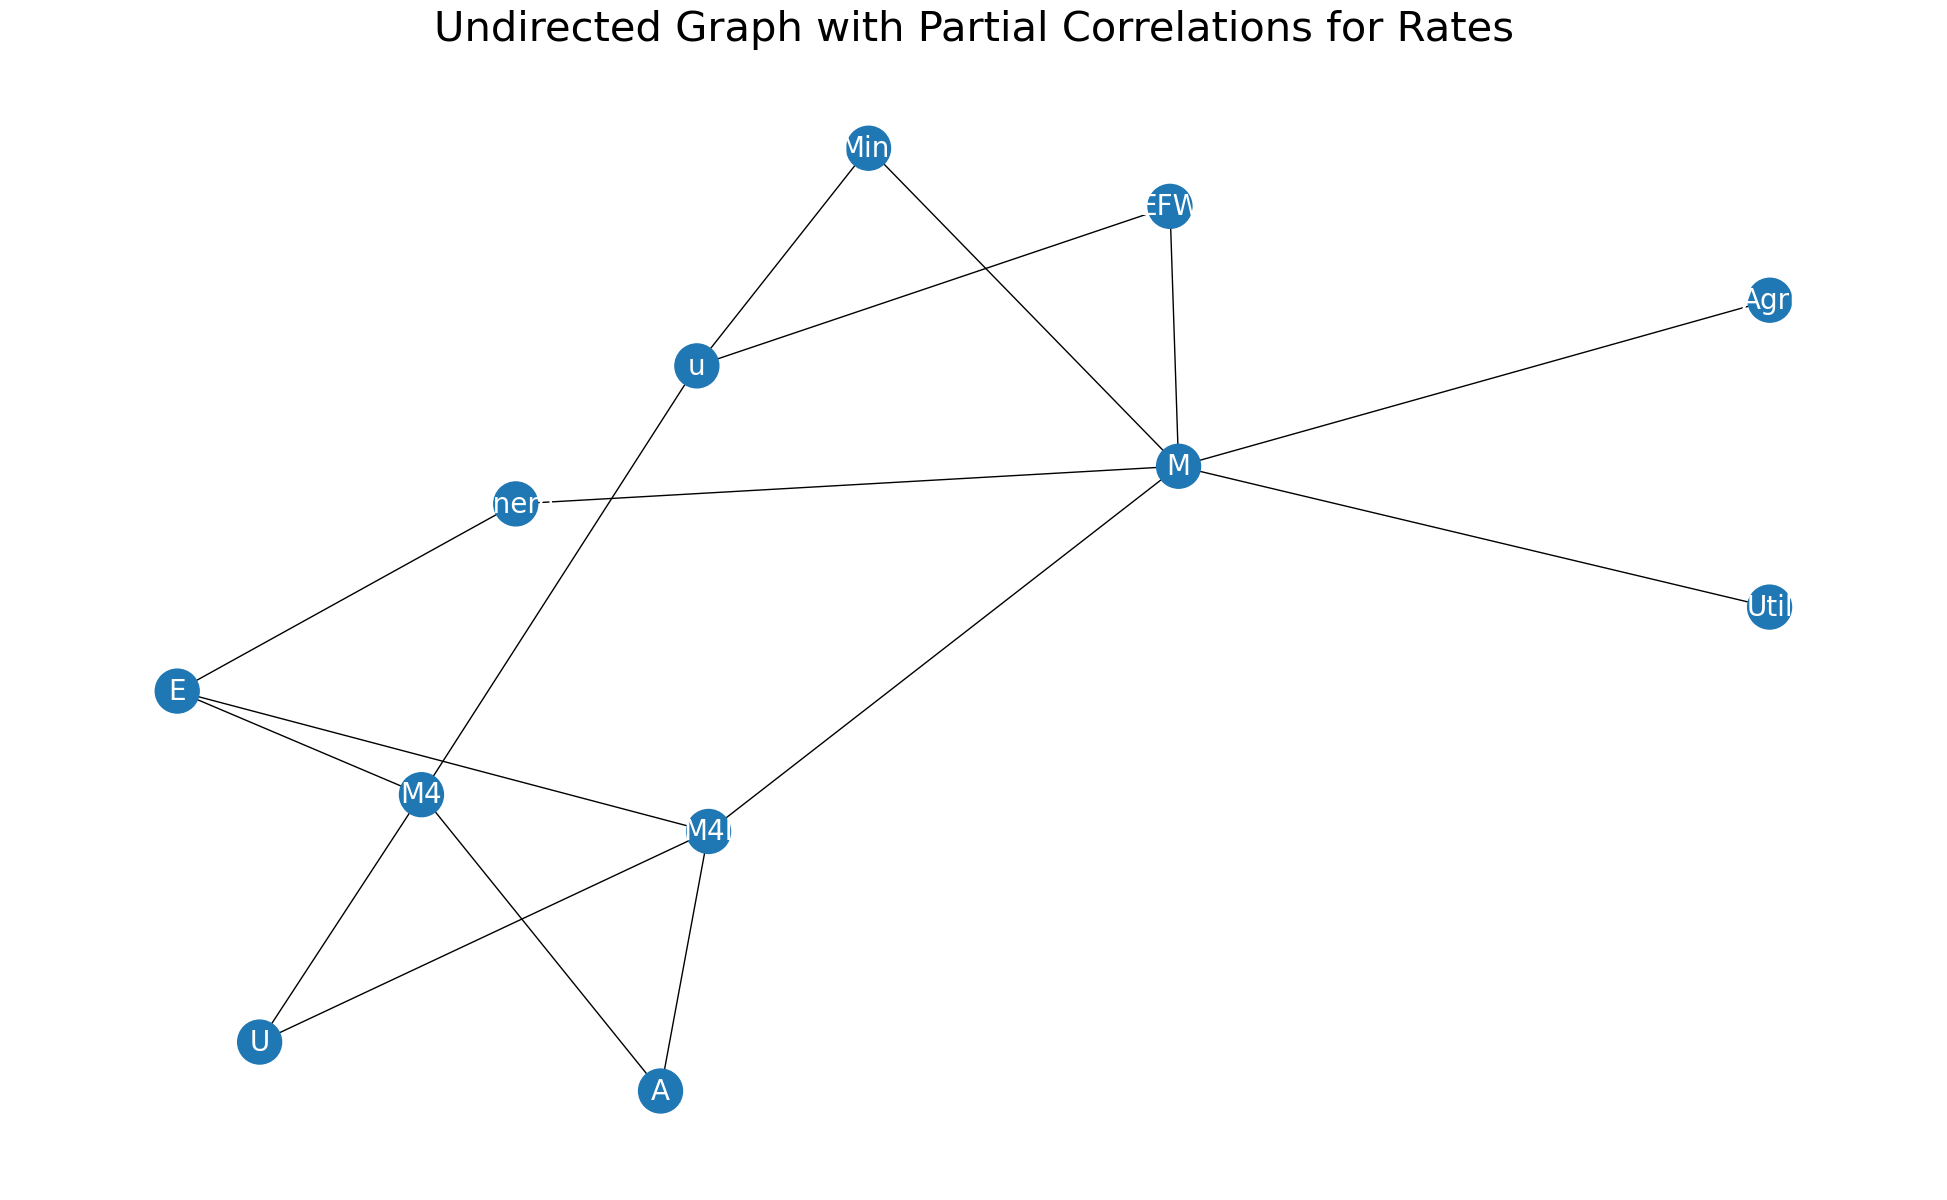

In [36]:
graph_DAG_ugraph(undirected_graph, df, title = "Undirected Graph with Partial Correlations for Rates")

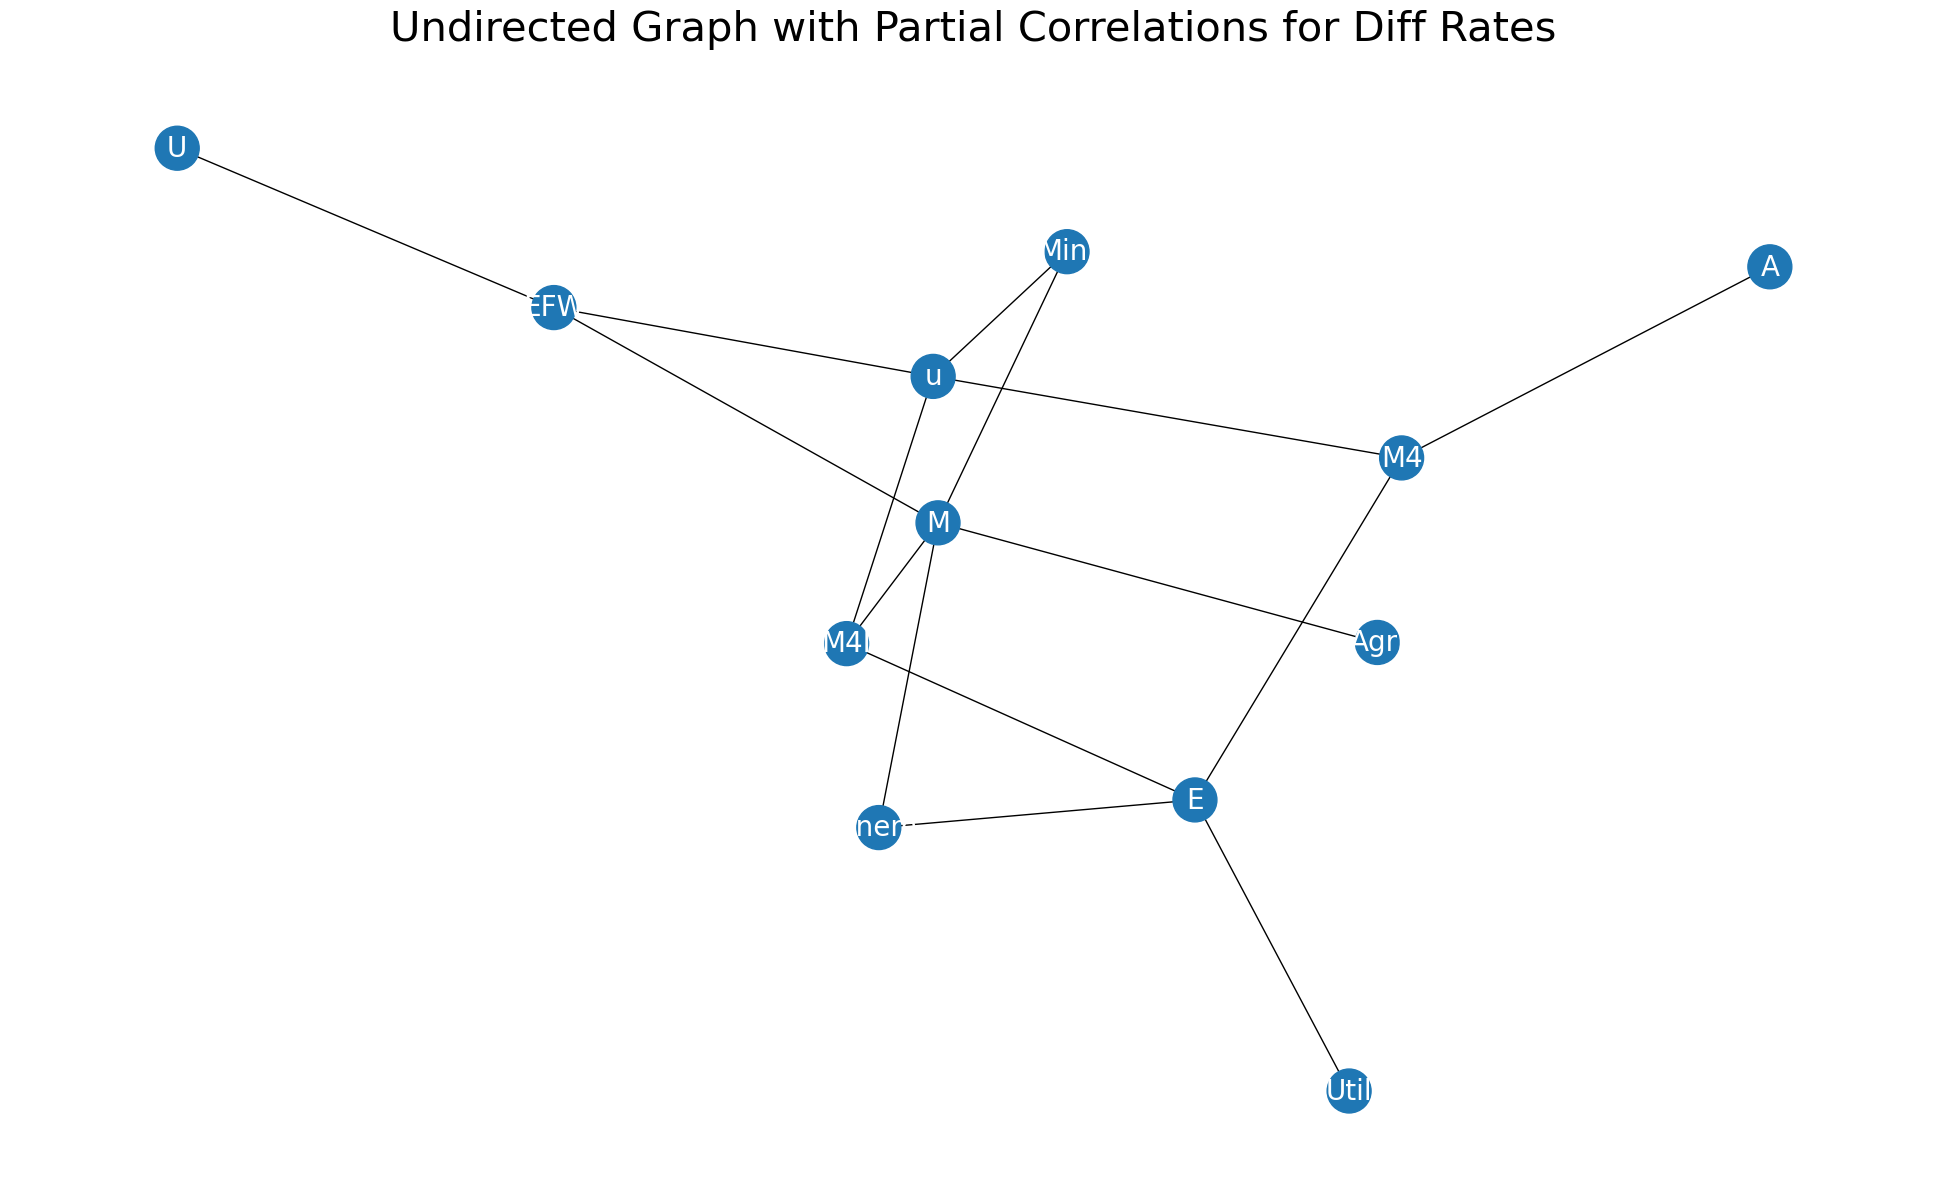

In [37]:
graph_DAG_ugraph(undirected_graph1, df1, title = "Undirected Graph with Partial Correlations for Diff Rates")

In [38]:
from pgmpy.estimators import PC
c = PC(df)
max_cond_vars = len(df.keys()) - 2

model = c.estimate(return_type = "dag",variant= "parallel",#"orig", "stable"
                   significance_level = p_val, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()

  0%|          | 0/5 [00:00<?, ?it/s]

In [39]:
from pgmpy.estimators import PC
c1 = PC(df1)
max_cond_vars1 = len(df1.keys()) - 2

model1 = c1.estimate(return_type = "dag",variant= "parallel",#"orig", "stable"
                   significance_level = p_val, 
                   max_cond_vars = max_cond_vars1, ci_test = "pearsonr")
edges1 = model1.edges()

  0%|          | 0/5 [00:00<?, ?it/s]

In [40]:
from matplotlib.patches import ArrowStyle
from pgmpy.estimators import PC
c = PC(df)
max_cond_vars = len(df.keys()) - 2

model = c.estimate(return_type = "dag",variant= "parallel",#"orig", "stable"
                   significance_level = p_val, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()

def graph_DAG_git(edges, df, title = ""):
    graph = nx.DiGraph()
    edge_labels = {}
    ############ Add ############
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)                
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
#         corr_matrix_heatmap(pcorr, save_fig = False, pp = None, title = "Partial Correlation")
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     # turn text black for larger variable names in homework
                     font_color = "k",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)
    ############ Add ############
    nx.draw_networkx_edge_labels(graph,pos,
                                edge_labels=edge_labels,
                                font_color='green',
                                font_size=20)

  0%|          | 0/5 [00:00<?, ?it/s]

keep control: M4I
('Util', 'M4') ['M4I']
keep control: Mini
('M4', 'unem') ['Mini']
('unem', 'M4I') []
keep control: M4I
keep control: Mini
('unem', 'EFW') ['M4I', 'Mini']
('M4I', 'Mini') []
keep control: Util
('M4I', 'M4') ['Util']
keep control: Mini
keep control: unem
('M4I', 'EFW') ['Mini', 'unem']
keep control: M4I
keep control: unem
('Mini', 'EFW') ['M4I', 'unem']
keep control: M4
('Mini', 'unem') ['M4']


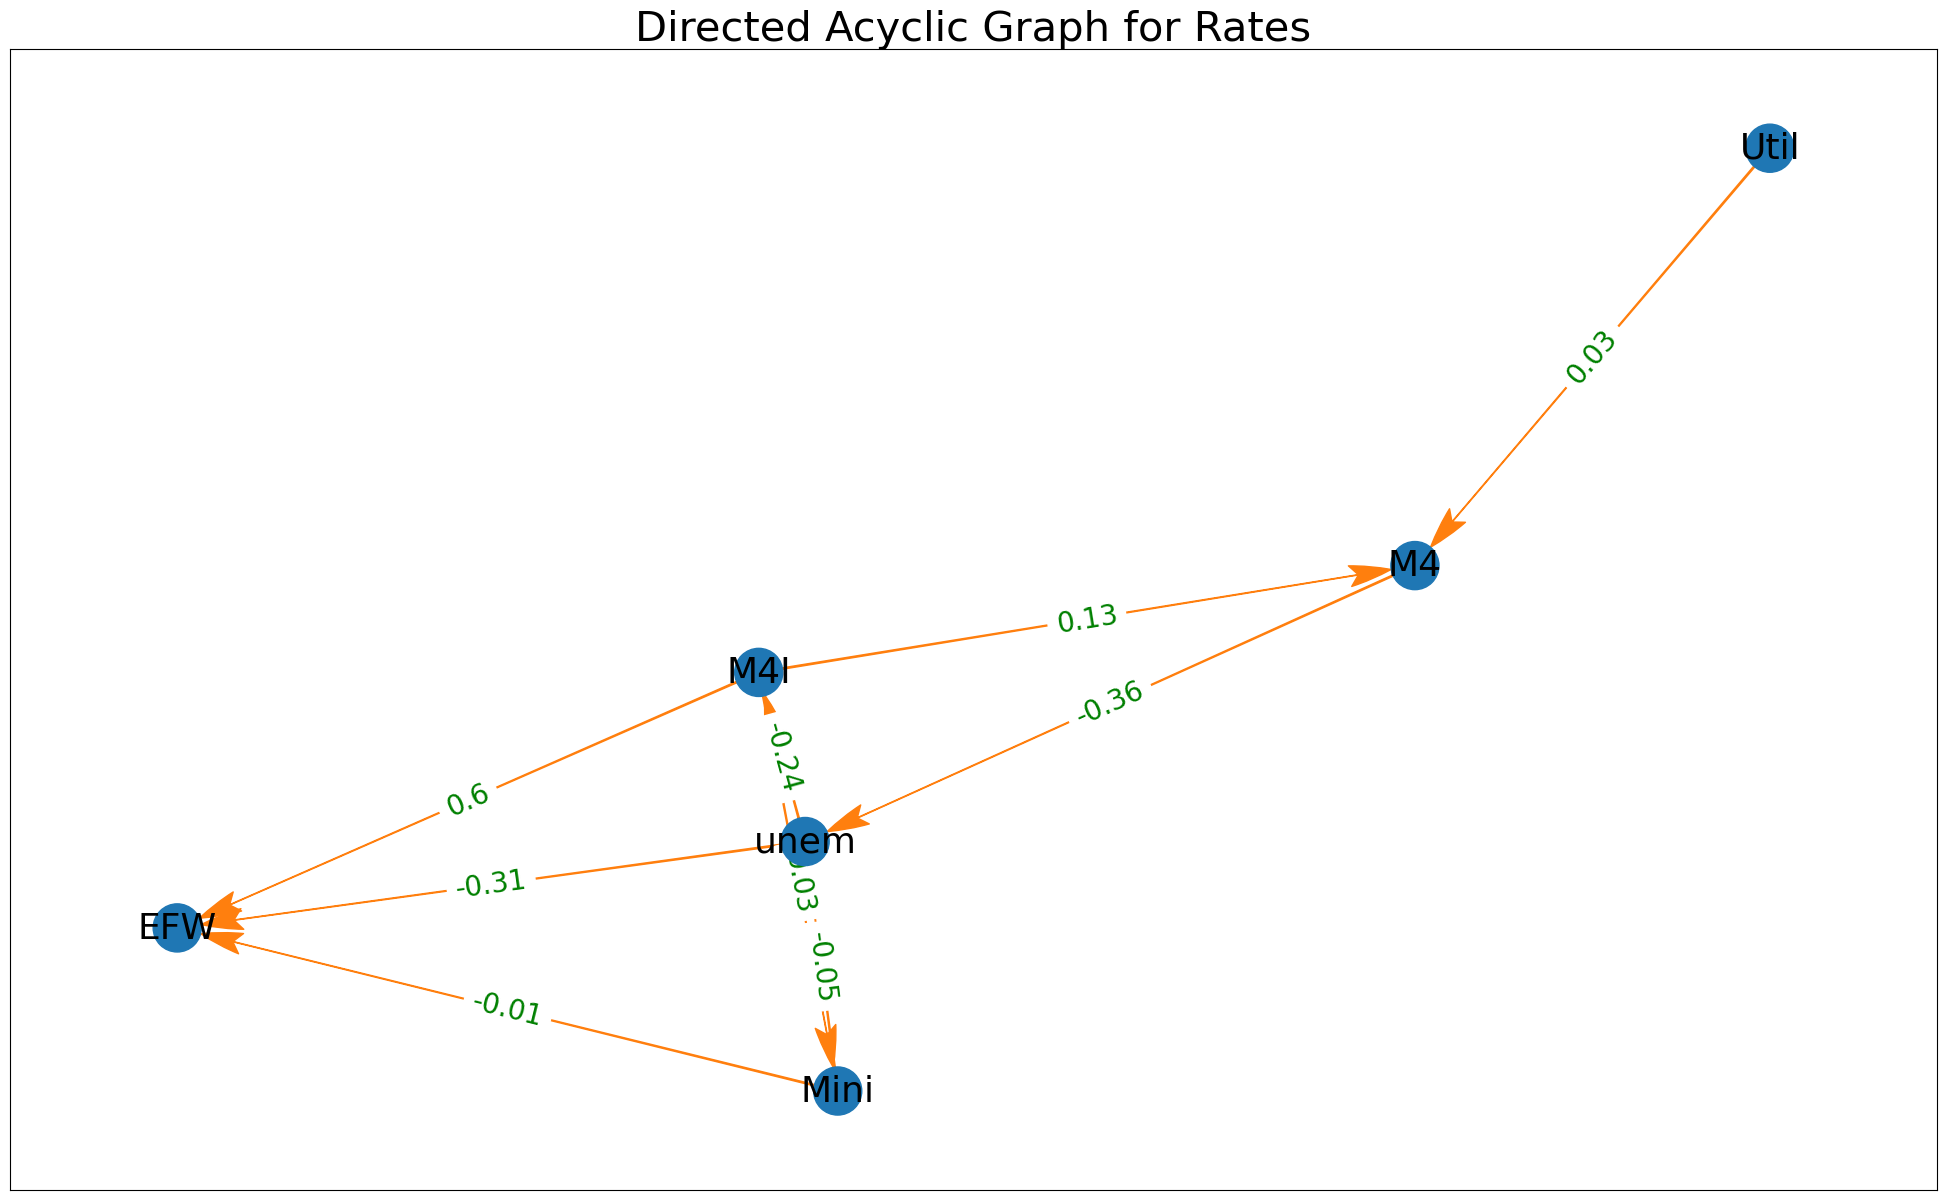

In [41]:
graph_DAG_git(edges, df, title = "Directed Acyclic Graph for Rates")

('Mini', 'M4I') []
keep control: M4
keep control: M4I
('Mini', 'unem') ['M4', 'M4I']
keep control: M4
keep control: Mini
('M4I', 'unem') ['M4', 'Mini']
keep control: M4I
keep control: Mini
('M4', 'unem') ['M4I', 'Mini']
('Agri', 'M4') []
('Util', 'EFW') []


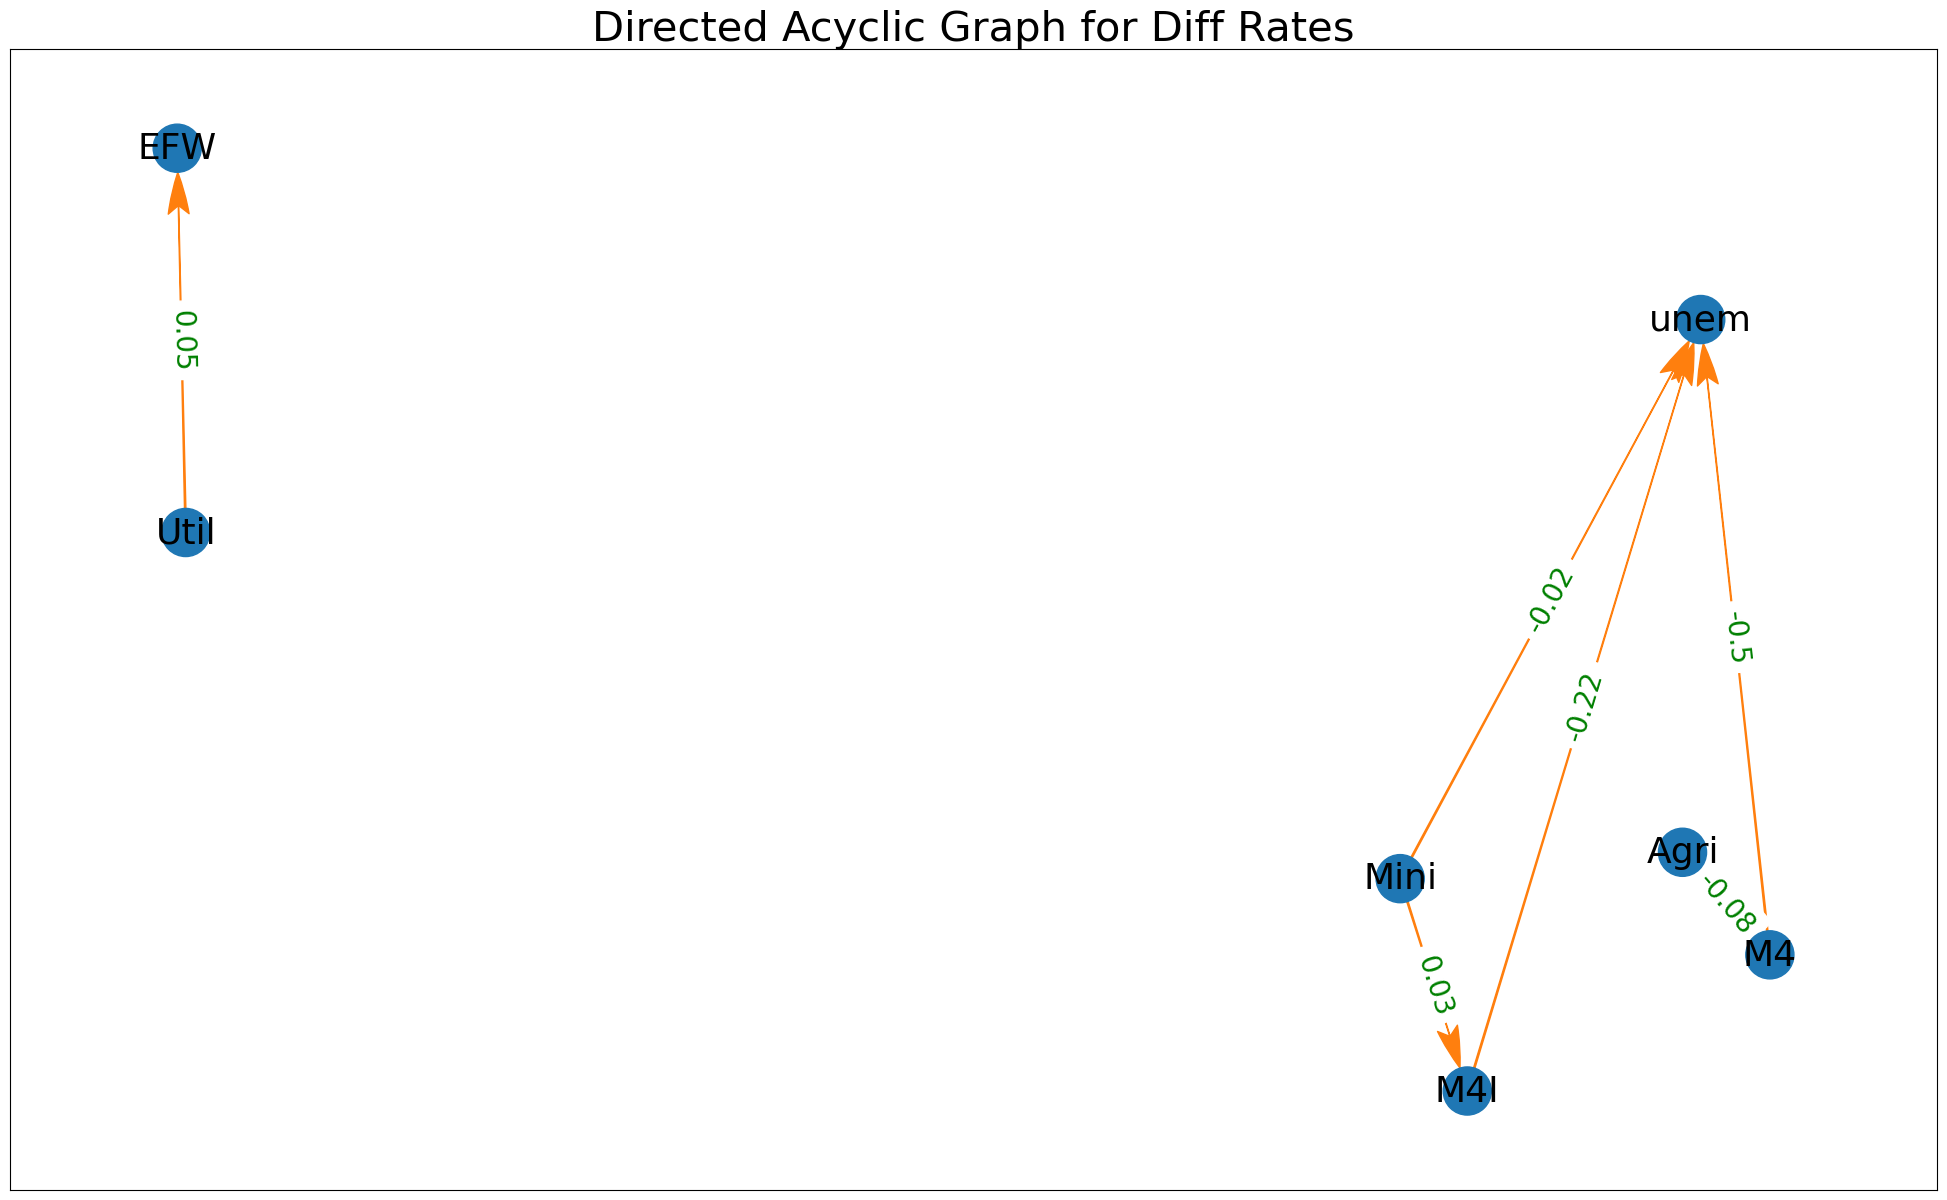

In [42]:
graph_DAG_git(edges1, df1, title = "Directed Acyclic Graph for Diff Rates")

In [43]:
# df_diff, df_rates

### Full regression function

In [44]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm

def calculate_residuals(df, y_var, X_vars, model_type='ols', weights=None, include_constant=False):
    residuals = {}
    for var in [y_var] + X_vars:
        other_vars = [v for v in [y_var] + X_vars if v != var]
        X = df[other_vars].copy()
        if include_constant:
            X = sm.add_constant(X, has_constant='add')
        y = df[[var]]
        
        if model_type == 'ols':
            model = sm.OLS(y, X)
        elif model_type == 'wls':
            model = sm.WLS(y, X, weights=weights)
        
        results = model.fit()
        residuals[f"$\\epsilon_{{{var}}}$"] = results.resid
    return pd.DataFrame(residuals)

def ols_wls_combinations_full(df, dependent_var, independent_vars, model_type='ols', 
                              always_include=None, never_include=None, df_name='df', 
                              include_constant=False):
    np.random.seed(None)
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    if model_type not in ['ols', 'wls']:
        raise ValueError("model_type must be either 'ols' or 'wls'")

    if model_type == 'wls':
        county_unem = df.groupby('FIPS')[dependent_var].var()
        df['weight'] = df['FIPS'].map(lambda x: 1 / county_unem.get(x, np.nan))
        df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['weight'])
        weights = df['weight']
    else:
        weights = None

    if always_include is None:
        always_include = []
    if never_include is None:
        never_include = []

    independent_vars = [var for var in independent_vars if var not in never_include]

    results = []
    residuals_dict = {}

    for i in range(1, len(independent_vars) + 1):
        for combo in itertools.combinations(independent_vars, i):
            combo = list(always_include) + list(combo)
            X = df[combo].copy()

            if include_constant:
                X = sm.add_constant(X, has_constant='add')

            common_index = df.index.intersection(X.index)
            y_common = df.loc[common_index, dependent_var]
            X_common = X.loc[common_index]

            if model_type == 'ols':
                model = sm.OLS(y_common, X_common).fit()
            elif model_type == 'wls':
                weights_common = weights.loc[common_index]
                model = sm.WLS(y_common, X_common, weights=weights_common).fit()

            beta_estimates = model.params
            std_errors = model.bse
            p_values = model.pvalues
            r_squared = model.rsquared
            y_pred = model.predict(X_common)
            mse = np.mean((y_common - y_pred) ** 2)

            # Format the variables in a readable manner
            formatted_vars = [
                f'{var}: {beta_estimates[idx + int(include_constant)]:.4f} (SE: {std_errors[idx + int(include_constant)]:.4f}, p: {p_values[idx + int(include_constant)]:.4f})'
                for idx, var in enumerate(combo)
            ]

            result = {
                'DataFrame': df_name,
                'Model': ', '.join(['const'] + combo) if include_constant else ', '.join(combo),
                'r-squared': r_squared,
                'MSE': mse,
                'Variables': '<br>'.join(formatted_vars)
            }

            for idx, var in enumerate(combo):
                result[var] = beta_estimates[idx + int(include_constant)]
                result[f'{var}_SE'] = std_errors[idx + int(include_constant)]
                result[f'{var}_p'] = p_values[idx + int(include_constant)]

            if include_constant:
                result['const'] = beta_estimates[0]
                result['const_SE'] = std_errors[0]
                result['const_p'] = p_values[0]
                
            results.append(result)

            # Store residuals for the current combination
            sorted_combo = tuple(sorted(combo))
            residuals_dict[sorted_combo] = calculate_residuals(df.loc[common_index], dependent_var, combo, model_type=model_type, weights=weights_common if model_type == 'wls' else None, include_constant=include_constant)

    results_df = pd.DataFrame(results)
    return results_df, residuals_dict

### ols and wls k-fold regressions

In [45]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold

def calculate_residuals_k(df, y_var, X_vars, model_type='ols', weights=None, include_constant=False):
    residuals = {}
    for var in [y_var] + X_vars:
        other_vars = [v for v in [y_var] + X_vars if v != var]
        X = df[other_vars].copy()
        if include_constant:
            X = sm.add_constant(X, has_constant='add')
        y = df[var]
        
        if model_type == 'ols':
            model = sm.OLS(y, X)
        elif model_type == 'wls':
            model = sm.WLS(y, X, weights=weights)
        
        results = model.fit()
        residuals[f"$\\epsilon_{{{var}}}$"] = results.resid
    return pd.DataFrame(residuals)

def ols_wls_combinations_kfold(df, dependent_var, independent_vars, model_type='ols', 
                               always_include=None, never_include=None, df_name='df', 
                               include_constant=False, n_splits=10, random_state=None):
    np.random.seed(random_state)
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    y = df[dependent_var]

    if model_type not in ['ols', 'wls']:
        raise ValueError("model_type must be either 'ols' or 'wls'")

    if model_type == 'wls':
        # Calculate weights for WLS
        county_unem = df.groupby('FIPS')[dependent_var].var()
        df['weight'] = df['FIPS'].map(lambda x: 1 / county_unem.get(x, np.nan))
        df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['weight'])

    results = []
    residuals_dict = {}

    if always_include is None:
        always_include = []
    if never_include is None:
        never_include = []

    independent_vars = [var for var in independent_vars if var not in never_include]

    for i in range(1, len(independent_vars) + 1):
        for combo in itertools.combinations(independent_vars, i):
            combo = list(always_include) + list(combo)
            X = df[combo].copy()

            if include_constant:
                X = sm.add_constant(X, has_constant='add')
                combo_with_const = ['const'] + combo
            else:
                combo_with_const = combo

            kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
            mse_list = []
            r_squared_list = []
            beta_estimates = []
            std_errors = []
            p_values = []
            fold_residuals_list = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
                y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)

                if model_type == 'ols':
                    model = sm.OLS(y_train, X_train).fit()
                elif model_type == 'wls':
                    weights = df['weight'].iloc[train_index].reset_index(drop=True)
                    model = sm.WLS(y_train, X_train, weights=weights).fit()

                y_pred = model.predict(X_test)
                mse = np.mean((y_test - y_pred) ** 2)
                mse_list.append(mse)
                r_squared = model.rsquared
                r_squared_list.append(r_squared)
                beta_estimates.append(model.params)
                std_errors.append(model.bse)
                p_values.append(model.pvalues)

                fold_residuals = {var: [] for var in [dependent_var] + combo_with_const if var != 'const'}
                residuals_y = y_test - y_pred
                fold_residuals[dependent_var].extend(residuals_y)

                # Calculate and store residuals for independent variables
                for var in combo_with_const:
                    if var != 'const':
                        residuals_X = X_test[var] - model.predict(X_test)
                        fold_residuals[var].extend(residuals_X)
                
                fold_residuals_list.append(fold_residuals)

            top_3_indices = np.argsort(mse_list)[:3]
            avg_top_3_mse = np.mean([mse_list[idx] for idx in top_3_indices])
            avg_beta_estimates = np.mean([beta_estimates[idx] for idx in top_3_indices], axis=0)
            avg_std_errors = np.mean([std_errors[idx] for idx in top_3_indices], axis=0)
            avg_p_values = np.mean([p_values[idx] for idx in top_3_indices], axis=0)
            avg_r_squared = np.mean([r_squared_list[idx] for idx in top_3_indices])

            sorted_combo_with_const = sorted(combo_with_const)

            result = {
                'DataFrame': df_name,
                'Model': ', '.join(sorted_combo_with_const),
                'r-squared': avg_r_squared,
                'avg_top_3_mse': avg_top_3_mse,
                'Variables': '<br>'.join(
                    [f'{sorted_combo_with_const[idx]}: {avg_beta_estimates[idx]:.4f} (SE: {avg_std_errors[idx]:.4f}, p: {avg_p_values[idx]:.4f})' for idx in range(len(sorted_combo_with_const))])
            }
            for idx, var in enumerate(sorted_combo_with_const):
                if var == 'const' and not include_constant:
                    result[var] = np.nan
                    result[f'{var}_SE'] = np.nan
                    result[f'{var}_p'] = np.nan
                else:
                    result[var] = avg_beta_estimates[idx]
                    result[f'{var}_SE'] = avg_std_errors[idx]
                    result[f'{var}_p'] = avg_p_values[idx]
            results.append(result)

            # Calculate residuals for the average model based on the top 3 lowest MSEs
            all_residuals = []
            for idx in top_3_indices:
                train_index, test_index = list(kf.split(X))[idx]
                X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
                y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)

                if model_type == 'ols':
                    model = sm.OLS(y_train, X_train).fit()
                elif model_type == 'wls':
                    weights = df['weight'].iloc[train_index].reset_index(drop=True)
                    model = sm.WLS(y_train, X_train, weights=weights).fit()

                y_pred = model.predict(X_test)
                residuals_y = y_test - y_pred
                residuals_df = pd.DataFrame({f"$\\epsilon_{{{dependent_var}}}$": residuals_y})
                
                # Calculate residuals for independent variables
                for var in combo_with_const:
                    if var != 'const':
                        residuals_X = X_test[var] - model.predict(X_test)
                        residuals_df[f"$\\epsilon_{{{var}}}$"] = residuals_X

                all_residuals.append(residuals_df)
            
            # Average residuals across top 3 models
            avg_residuals = pd.concat(all_residuals).groupby(level=0).mean()
            sorted_combo = tuple(sorted(combo_with_const))
            residuals_dict[sorted_combo] = avg_residuals

    results_df = pd.DataFrame(results)
    return results_df, residuals_dict


In [46]:
dv = 'unem'
iv = ['Agri', 'Mini', 'Util', 'EFW', 'M4', 'M4I', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']

In [47]:
# Rates ols
results_ols_rates_clusters_efw_k, residuals_ols_rates_clusters_efw_k = ols_wls_combinations_kfold(df_rates, dv, iv, 
                                                                           model_type='ols', 
                                                                           always_include=None, 
                                                                           never_include=None, 
                                                                           df_name='Rates ols)', 
                                                                           include_constant=True,
                                                                           n_splits=5, random_state=42)


#rates, wls, clusters, efw
results_wls_rates_clusters_efw_k, residuals_wls_rates_clusters_efw_k = ols_wls_combinations_kfold(df_rates, dv, iv, 
                                                                           model_type='wls', 
                                                                           always_include=None, 
                                                                           never_include=None, 
                                                                           df_name='Rates wls)', 
                                                                           include_constant=True,
                                                                           n_splits=5, random_state=42)


#diff rates, ols, cluster, efw
results_ols_diff_rates_clusters_efw_k, residuals_ols_diff_rates_clusters_efw_k = ols_wls_combinations_kfold(df_diff, dv, iv, 
                                                                                     model_type='ols', 
                                                                                     always_include=None, 
                                                                                     never_include=None, 
                                                                                     df_name='Diff rates ols', 
                                                                                     include_constant=False,
                                                                           n_splits=5, random_state=42)




# Combine the results and residuals into dictionaries
results_dict_combo_k = {
    'Rates wls': results_wls_rates_clusters_efw_k,
    'Rates ols': results_ols_rates_clusters_efw_k,
    'Diff rates ols': results_ols_diff_rates_clusters_efw_k
}

residuals_dict_combo_k = {
    'Rates wls': residuals_wls_rates_clusters_efw_k,
    'Rates ols': residuals_ols_rates_clusters_efw_k,
    'Diff rates ols': residuals_ols_diff_rates_clusters_efw_k
}

In [279]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold

def calculate_residuals_k(df, y_var, X_vars, model_type='ols', weights=None, include_constant=False):
    residuals = {}
    for var in [y_var] + X_vars:
        other_vars = [v for v in [y_var] + X_vars if v != var]
        X = df[other_vars].copy()
        if include_constant:
            X = sm.add_constant(X, has_constant='add')
        y = df[var]
        
        if model_type == 'ols':
            model = sm.OLS(y, X)
        elif model_type == 'wls':
            model = sm.WLS(y, X, weights=weights)
        
        results = model.fit()
        residuals[f"$\\epsilon_{{{var}}}$"] = results.resid
    return pd.DataFrame(residuals)

def ols_wls_combinations_kfold(df, dependent_var, independent_vars, model_type='ols', 
                               always_include=None, never_include=None, df_name='df', 
                               include_constant=False, n_splits=10, random_state=None):
    np.random.seed(random_state)
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    y = df[dependent_var]

    if model_type not in ['ols', 'wls']:
        raise ValueError("model_type must be either 'ols' or 'wls'")

    if model_type == 'wls':
        # Calculate weights for WLS
        county_unem = df.groupby('FIPS')[dependent_var].var()
        df['weight'] = df['FIPS'].map(lambda x: 1 / county_unem.get(x, np.nan))
        df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['weight'])

    results = []
    residuals_dict = {}
    best_folds_data = {}

    if always_include is None:
        always_include = []
    if never_include is None:
        never_include = []

    independent_vars = [var for var in independent_vars if var not in never_include]

    for i in range(1, len(independent_vars) + 1):
        for combo in itertools.combinations(independent_vars, i):
            combo = list(always_include) + list(combo)
            X = df[combo].copy()

            if include_constant:
                X = sm.add_constant(X, has_constant='add')
                combo_with_const = ['const'] + combo
            else:
                combo_with_const = combo

            kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
            mse_list = []
            r_squared_list = []
            beta_estimates = []
            std_errors = []
            p_values = []
            fold_residuals_list = []
            fold_data_list = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
                y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)

                if model_type == 'ols':
                    model = sm.OLS(y_train, X_train).fit()
                elif model_type == 'wls':
                    weights = df['weight'].iloc[train_index].reset_index(drop=True)
                    model = sm.WLS(y_train, X_train, weights=weights).fit()

                y_pred = model.predict(X_test)
                mse = np.mean((y_test - y_pred) ** 2)
                mse_list.append(mse)
                r_squared = model.rsquared
                r_squared_list.append(r_squared)
                beta_estimates.append(model.params)
                std_errors.append(model.bse)
                p_values.append(model.pvalues)

                fold_residuals = {var: [] for var in [dependent_var] + combo_with_const if var != 'const'}
                residuals_y = y_test - y_pred
                fold_residuals[dependent_var].extend(residuals_y)

                # Calculate and store residuals for independent variables
                for var in combo_with_const:
                    if var != 'const':
                        residuals_X = X_test[var] - model.predict(X_test)
                        fold_residuals[var].extend(residuals_X)
                
                fold_residuals_list.append(fold_residuals)
                fold_data_list.append((X_train, X_test, y_train, y_test))

            top_3_indices = np.argsort(mse_list)[:3]
            avg_top_3_mse = np.mean([mse_list[idx] for idx in top_3_indices])
            avg_beta_estimates = np.mean([beta_estimates[idx] for idx in top_3_indices], axis=0)
            avg_std_errors = np.mean([std_errors[idx] for idx in top_3_indices], axis=0)
            avg_p_values = np.mean([p_values[idx] for idx in top_3_indices], axis=0)
            avg_r_squared = np.mean([r_squared_list[idx] for idx in top_3_indices])

            sorted_combo_with_const = sorted(combo_with_const)

            result = {
                'DataFrame': df_name,
                'Model': ', '.join(sorted_combo_with_const),
                'r-squared': avg_r_squared,
                'avg_top_3_mse': avg_top_3_mse,
                'Variables': '<br>'.join(
                    [f'{sorted_combo_with_const[idx]}: {avg_beta_estimates[idx]:.4f} (SE: {avg_std_errors[idx]:.4f}, p: {avg_p_values[idx]:.4f})' for idx in range(len(sorted_combo_with_const))])
            }
            for idx, var in enumerate(sorted_combo_with_const):
                if var == 'const' and not include_constant:
                    result[var] = np.nan
                    result[f'{var}_SE'] = np.nan
                    result[f'{var}_p'] = np.nan
                else:
                    result[var] = avg_beta_estimates[idx]
                    result[f'{var}_SE'] = avg_std_errors[idx]
                    result[f'{var}_p'] = avg_p_values[idx]
            results.append(result)

            # Calculate residuals for the average model based on the top 3 lowest MSEs
            all_residuals = []
            for idx in top_3_indices:
                train_index, test_index = list(kf.split(X))[idx]
                X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
                y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)

                if model_type == 'ols':
                    model = sm.OLS(y_train, X_train).fit()
                elif model_type == 'wls':
                    weights = df['weight'].iloc[train_index].reset_index(drop=True)
                    model = sm.WLS(y_train, X_train, weights=weights).fit()

                y_pred = model.predict(X_test)
                residuals_y = y_test - y_pred
                residuals_df = pd.DataFrame({f"$\\epsilon_{{{dependent_var}}}$": residuals_y})
                
                # Calculate residuals for independent variables
                for var in combo_with_const:
                    if var != 'const':
                        residuals_X = X_test[var] - model.predict(X_test)
                        residuals_df[f"$\\epsilon_{{{var}}}$"] = residuals_X

                all_residuals.append(residuals_df)
            
            # Average residuals across top 3 models
            avg_residuals = pd.concat(all_residuals).groupby(level=0).mean()
            sorted_combo = tuple(sorted(combo_with_const))
            residuals_dict[sorted_combo] = avg_residuals
            
            # Save the best fold data
            best_fold_index = np.argmin(mse_list)
            best_folds_data[sorted_combo] = fold_data_list[best_fold_index]

    results_df = pd.DataFrame(results)
    return results_df, residuals_dict, best_folds_data

# # Usage example
# results_ols_rates_clusters_efw_k, residuals_ols_rates_clusters_efw_k, best_fold_data_ols = ols_wls_combinations_kfold(
#     df_rates, dv, iv, model_type='ols', always_include=None, never_include=None, df_name='Rates ols)', 
#     include_constant=True, n_splits=5, random_state=42)

# # Access the best fold data
# best_fold_train_X, best_fold_test_X, best_fold_train_y, best_fold_test_y = best_fold_data_ols[('const', 'Agri', 'clusters_2.0')]

# # Save to CSV
# best_fold_train_X.to_csv('best_fold_train_X.csv', index=False)
# best_fold_test_X.to_csv('best_fold_test_X.csv', index=False)
# best_fold_train_y.to_csv('best_fold_train_y.csv', index=False)
# best_fold_test_y.to_csv('best_fold_test_y.csv', index=False)

In [290]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold

def calculate_residuals_k(df, y_var, X_vars, model_type='ols', weights=None, include_constant=False):
    residuals = {}
    for var in [y_var] + X_vars:
        other_vars = [v for v in [y_var] + X_vars if v != var]
        X = df[other_vars].copy()
        if include_constant:
            X = sm.add_constant(X, has_constant='add')
        y = df[var]
        
        if model_type == 'ols':
            model = sm.OLS(y, X)
        elif model_type == 'wls':
            model = sm.WLS(y, X, weights=weights)
        
        results = model.fit()
        residuals[f"$\\epsilon_{{{var}}}$"] = results.resid
    return pd.DataFrame(residuals)

def ols_wls_combinations_kfold(df, dependent_var, independent_vars, model_type='ols', 
                               always_include=None, never_include=None, df_name='df', 
                               include_constant=False, n_splits=10, random_state=None):
    np.random.seed(random_state)
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    y = df[dependent_var]

    if model_type not in ['ols', 'wls']:
        raise ValueError("model_type must be either 'ols' or 'wls'")

    if model_type == 'wls':
        # Calculate weights for WLS
        county_unem = df.groupby('FIPS')[dependent_var].var()
        df['weight'] = df['FIPS'].map(lambda x: 1 / county_unem.get(x, np.nan))
        df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['weight'])

    results = []
    residuals_dict = {}
    best_folds_data = {}

    if always_include is None:
        always_include = []
    if never_include is None:
        never_include = []

    independent_vars = [var for var in independent_vars if var not in never_include]

    for i in range(1, len(independent_vars) + 1):
        for combo in itertools.combinations(independent_vars, i):
            combo = list(always_include) + list(combo)
            X = df[combo].copy()

            if include_constant:
                X = sm.add_constant(X, has_constant='add')
                combo_with_const = ['const'] + combo
            else:
                combo_with_const = combo

            kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
            mse_list = []
            r_squared_list = []
            beta_estimates = []
            std_errors = []
            p_values = []
            fold_residuals_list = []
            fold_data_list = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
                y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)

                if model_type == 'ols':
                    model = sm.OLS(y_train, X_train).fit()
                elif model_type == 'wls':
                    weights = df['weight'].iloc[train_index].reset_index(drop=True)
                    model = sm.WLS(y_train, X_train, weights=weights).fit()

                y_pred = model.predict(X_test)
                mse = np.mean((y_test - y_pred) ** 2)
                mse_list.append(mse)
                r_squared = model.rsquared
                r_squared_list.append(r_squared)
                beta_estimates.append(model.params)
                std_errors.append(model.bse)
                p_values.append(model.pvalues)

                fold_residuals = {var: [] for var in [dependent_var] + combo_with_const if var != 'const'}
                residuals_y = y_test - y_pred
                fold_residuals[dependent_var].extend(residuals_y)

                # Calculate and store residuals for independent variables
                for var in combo_with_const:
                    if var != 'const':
                        residuals_X = X_test[var] - model.predict(X_test)
                        fold_residuals[var].extend(residuals_X)
                
                fold_residuals_list.append(fold_residuals)
                fold_data_list.append((X_train, X_test, y_train, y_test))

            top_3_indices = np.argsort(mse_list)[:3]
            avg_top_3_mse = np.mean([mse_list[idx] for idx in top_3_indices])
            avg_beta_estimates = np.mean([beta_estimates[idx] for idx in top_3_indices], axis=0)
            avg_std_errors = np.mean([std_errors[idx] for idx in top_3_indices], axis=0)
            avg_p_values = np.mean([p_values[idx] for idx in top_3_indices], axis=0)
            avg_r_squared = np.mean([r_squared_list[idx] for idx in top_3_indices])

            sorted_combo_with_const = sorted(combo_with_const)

            result = {
                'DataFrame': df_name,
                'Model': ', '.join(sorted_combo_with_const),
                'r-squared': avg_r_squared,
                'avg_top_3_mse': avg_top_3_mse,
                'Variables': '<br>'.join(
                    [f'{sorted_combo_with_const[idx]}: {avg_beta_estimates[idx]:.4f} (SE: {avg_std_errors[idx]:.4f}, p: {avg_p_values[idx]:.4f})' for idx in range(len(sorted_combo_with_const))])
            }
            for idx, var in enumerate(sorted_combo_with_const):
                if var == 'const' and not include_constant:
                    result[var] = np.nan
                    result[f'{var}_SE'] = np.nan
                    result[f'{var}_p'] = np.nan
                else:
                    result[var] = avg_beta_estimates[idx]
                    result[f'{var}_SE'] = avg_std_errors[idx]
                    result[f'{var}_p'] = avg_p_values[idx]
            results.append(result)

            # Calculate residuals for the average model based on the top 3 lowest MSEs
            all_residuals = []
            for idx in top_3_indices:
                train_index, test_index = list(kf.split(X))[idx]
                X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
                y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)

                if model_type == 'ols':
                    model = sm.OLS(y_train, X_train).fit()
                elif model_type == 'wls':
                    weights = df['weight'].iloc[train_index].reset_index(drop=True)
                    model = sm.WLS(y_train, X_train, weights=weights).fit()

                y_pred = model.predict(X_test)
                residuals_y = y_test - y_pred
                residuals_df = pd.DataFrame({f"$\\epsilon_{{{dependent_var}}}$": residuals_y})
                
                # Calculate residuals for independent variables
                for var in combo_with_const:
                    if var != 'const':
                        residuals_X = X_test[var] - model.predict(X_test)
                        residuals_df[f"$\\epsilon_{{{var}}}$"] = residuals_X

                all_residuals.append(residuals_df)
            
            # Average residuals across top 3 models
            avg_residuals = pd.concat(all_residuals).groupby(level=0).mean()
            sorted_combo = tuple(sorted(combo_with_const))
            residuals_dict[sorted_combo] = avg_residuals
            
            # Save the best fold data
            best_fold_index = np.argmin(mse_list)
            best_folds_data[sorted_combo] = fold_data_list[best_fold_index]

    results_df = pd.DataFrame(results)
    return results_df, residuals_dict, best_folds_data

# # Usage example
# results_ols_rates_clusters_efw_k, residuals_ols_rates_clusters_efw_k, best_fold_data_ols = ols_wls_combinations_kfold(
#     df_rates, dv, iv, model_type='ols', always_include=None, never_include=None, df_name='Rates ols)', 
#     include_constant=True, n_splits=5, random_state=42)

# Function to get merged data from best_fold_data regardless of order
def get_best_fold_data_merged(best_fold_data, *vars):
    sorted_vars = tuple(sorted(vars))
    if sorted_vars in best_fold_data:
        X_train, X_test, y_train, y_test = best_fold_data[sorted_vars]
        train_data = pd.concat([X_train, y_train], axis=1)
        test_data = pd.concat([X_test, y_test], axis=1)
        return train_data, test_data
    else:
        raise KeyError(f"Combination {sorted_vars} not found in best_fold_data.")

# # Access the best fold data without considering order and merge it
# try:
#     train_data, test_data = get_best_fold_data_merged(best_fold_data_ols, 'clusters_2.0', 'Agri', 'const')
#     print("Best fold data accessed and merged successfully.")
# except KeyError as e:
#     print(e)

# # Save to CSV
# train_data.to_csv('best_fold_train_data.csv', index=False)
# test_data.to_csv('best_fold_test_data.csv', index=False)


In [291]:
dv = 'unem'
iv = ['Agri', 'Mini', 'Util', 'EFW', 'M4', 'M4I', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']

In [292]:
# Rates ols
results_ols_rates_clusters_efw_k, residuals_ols_rates_clusters_efw_k, best_rates_data_ols = ols_wls_combinations_kfold(df_rates, dv, iv, 
                                                                           model_type='ols', 
                                                                           always_include=None, 
                                                                           never_include=None, 
                                                                           df_name='Rates ols)', 
                                                                           include_constant=True,
                                                                           n_splits=5, random_state=42)


#rates, wls, clusters, efw
results_wls_rates_clusters_efw_k, residuals_wls_rates_clusters_efw_k, best_rates_data_wls = ols_wls_combinations_kfold(df_rates, dv, iv, 
                                                                           model_type='wls', 
                                                                           always_include=None, 
                                                                           never_include=None, 
                                                                           df_name='Rates wls)', 
                                                                           include_constant=True,
                                                                           n_splits=5, random_state=42)


#diff rates, ols, cluster, efw
results_ols_diff_rates_clusters_efw_k, residuals_ols_diff_rates_clusters_efw_k, best_diff_rates_ols = ols_wls_combinations_kfold(df_diff, dv, iv, 
                                                                                     model_type='ols', 
                                                                                     always_include=None, 
                                                                                     never_include=None, 
                                                                                     df_name='Diff rates ols', 
                                                                                     include_constant=False,
                                                                           n_splits=5, random_state=42)




# Combine the results and residuals into dictionaries
results_dict_combo_k = {
    'Rates wls': results_wls_rates_clusters_efw_k,
    'Rates ols': results_ols_rates_clusters_efw_k,
    'Diff rates ols': results_ols_diff_rates_clusters_efw_k
}

residuals_dict_combo_k = {
    'Rates wls': residuals_wls_rates_clusters_efw_k,
    'Rates ols': residuals_ols_rates_clusters_efw_k,
    'Diff rates ols': residuals_ols_diff_rates_clusters_efw_k
}

In [320]:
train_data_rates_ols_efw, test_data_rates_ols_efw = get_best_fold_data_merged(best_rates_data_ols, 'const',
                                                                              'Agri',
                                                                             'Mini',
                                                                             'Util',
                                                                             'EFW',
                                                                             'M4',
                                                                             'M4I')

train_data_rates_ols_no_efw, test_data_rates_ols_no_efw = get_best_fold_data_merged(best_rates_data_ols, 'const',
                                                                              'Agri',
                                                                             'Mini',
                                                                             'Util',
                                                                             'M4',
                                                                             'M4I')

train_data_rates_wls_efw, test_data_rates_wls_efw = get_best_fold_data_merged(best_rates_data_wls, 'const',
                                                                              'Agri',
                                                                             'Mini',
                                                                             'Util',
                                                                             'EFW',
                                                                             'M4',
                                                                             'M4I')

train_data_rates_wls_no_efw, test_data_rates_wls_no_efw = get_best_fold_data_merged(best_rates_data_wls, 'const',
                                                                              'Agri',
                                                                             'Mini',
                                                                             'Util',
                                                                             'M4',
                                                                             'M4I')

train_data_diff_rates_ols_efw, test_data_diff_rates_ols_efw = get_best_fold_data_merged(best_diff_rates_ols,
                                                                             'Agri',
                                                                             'Mini',
                                                                             'Util',
                                                                             'EFW',
                                                                             'M4',
                                                                             'M4I')

train_data_diff_rates_ols_no_efw, test_data_diff_rates_ols_no_efw = get_best_fold_data_merged(best_diff_rates_ols,
                                                                             'Agri',
                                                                             'Mini',
                                                                             'Util',
                                                                             'M4',
                                                                             'M4I')

In [321]:
drop_cols = ['const']

test_data_rates_ols_efw.drop(columns=drop_cols, inplace=True)
test_data_rates_ols_no_efw.drop(columns=drop_cols, inplace=True)
test_data_rates_wls_efw.drop(columns=drop_cols, inplace=True)
test_data_rates_wls_no_efw.drop(columns=drop_cols, inplace=True)

train_data_rates_ols_efw.drop(columns=drop_cols, inplace=True)
train_data_rates_ols_no_efw.drop(columns=drop_cols, inplace=True)
train_data_rates_wls_efw.drop(columns=drop_cols, inplace=True)
train_data_rates_wls_no_efw.drop(columns=drop_cols, inplace=True)

In [322]:
k_fold_test_data = {}

k_fold_test_data['k-fold rates ols w/efw'] = test_data_rates_ols_efw
k_fold_test_data['k-fold rates ols w/o efw'] = test_data_rates_ols_no_efw
k_fold_test_data['k-fold rates wls w/efw'] = test_data_rates_wls_efw
k_fold_test_data['k-fold rates wls w/o efw'] = test_data_rates_wls_no_efw
k_fold_test_data['k-fold diff rates ols w/efw'] = test_data_diff_rates_ols_efw
k_fold_test_data['k-fold diff rates ols w/o efw'] = test_data_diff_rates_ols_no_efw

k_fold_train_data = {}

k_fold_train_data['k-fold rates ols w/efw'] = train_data_rates_ols_efw
k_fold_train_data['k-fold rates ols w/o efw'] = train_data_rates_ols_no_efw
k_fold_train_data['k-fold rates wls w/efw'] = train_data_rates_wls_efw
k_fold_train_data['k-fold rates wls w/o efw'] = train_data_rates_wls_no_efw
k_fold_train_data['k-fold diff rates ols w/efw'] = train_data_diff_rates_ols_efw
k_fold_train_data['k-fold diff rates ols w/o efw'] = train_data_diff_rates_ols_no_efw


In [48]:
rates_try = 'Rates wls'

variable_combok = [
    {'const', 'M4', 'M4I'},
    {'const', 'Agri', 'Util', 'Mini'},
    {'const', 'Agri', 'Mini', 'Util', 'M4', 'M4I'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW' ,'clusters_2.0', 'clusters_3.0', 'clusters_4.0'}]

column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

rates_kfold = filter_results_table(results_dict_combo_k, rates_try, variable_combok)

In [49]:
rates_try_ols_k = 'Rates ols'

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

rates_k_ols = filter_results_table(results_dict_combo_k, rates_try_ols_k, variable_combok)

In [50]:
diff_rates_try = 'Diff rates ols'

variable_combinationsk = [
    {'M4', 'M4I'},
    {'Agri', 'Util', 'Mini'},
    {'Agri', 'Mini', 'Util', 'M4', 'M4I'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW' ,'clusters_2.0', 'clusters_3.0', 'clusters_4.0'}]

column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

diff_rates_kfold = filter_results_table(results_dict_combo_k, diff_rates_try, variable_combinationsk)

In [51]:
print('Rates wls k-fold :')
print(display_results_table(rates_kfold, variable_combok, column_names, exclude_rows))
print('Rates ols k-fold :')
print(display_results_table(rates_k_ols, variable_combok, column_names, exclude_rows))
print('Differenced Rates ols k-fold :')
print(display_results_table(diff_rates_kfold, variable_combinationsk, column_names, exclude_rows))

Rates wls k-fold :


None
Rates ols k-fold :


None
Differenced Rates ols k-fold :


None


### ols and wls full regressions

In [52]:
# Rates ols
results_ols_rates, residuals_ols_rates = ols_wls_combinations_full(df_rates, dv, iv, 
                                                                           model_type='ols', 
                                                                           always_include=None, 
                                                                           never_include=None, 
                                                                           df_name='Rates ols)', 
                                                                           include_constant=True)


#rates, wls, clusters, efw
results_wls_rates, residuals_wls_rates = ols_wls_combinations_full(df_rates, dv, iv, 
                                                                           model_type='wls', 
                                                                           always_include=None, 
                                                                           never_include=None, 
                                                                           df_name='Rates wls)',
                                                                          include_constant=True)


#diff rates, ols, cluster, efw
results_ols_diff_rates, residuals_ols_diff_rates = ols_wls_combinations_full(df_diff, dv, iv, 
                                                                                     model_type='ols', 
                                                                                     always_include=None, 
                                                                                     never_include=None, 
                                                                                     df_name='Diff rates ols', 
                                                                                     include_constant=False)




# Combine the results and residuals into dictionaries
results_dict_full = {
    'Rates wls': results_wls_rates,
    'Rates ols': results_ols_rates,
    'Diff rates ols': results_ols_diff_rates
}

residuals_dict_full = {
    'Rates wls': residuals_wls_rates,
    'Rates ols': residuals_ols_rates,
    'Diff rates ols': residuals_ols_diff_rates
}

In [55]:
rates_full_wls = 'Rates wls'

variable_combinations = [
    {'const', 'M4', 'M4I'},
    {'const', 'Agri', 'Util', 'Mini'},
    {'const', 'Agri', 'Mini', 'Util', 'M4', 'M4I'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW' ,'clusters_2.0', 'clusters_3.0', 'clusters_4.0'}]

column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

rates_full_reg_wls = filter_results_table(results_dict_full, rates_full_wls, variable_combinations)

In [56]:
rates_full_ols = 'Rates ols'

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

rates_full_reg_ols = filter_results_table(results_dict_full, rates_full_ols, variable_combinations)

In [57]:
Diff_rates_full_ols = 'Diff rates ols'

variables_combo_diff = [
    {'M4', 'M4I'},
    {'Agri', 'Util', 'Mini'},
    {'Agri', 'Mini', 'Util', 'M4', 'M4I'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW' ,'clusters_2.0', 'clusters_3.0', 'clusters_4.0'}]

column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

Diff_rates_full_reg_ols = filter_results_table(results_dict_full, Diff_rates_full_ols, variables_combo_diff)

In [58]:
print('Rates wls full model :')
print(display_results_table(rates_full_reg_wls, variable_combinations, column_names, exclude_rows))
print('Rates ols full model :')
print(display_results_table(rates_full_reg_ols, variable_combinations, column_names, exclude_rows))
print('Differenced rates ols full model :')
print(display_results_table(Diff_rates_full_reg_ols, variables_combo_diff, column_names, exclude_rows))

Rates wls full model :


None
Rates ols full model :


None
Differenced rates ols full model :


None


### Plotting the DAGs

In [59]:
# Retrieve residuals for a specific combination, order-agnostic
combo_efw = ('const', 'Agri', 'EFW', 'M4', 'M4I', 'Mini', 'Util')
combo_no_efw = ('const', 'Agri', 'M4', 'M4I', 'Mini', 'Util')
combo_diff_efw = ('Agri', 'EFW', 'M4', 'M4I', 'Mini', 'Util')
combo_diff_no_efw = ('Agri', 'M4', 'M4I', 'Mini', 'Util')

dag_dict_all = {}
dag_dict_all['rates wls (w/efw) full'] = residuals_wls_rates.get(tuple(sorted(combo_diff_efw)))
dag_dict_all['rates wls (w/efw) kfold'] = residuals_wls_rates_clusters_efw_k.get(tuple(sorted(combo_efw)))
dag_dict_all['rates wls (w/o efw) full'] = residuals_wls_rates.get(tuple(sorted(combo_diff_no_efw)))
dag_dict_all['rates wls (w/o efw) kfold'] = residuals_wls_rates_clusters_efw_k.get(tuple(sorted(combo_no_efw)))
dag_dict_all['rates ols (w/efw) full'] = residuals_ols_rates.get(tuple(sorted(combo_diff_efw)))
dag_dict_all['rates ols (w/efw) kfold'] = residuals_ols_rates_clusters_efw_k.get(tuple(sorted(combo_efw)))
dag_dict_all['rates ols (w/o efw) full'] = residuals_ols_rates.get(tuple(sorted(combo_diff_no_efw)))
dag_dict_all['rates ols (w/o efw) kfold'] = residuals_ols_rates_clusters_efw_k.get(tuple(sorted(combo_no_efw)))
dag_dict_all['diff rates ols (w/efw) full'] = residuals_ols_diff_rates.get(tuple(sorted(combo_diff_efw)))
dag_dict_all['diff rates ols (w/efw) kfold'] = residuals_ols_diff_rates_clusters_efw_k.get(tuple(sorted(combo_diff_efw)))
dag_dict_all['diff rates ols (w/o efw) full'] = residuals_ols_diff_rates.get(tuple(sorted(combo_diff_no_efw)))
dag_dict_all['diff rates ols (w/o efw) kfold'] = residuals_ols_diff_rates_clusters_efw_k.get(tuple(sorted(combo_diff_no_efw)))

In [80]:
# k = list(residuals_wls_rates.keys())
# residuals_wls_rates[k[10]]

In [81]:
# l = list(residuals_wls_rates_clusters_efw_k.keys())
# residuals_wls_rates_clusters_efw_k[l[10]]

In [86]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import ArrowStyle
import pandas as pd
from scipy.stats import pearsonr

def graph_DAG_update(edges, df, ax, title="", p_value=0.05):

    graph = nx.DiGraph()
    
    # Generate edges based on correlations and p_value
    edge_labels = {}
    columns = df.columns
    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            if i != j:  # Ensure each pair is considered only once
                corr, p = pearsonr(df[col1], df[col2])
                if p < p_value:
                    # Add edge based on correlation direction (positive or negative)
                    edge = (col1, col2) if corr > 0 else (col2, col1)
                    edges.append(edge)
                    edge_labels[edge] = str(round(corr, 2))

    # Add edges to the graph
    graph.add_edges_from(edges)
    color_map = ["C0" for _ in graph]  # Node color map
    pos = graphviz_layout(graph, prog='neato')  # Node positions using spring layout
    ax.set_title(title, fontsize=30)  # Set plot title
    
    # Draw the graph
    nx.draw_networkx(graph, pos, node_color=color_map, node_size=2000,
                     with_labels=True, arrows=True,
                     font_color="white", font_size=26, alpha=1,
                     width=2, edge_color="C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=1.5, head_width=1.5, tail_width=0.1"),
                     ax=ax)
    
    # Draw edge labels
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels,
                                 font_color='green', font_size=10, ax=ax)
    ax.axis('on')  # Turn off the axis lines and labels
 
    # Add border around each subplot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

In [329]:
# # Number of plots
# num_plots = len(dag_dict_all)
# num_cols = 2  # Number of columns in the grid layout
# num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

# fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 10))
# axs = axs.flatten()  # Flatten the array of subplots for easier indexing

# for i, (title, df) in enumerate(dag_dict_all.items()):
#     ax = axs[i]
#     edges = []  # Initialize an empty list for edges
#     graph_DAG_update(edges, df, ax, title=title, p_value=0.01)
    
# # Hide any unused subplots
# for j in range(i + 1, num_cols * num_rows):
#     axs[j].axis('off')

# plt.tight_layout()
# plt.show()


In [142]:
def process_dataframes(df, drop_cols):
    df_clean = df.dropna().set_index(['FIPS', 'TimePeriod'])
    df_copy1 = df_clean.copy()
    df_copy2 = df_clean.copy()
    df_copy3 = df_clean.copy()
    
    df_copy1.drop(columns=drop_cols[0], inplace=True)
    df_copy2.drop(columns=drop_cols[1], inplace=True)
    df_copy3.drop(columns=drop_cols[2], inplace=True)
    
    return df_clean, df_copy1, df_copy2, df_copy3

full_df_drop_cols = [['EFW'], ['clusters'], ['EFW', 'clusters']]
diff_df_drop_cols = [['EFW'], ['clusters'], ['EFW', 'clusters']]

rates_efw, rates_no_efw, rates_efw_no_cluster, rates_no_efw_no_cluster = process_dataframes(full_df_rates_cluster, full_df_drop_cols)
diff_rates_efw, diff_rates_no_efw, diff_rates_efw_no_cluster, diff_rates_no_efw_no_cluster = process_dataframes(full_df_diff_cluster, diff_df_drop_cols)

In [151]:
dataframes_dict = {
#     'rates w/efw w/clusters': rates_efw,
#     'rates w/o efw w/clusters': rates_no_efw,
    'rates w/efw w/o clusters': rates_efw_no_cluster,
    'rates w/o efw w/o clusters': rates_no_efw_no_cluster,
#     'diff rates w/efw w/clusters': diff_rates_efw,
#     'diff rates w/o efw w/clusters': diff_rates_no_efw,
    'diff rates w/efw w/o clusters': diff_rates_efw_no_cluster,
    'diff rates w/o efw w/o clusters': diff_rates_no_efw_no_cluster
}

## DAGS

In [277]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.estimators import PC
import copy
from matplotlib.patches import ArrowStyle

# Helper function to plot network
def plot_network(G, pos, title, ax):
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=3000, font_size=10, ax=ax)
    ax.set_title(title)

# Function to build skeleton graph
def build_skeleton(df, undirected_graph, p_val):    
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used):
        for c_var in control_vars:
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                test = df.partial_corr(x=x, y=y, covar=c_used, method="pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)
                
    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x=x, y=y, covar=None, method="pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

# Function to plot directed acyclic graph (DAG) with correlation labels
def graph_DAG(edges, df, title, ax):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    pos = graphviz_layout(graph)
    
    # Calculate and set edge labels
    edge_labels = {}
    for edge in edges:
        x, y = edge
        correlation = df[[x, y]].corr().iloc[0, 1]
        edge_labels[edge] = f"{correlation:.2f}"

    # Draw the graph
    nx.draw_networkx(graph, pos, node_color=color_map, node_size=1200, with_labels=True,
                     arrows=True, font_color="white", font_size=10, alpha=1,
                     width=2, edge_color="C1", arrowstyle=ArrowStyle("Fancy, head_length=1.5, head_width=1.5, tail_width=0.1"), ax=ax)
    
    # Draw edge labels
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='green', font_size=10)
    
    ax.set_title(title)

# Plotting function
def plot_graphs(data, p_val=0.001, figsize_single=(20, 5), figsize_dict=(24, 20), overall_title=""):
    # Handle single dataframe case
    if isinstance(data, dict):
        data_dict = data
        figsize = figsize_dict
    else:
        data_dict = {"": data}
        figsize = figsize_single

    fig, axes = plt.subplots(len(data_dict), 4, figsize=figsize)
    
    if len(data_dict) == 1:
        axes = [axes]  # Ensure axes is iterable for a single dataframe

    for i, (df_name, df) in enumerate(data_dict.items()):
        cols = df.columns
        undirected_graph = {key: [a for a in cols if a != key] for key in cols}
        
        # Plot undirected graph
        graph_list = [(source, sink) for source, sinks in undirected_graph.items() for sink in sinks]
        G = nx.Graph()
        G.add_edges_from(graph_list)
        pos = graphviz_layout(G)
        plot_network(G, pos, f"{df_name} Undirected Graph" if df_name else "Undirected Graph", axes[i][0])

        # Plot fully connected directed graph
        G = nx.DiGraph()
        G.add_edges_from(graph_list)
        pos = graphviz_layout(G)
        plot_network(G, pos, f"{df_name} Fully Connected Directed Graph" if df_name else "Fully Connected Directed Graph", axes[i][1])

        # Build and plot skeleton graph
        skeleton_graph = build_skeleton(df, copy.deepcopy(undirected_graph), p_val)
        graph_list = [(source, sink) for source, sinks in skeleton_graph.items() for sink in sinks]
        G = nx.DiGraph()
        G.add_edges_from(graph_list)
        pos = graphviz_layout(G)
        plot_network(G, pos, f"{df_name} Skeleton Graph" if df_name else "Skeleton Graph", axes[i][2])

        # Estimate DAG using PC algorithm and plot it
        c = PC(df)
        max_cond_vars = len(df.keys()) - 2
        model = c.estimate(return_type="dag", variant="orig", significance_level=p_val, max_cond_vars=max_cond_vars, ci_test="pearsonr")
        edges = model.edges()
        graph_DAG(edges, df, f"{df_name} Directed Acyclic Graph" if df_name else "Directed Acyclic Graph", axes[i][3])
    
    fig.suptitle(overall_title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [330]:
# plot_graphs(rates_efw_no_cluster, figsize_single=(30, 8), p_val=0.01, overall_title='Rates w/efw')

In [331]:
# plot_graphs(rates_no_efw_no_cluster, figsize_single=(30, 8), p_val=0.01, overall_title='Rates w/o efw')

In [332]:
# plot_graphs(diff_rates_efw_no_cluster, figsize_single=(30, 8), p_val=0.01, overall_title='Diff rates w/efw')

In [333]:
# plot_graphs(diff_rates_no_efw_no_cluster, figsize_single=(30, 8), p_val=0.01, overall_title='Diff rates w/o efw')

In [335]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.estimators import PC
from matplotlib.patches import ArrowStyle

# Function to plot directed acyclic graph (DAG) with correlation labels
def graph_DAG(edges, df, title=""):
    graph = nx.DiGraph()
    
    # Calculate and set edge labels
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                keep_controls.append(control)
        pcorr = df[[edge[0], edge[1]] + keep_controls].pcorr()
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]], 2))
        
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    fig, ax = plt.subplots(figsize=(20, 12))
    pos = graphviz_layout(graph, prog='neato')
    plt.title(title, fontsize=30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size=1200,
                     with_labels=True, arrows=True, font_color="white",
                     font_size=15, alpha=1, width=2, edge_color="C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=1.5, head_width=1.5, tail_width=0.1"),
                     connectionstyle='arc3, rad = 0.05', ax=ax)

    # Draw edge labels
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='green', font_size=20)
    plt.show()

# Function to plot graphs for a single dataframe or a dictionary of dataframes
def plot_graph(data, p_val=0.001, figsize_single=(20, 12), figsize_dict=(24, 20), overall_title=""):
    if isinstance(data, dict):
        data_dict = data
        figsize = figsize_dict
    else:
        data_dict = {"Single Dataframe": data}
        figsize = figsize_single

    for df_name, df in data_dict.items():
        c = PC(df)
        max_cond_vars = len(df.keys()) - 2
        model = c.estimate(return_type="dag", variant="orig", significance_level=p_val, max_cond_vars=max_cond_vars, ci_test="pearsonr")
        edges = model.edges()
        graph_title = df_name if df_name else "Directed Acyclic Graph"
        graph_DAG(edges, df, title=graph_title)

    if overall_title:
        plt.suptitle(overall_title, fontsize=16)

## Full dataframe

  0%|          | 0/5 [00:00<?, ?it/s]

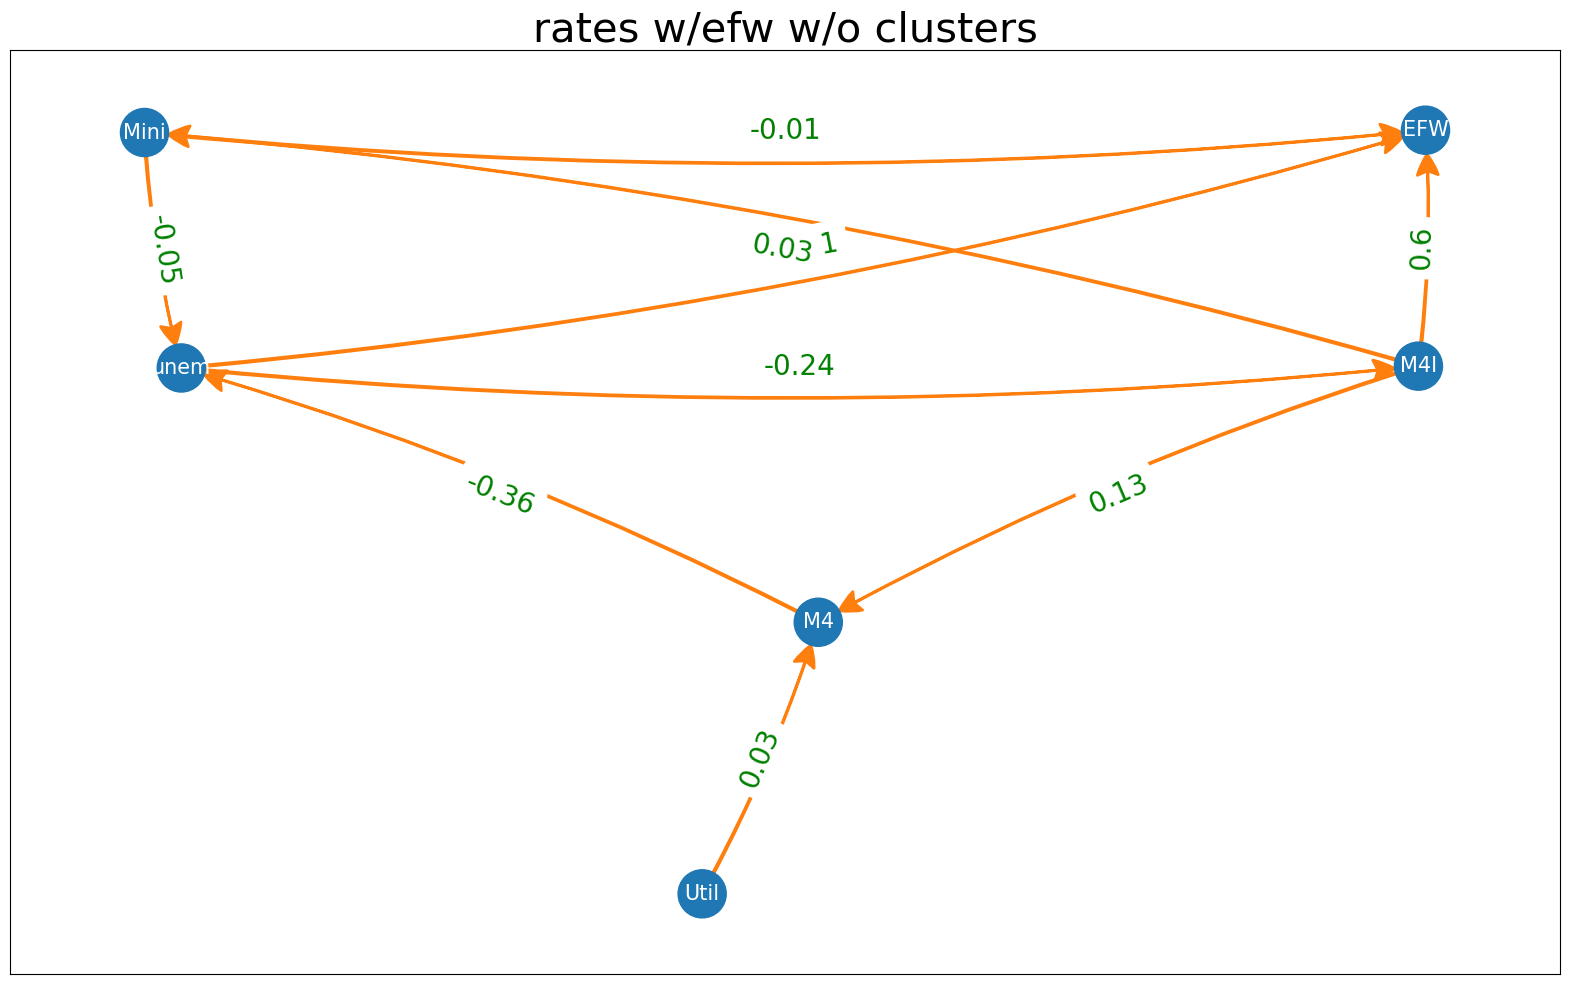

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


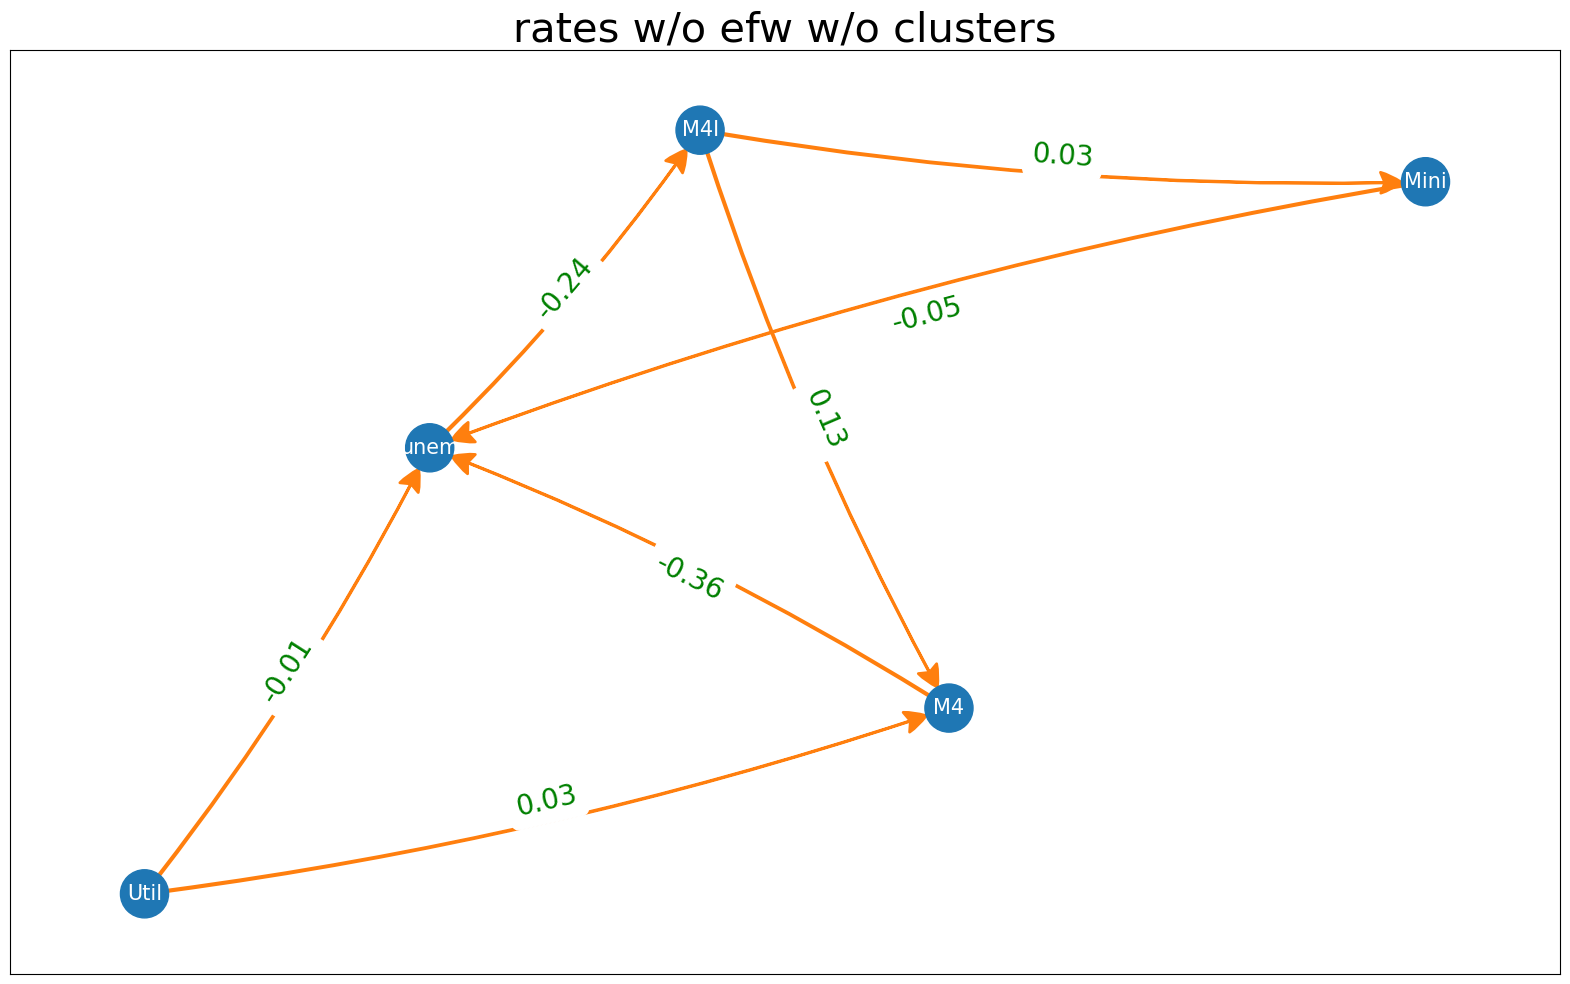

  0%|          | 0/5 [00:00<?, ?it/s]

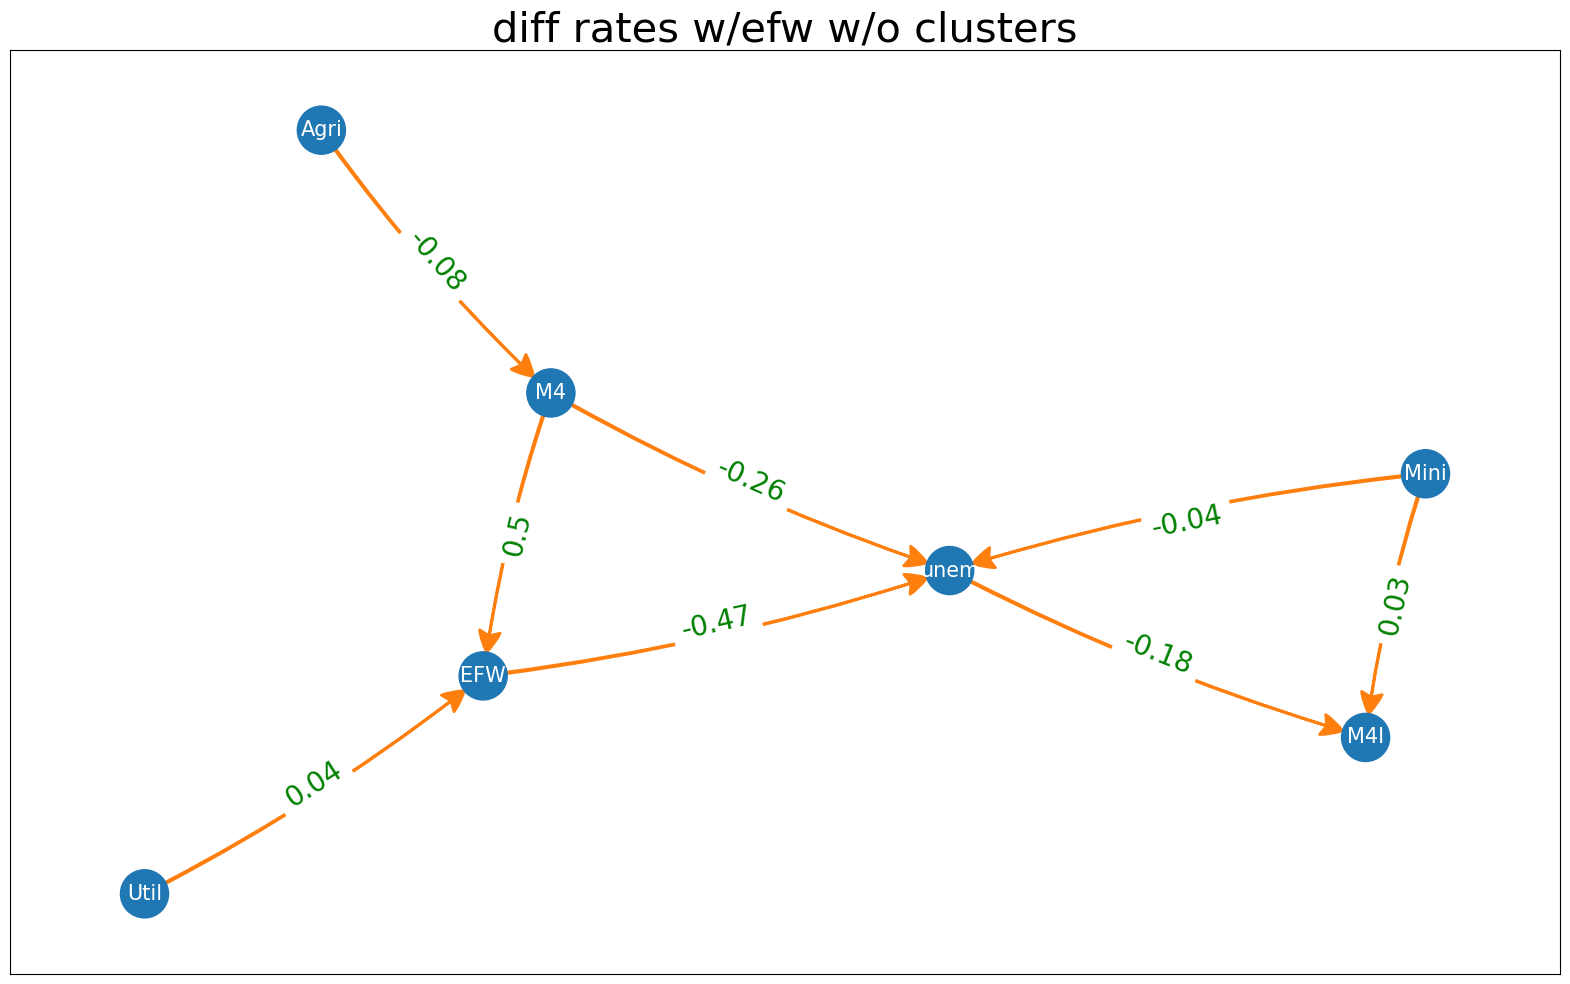

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


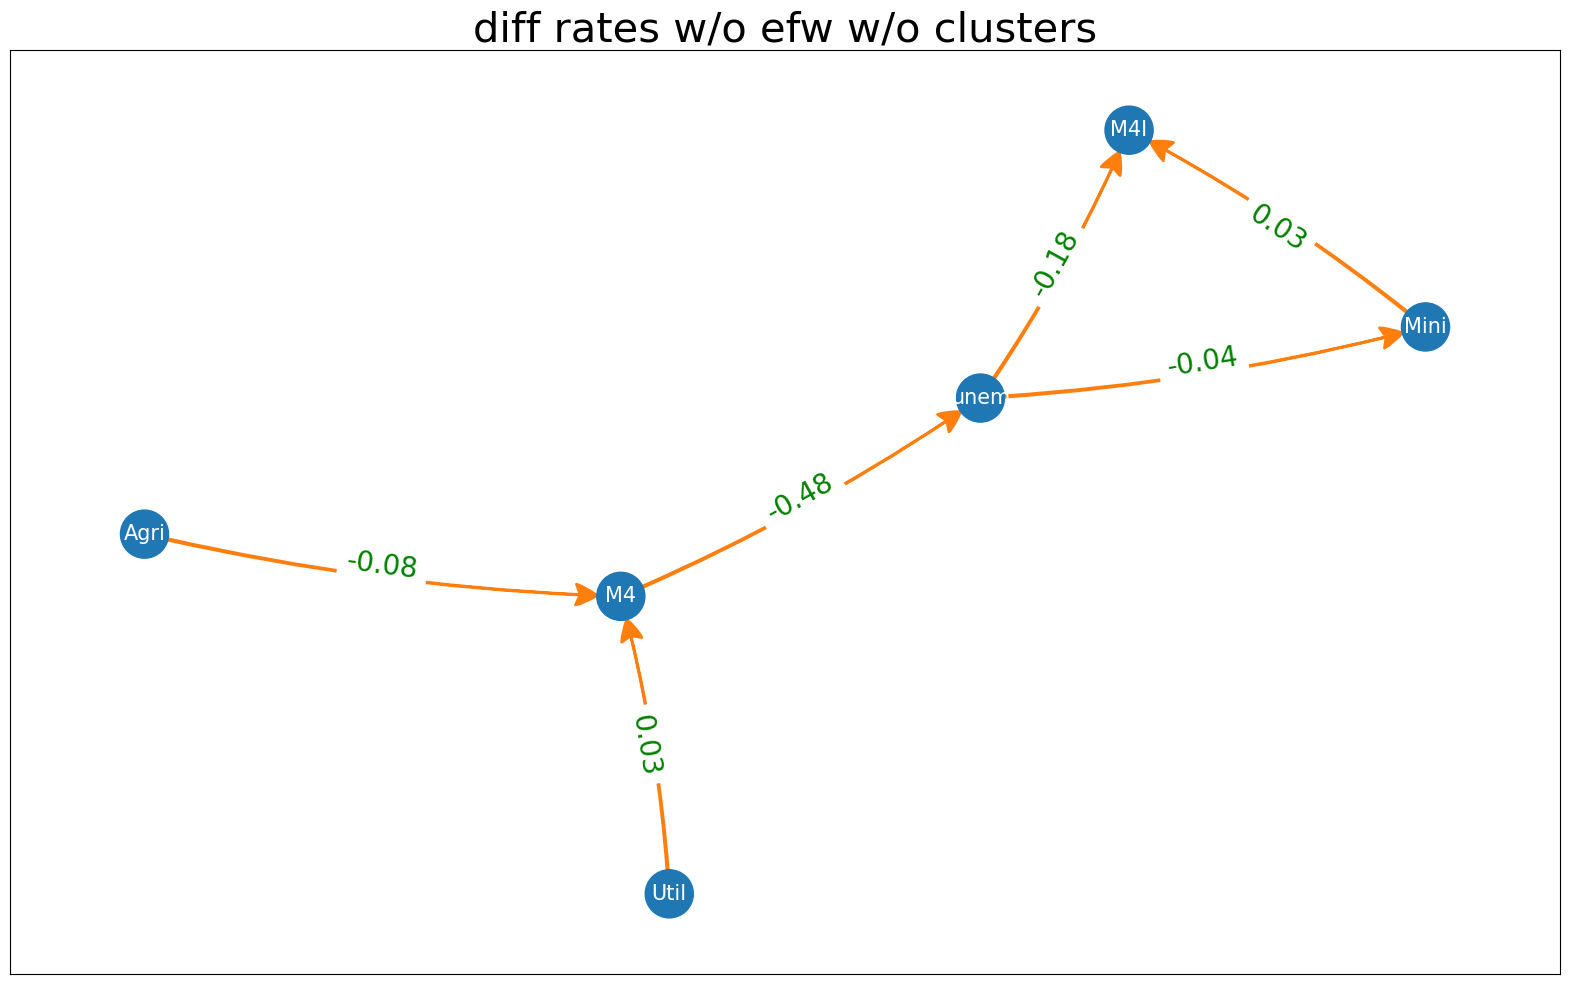

In [336]:
plot_graph(dataframes_dict, figsize_dict=(24, 20), p_val=0.01, overall_title='')

## k-fold training data

  0%|          | 0/5 [00:00<?, ?it/s]

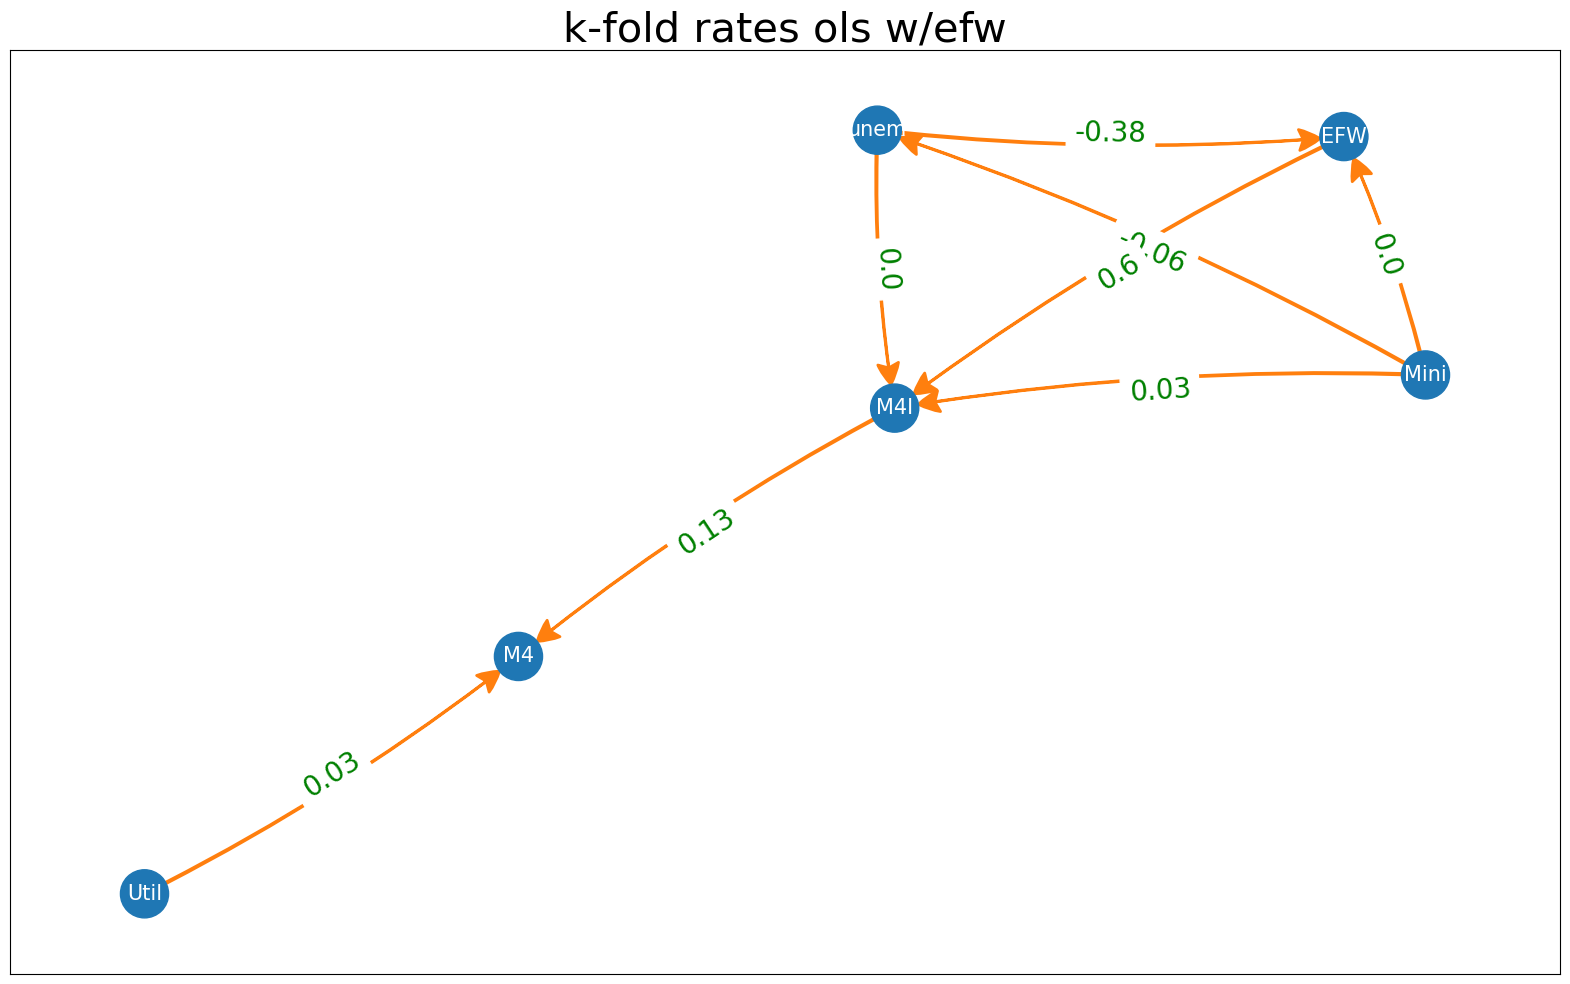

  0%|          | 0/4 [00:00<?, ?it/s]

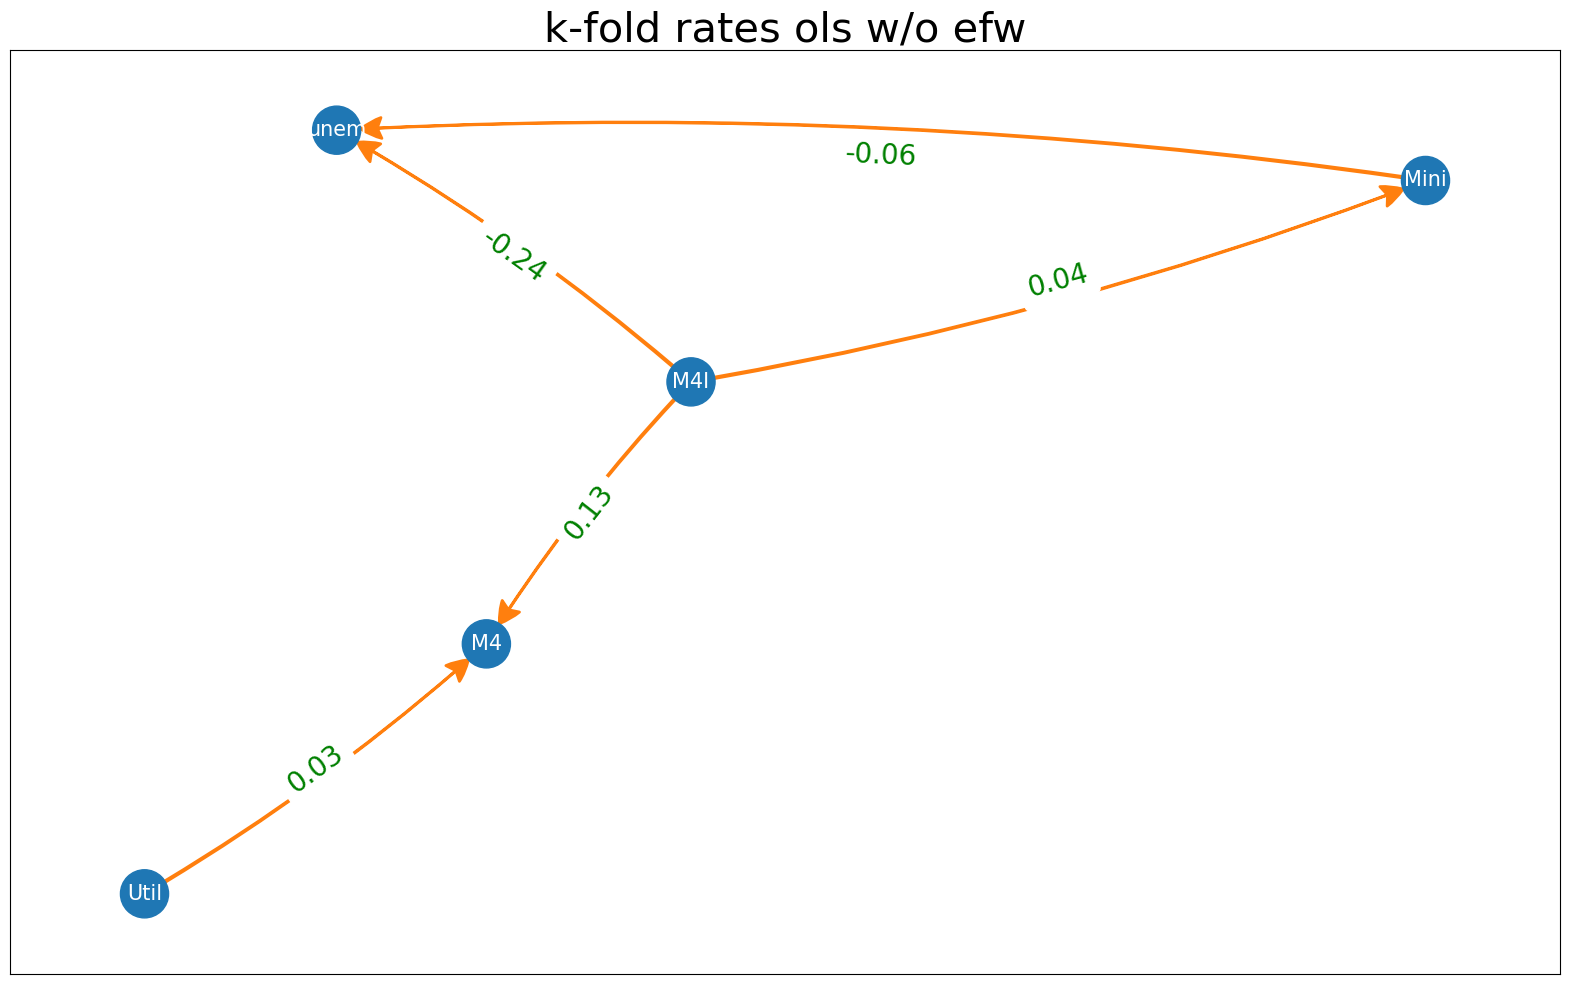

  0%|          | 0/5 [00:00<?, ?it/s]

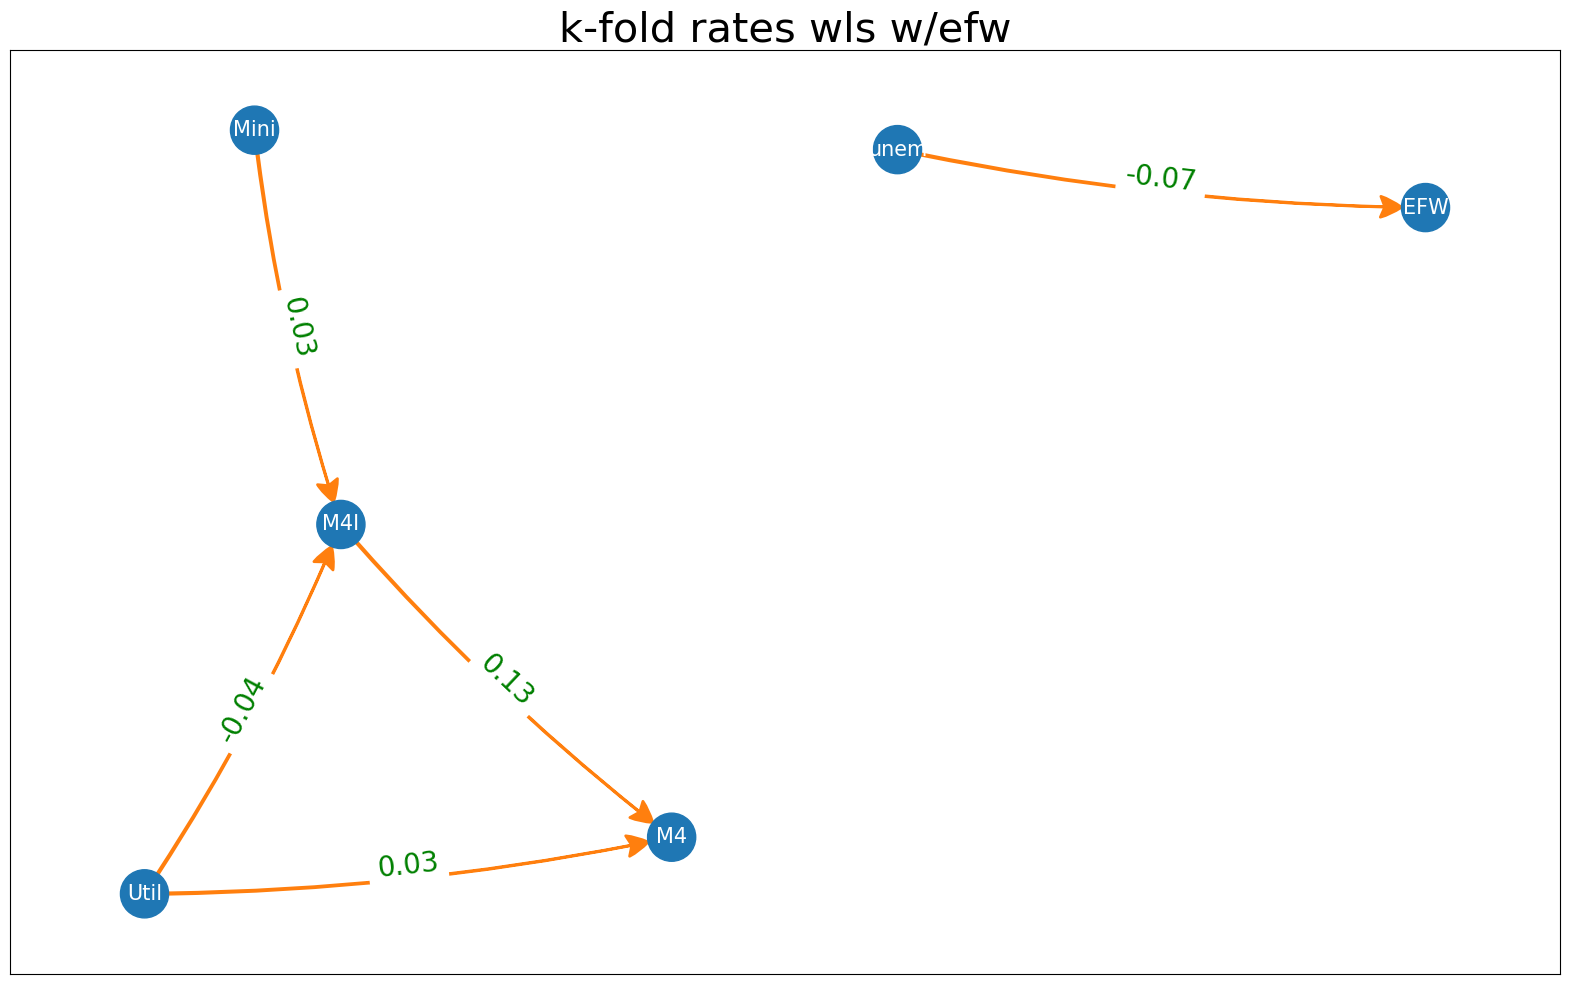

  0%|          | 0/4 [00:00<?, ?it/s]

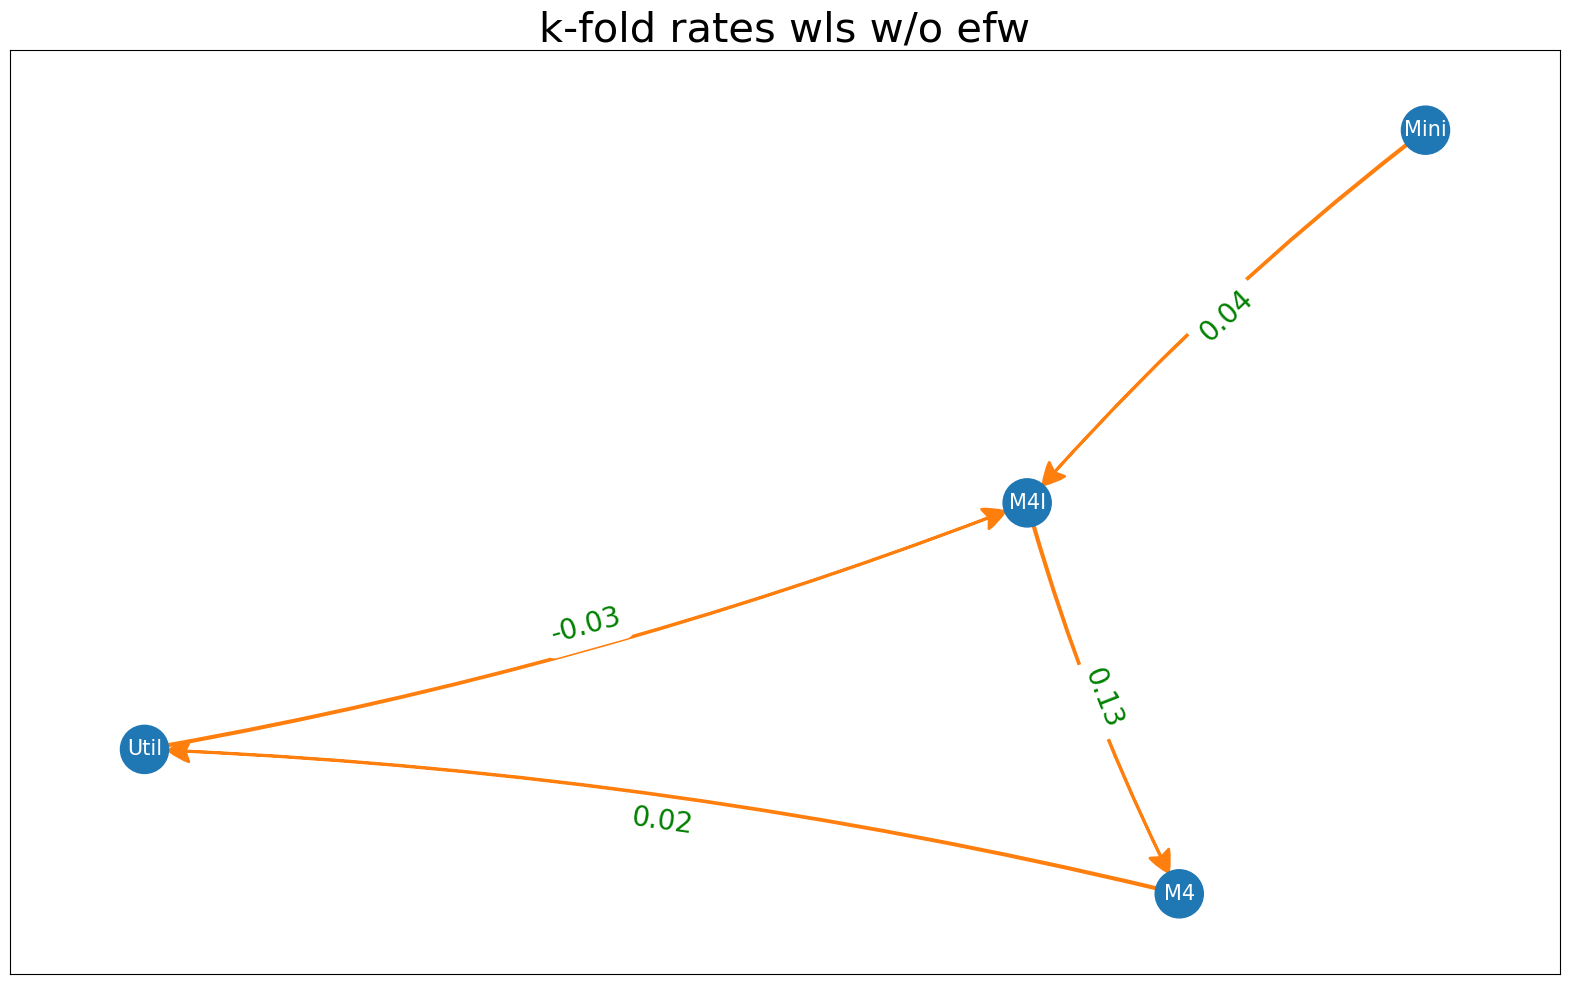

  0%|          | 0/5 [00:00<?, ?it/s]

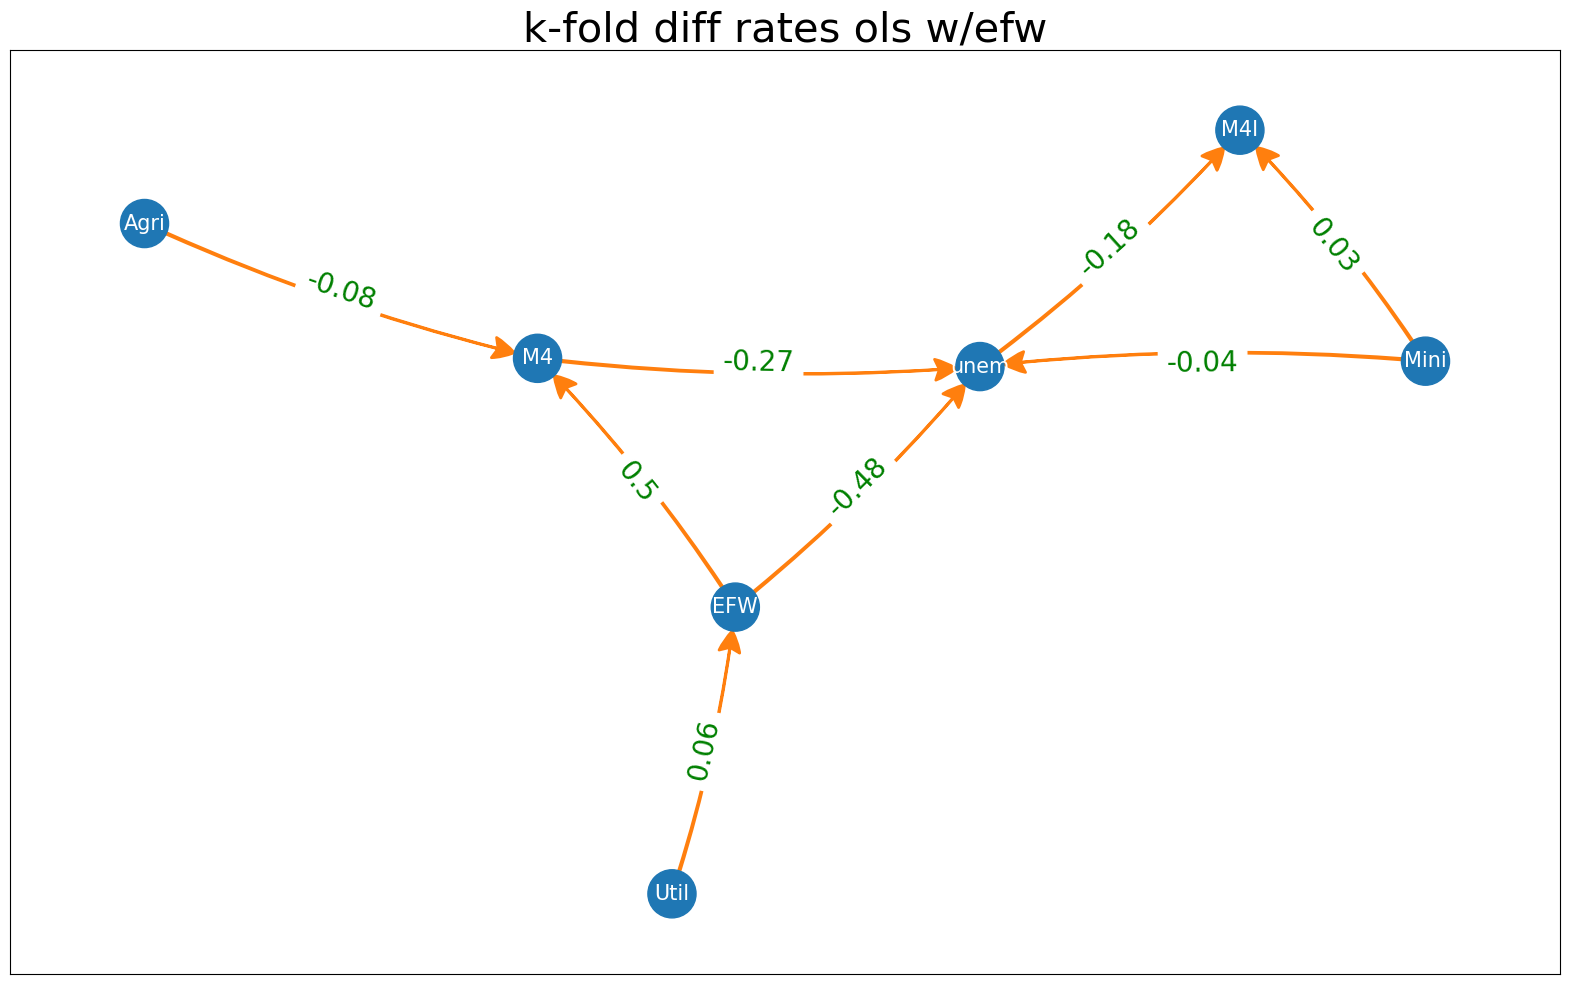

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


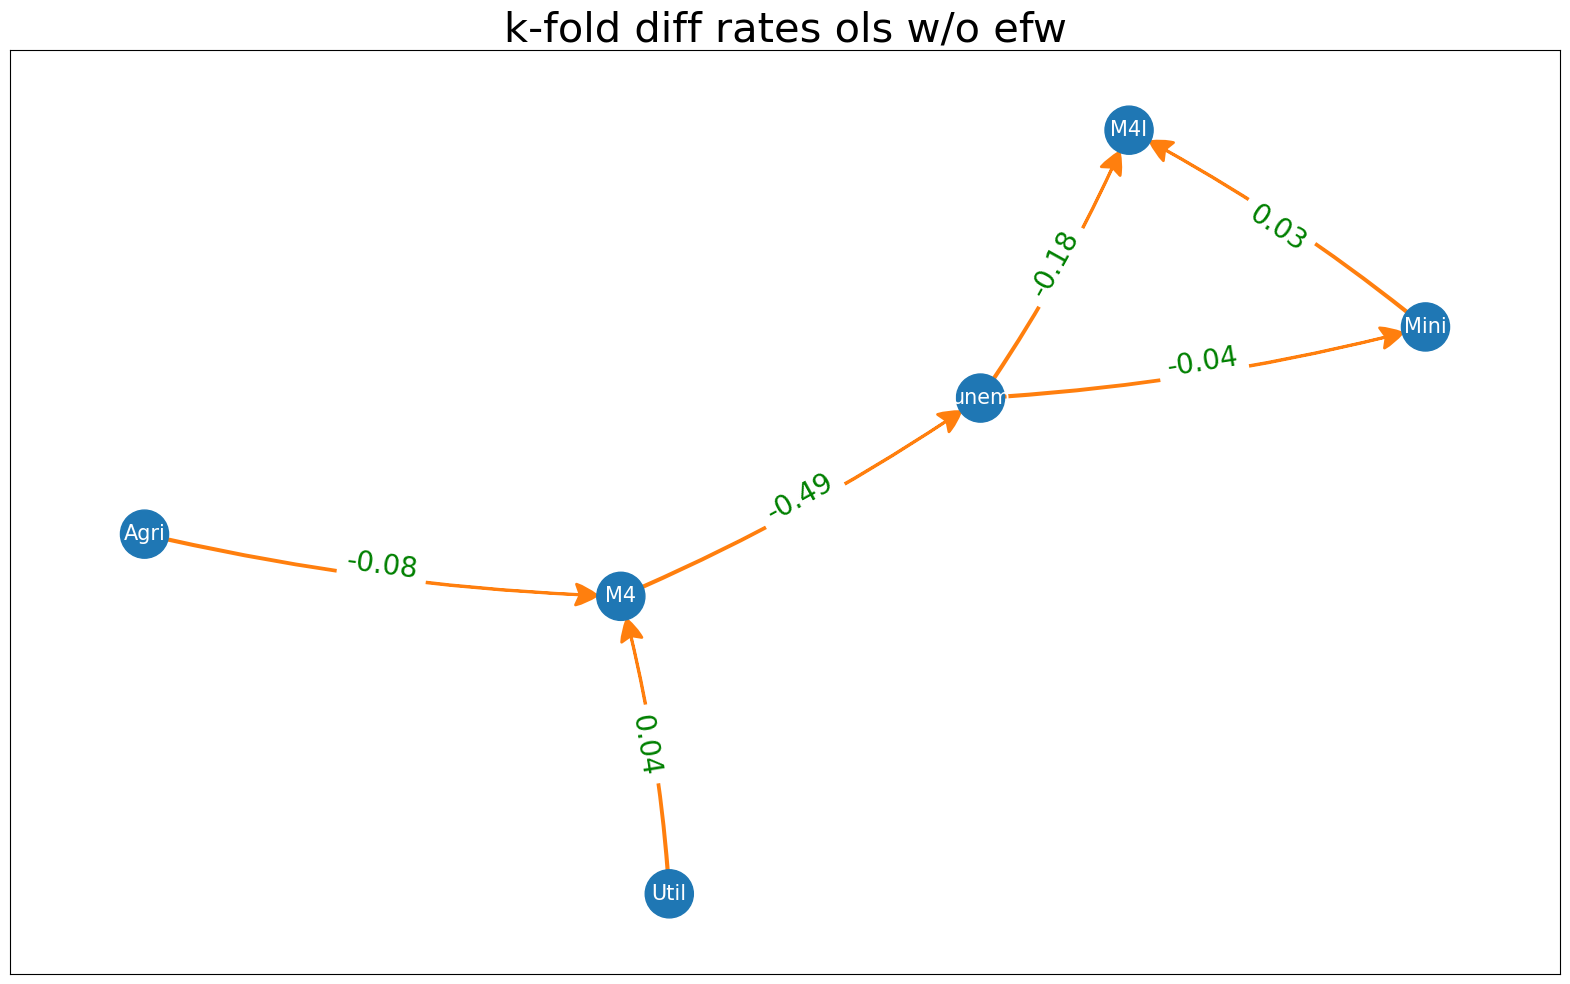

In [337]:
plot_graph(k_fold_train_data, figsize_dict=(24, 20), p_val=0.01, overall_title='')

## k-fold test data

In [334]:
# plot_graph(k_fold_test_data, figsize_dict=(24, 20), p_val=0.01, overall_title='')

### Possible Hypotheses

$H_1$ : There is a positive correlation between money supply and production economy

$H_2$ : An increase in interest rates results in a decrease in the production

$H_3$ : Increase in money supply results in decrease in unemployment rates

$H_4$ : There exists a positive correlation between interest rates and unemployment rates

$H_5$ : The higher the economic freedom, the lower the unemployment rates and the higher the nominal GDP

### Observing the regression results and the DAGs

### Regression:


#### Models:

Unem = $\beta_0 + \beta_1 Agri + \beta_2 Mini + \beta_3 Util + \beta_4 EFW + \beta_5 M4 + \beta_6 M4I + \epsilon$ ..................................(1)

Unem = $\beta_0 + \beta_1 Agri + \beta_2 Mini + \beta_3 Util + \beta_5 M4 + \beta_6 M4I + \epsilon$ ..............................................(2)

Results:

#### Rates

##### Model 1:

$Unem = 45.7968 - 0.0091 Agri - 0.2354 Mini - 0.0808 Util - 4.7977 EFW - 16.3228 M4 - 1.0745 M4I $

Insig: Agri, M4I

$H_3$: fail to reject

$H_4$: reject

##### Model 2:

$Unem = 7.4812 - 0.0188 Agri - 0.2428 Mini - 0.1145 Util - 18.8046 M4 -51.5287 M4I $

Insig: Agri

$H_3$: fail to reject

$H_4$: reject

#### Differenced Rates

##### Model 1:

$Unem = 0.0189 Agri - 0.0520 Mini + 0.0251 Util - 6.1323 EFW - 7.3195 M4 - 25.7390 M4I $

$H_3$: fail to reject

$H_4$: reject

##### Model 2

$Unem = 0.0141 Agri - 0.0454 Mini - 0.0210 Util - 13.1908 M4 - 41.0566 M4I $

Insig: Utilities

$H_3$: fail to reject

$H_4$: reject

### DAGs:

#### Rates with EFW

$H_1$: Fail to reject

$H_2$: Reject, fail to reject for mining

$H_3$: Fail to reject

$H_4$: Reject 

$H_5$ : Reject, fail to reject for an indirect relationship with utilities


#### Rates without EFW:

$H_1$: Fail to reject

$H_2$: Reject

$H_3$: Fail to reject

$H_4$: Reject 

#### Differenced Rates with EFW

$H_1$: Fail to reject for (Utilities and Mining), Reject for Agric

$H_2$: Reject

$H_3$: Fail to reject

$H_4$: Reject

$H_5$: Fail to reject, reject for Agric

#### Differenced Rates without EFW

$H_1$: Fail to reject, reject for Agric

$H_2$: Reject, fail to reject for Agric

$H_3$: Fail to reject

$H_4$: Reject
